# Departamento VICTORIA - Secundaria

En este documento tenenemos todo el codigo referido a la limpieza y análisis de los alumnos de colegios SECUNDARIOS del departamento Victoria.

In [1]:
library(readxl) #cargamos librerias que vamos a utilizar
library(dplyr)
library(stringr)
library(writexl)
library(fdth) 
library(ggplot2)
library(tidyr)
library(pwr)
library(reshape2)
library("nortest")
library(DescTools)

#Cuidado! no ejecutar multiples veces esta celda, conduce a errores del Kernel


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘fdth’


The following objects are masked from ‘package:stats’:

    sd, var



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




# Codigo del informe previo

## Guia 1 - Limpieza y normalizacion del dataset

In [2]:
# -*- coding: utf-8 -*-
#El archivo esta en "ISO-8859-1", pero lo leemos en "UTF-8"
# Leemos el archivo CSV con read_csv()

#Dataset departamento VICTORIA
VICTORIA <- read.csv("VICTORIA.csv")

### Trabajo primero sobre dataset VICTORIA 

***Hacemos una lectura del dataset***

In [3]:
names(VICTORIA) #Vemos los nombres de todas las variables

[1] "X"                  "CUE"                "departamento"      
 [4] "localidad"          "CodigoPostal"       "EsPrivada"         
 [7] "turno"              "curso"              "periodoEvaluatorio"
[10] "idalumno"           "Documento"          "anioLectivo"       
[13] "asignatura"         "nota"               "observaciones"     
[16] "idSubOrganizacion"  "idDivision"         "NivelEnsenanza"    
[19] "orden"              "idOrganizaciones"   "ddivision"         
[22] "Nivel"              "esMultianio"        "IdModEnsenanza"    
[25] "Modalidad"          "ModEnsenaza"

In [4]:
str(VICTORIA) #Vemos variables cuantitativas(int) y cualitativas(char)

'data.frame':	320330 obs. of  26 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CUE               : int  9002121 9002121 9002121 9002121 9002121 9002121 9002121 9002121 9002121 9002121 ...
 $ departamento      : chr  "VICTORIA" "VICTORIA" "VICTORIA" "VICTORIA" ...
 $ localidad         : chr  "VICTORIA" "VICTORIA" "VICTORIA" "VICTORIA" ...
 $ CodigoPostal      : int  3151 3151 3151 3151 3151 3151 3151 3151 3151 3151 ...
 $ EsPrivada         : chr  "N" "N" "N" "N" ...
 $ turno             : chr  "TARDE" "TARDE" "TARDE" "TARDE" ...
 $ curso             : chr  "4 - M Prim" "4 - M Prim" "4 - M Prim" "4 - M Prim" ...
 $ periodoEvaluatorio: chr  "Primer Trimestre" "Primer Trimestre" "Primer Trimestre" "Primer Trimestre" ...
 $ idalumno          : int  672655 672655 672655 672655 852106 852106 852106 852106 852106 852106 ...
 $ Documento         : int  53400853 53400853 53400853 53400853 53799627 53799627 53799627 53799627 53799627 53799627 ...
 $ anioLectivo       : int  2

In [5]:
#cambiamos los nombres de las variables para un mejor entendimiento
VICTORIA <- rename(VICTORIA, c("CodigoUnicoEscolar" = "CUE", "ModEnseñanza" = "ModEnsenaza", "año" = "anioLectivo", "esMultiaño" ="esMultianio", "IdModEnseñanza" = "IdModEnsenanza","NivelEnseñanza" = "NivelEnsenanza"))
names(VICTORIA)

[1] "X"                  "CodigoUnicoEscolar" "departamento"      
 [4] "localidad"          "CodigoPostal"       "EsPrivada"         
 [7] "turno"              "curso"              "periodoEvaluatorio"
[10] "idalumno"           "Documento"          "año"               
[13] "asignatura"         "nota"               "observaciones"     
[16] "idSubOrganizacion"  "idDivision"         "NivelEnseñanza"    
[19] "orden"              "idOrganizaciones"   "ddivision"         
[22] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[25] "Modalidad"          "ModEnseñanza"

In [6]:
#Descubrimos una varible, que se encuentra dos veces en el conjunto de datos
son_repetidas <- VICTORIA$idDivision == VICTORIA$ddivision #Chequeamos si esta repetida (ddivision = idDivision ????)
print(son_repetidas[1])

[1] TRUE


In [7]:
VICTORIA$ddivision <- NULL #Eliminamos la variable ddivison
dim(VICTORIA) #Vemos tamaño dataset --> se reduce a 25 variables
names(VICTORIA)

[1] 320330     25

[1] "X"                  "CodigoUnicoEscolar" "departamento"      
 [4] "localidad"          "CodigoPostal"       "EsPrivada"         
 [7] "turno"              "curso"              "periodoEvaluatorio"
[10] "idalumno"           "Documento"          "año"               
[13] "asignatura"         "nota"               "observaciones"     
[16] "idSubOrganizacion"  "idDivision"         "NivelEnseñanza"    
[19] "orden"              "idOrganizaciones"   "Nivel"             
[22] "esMultiaño"         "IdModEnseñanza"     "Modalidad"         
[25] "ModEnseñanza"

In [8]:
#Reemplazamos los datos de (Victoria$nota) no numericos EPAC/ PA / UP
unique(VICTORIA$nota)

[1] "8"    "7"    "6"    "9"    "10"   "EPAC" "NULL" "UP"   "PA"   "5"   
[11] "4"    "3"    "2"    "1"

In [9]:
#reemplazamos las notas "EPAC", "UP" y "PA" 
VICTORIA$nota[VICTORIA$nota %in% c("EPAC")] <- 5
VICTORIA$nota[VICTORIA$nota %in% c("PA")] <- 6
VICTORIA$nota[VICTORIA$nota %in% c("UP")] <- 7
VICTORIA$nota <- suppressWarnings(as.numeric(VICTORIA$nota)) #convertimos la variable nota a tipo numérico

unique(VICTORIA$nota)

[1]  8  7  6  9 10  5 NA  4  3  2  1

### Creamos la particion del dataset SECUNDARIA

Ahora tomamos del dataset VICTORIA todos los datos correspondientes a colegios Secundarios

In [10]:
#Analizamos las variables que tenemos disponibles
cat("NivelEnsenaza: ",unique(VICTORIA$NivelEnseñanza),"\n") #Datos que hay en variable "NivelEnseñanza"
cat("ModEnsenanza: ", unique(VICTORIA$ModEnseñanza),"\n") #Datos que hay en variable "ModEnseñanza"
cat("Modalida: ", unique(VICTORIA$Modalidad)) #Datos que hay en variable "Modalidad"

NivelEnsenaza:  PRIMARIO SECUNDARIO 
ModEnsenanza:  Comun Escuelas NINA Artistica Ed.Especial Adultos T�cnica Agrot�cnica Cap Tecnica Priv S/D 
Modalida:  Primaria Inicial Secundaria NULL Secundaria 3 a�os Primaria 3 ciclos

In [11]:
#Se guardan los alumnos que cursan en la Secundaria
VICTORIA_Secundaria <- filter(VICTORIA, NivelEnseñanza == "SECUNDARIO" & (ModEnseñanza == "Comun" | ModEnseñanza == "T\xe9cnica" | ModEnseñanza =="Agrot\xe9cnica") & esMultiaño == "N" & Modalidad == "Secundaria") 

In [12]:
dim(VICTORIA_Secundaria) #Tamaño del dataset correspondiente a Secundarias

[1] 128743     25

### Creamos nuevas variables que ayuden a resolver el análisis, como por ejemplo Notas Primer/Segundo/Tercer Trimestre, Promedio, Condición Final en la materia.

#### Solucionamos el tema de los caracteres MA\xd1ANA --> MAÑANA

En ese caso me vi obligado a hacerlo manualmente por un error que no pude resolver de la codificacion UTF-8 del.csv

In [13]:
#Chequeamos que tenemos mal codificaco un caracter en MA\xd1ANA
unique(VICTORIA_Secundaria$turno)

#Convertimos la columna 'turno' a codificacion UTF-8
VICTORIA_Secundaria$turno <- iconv(VICTORIA_Secundaria$turno, to = "UTF-8", sub = "byte")

#Reemplazamos todas las instancias del valor incorrecto 'MA<d1>ANA' con el valor correcto 'MAÑANA'
VICTORIA_Secundaria$turno <- gsub("MA<d1>ANA", "MAÑANA", VICTORIA_Secundaria$turno)

#Chequeamos el resultado
unique(VICTORIA_Secundaria$turno)

[1] "TARDE"     "ROTATIVO"  "MA\xd1ANA" "NOCHE"

[1] "TARDE"    "ROTATIVO" "MAÑANA"   "NOCHE"

In [14]:
#Dividimos el dataset VICTORIA_Secundaria en 3 dataset (Primer Trimestres - Segundo Trimestre - Tercer Trimestre)
PrimerT_secundaria <- filter(VICTORIA_Secundaria, periodoEvaluatorio == "Primer Trimestre")
PrimerT_secundaria <- rename(PrimerT_secundaria,NotasPrimerT = nota)
SegundoT_secundaria <- filter(VICTORIA_Secundaria, periodoEvaluatorio == "Segundo Trimestre")
SegundoT_secundaria <- rename(SegundoT_secundaria,NotasSegundoT = nota)
TercerT_secundaria <- filter(VICTORIA_Secundaria, periodoEvaluatorio == "Tercer Trimestre")
TercerT_secundaria <- rename(TercerT_secundaria,NotasTercerT = nota)

In [15]:
#Fusionamos los 3 daset usando las columnas Documento (DNI) y Asignatura como claves para la fusion
#"Claves de fusion" --> Columnas que deben coincidir en los conjuntos de datos que se están fusionando

aux1 <- merge(x = PrimerT_secundaria, y = SegundoT_secundaria, by = c("Documento", "asignatura"))
auxiliar1 <- merge(x = aux1, y = TercerT_secundaria, by = c("Documento", "asignatura"))

In [16]:
names(auxiliar1)

[1] "Documento"            "asignatura"           "X.x"                 
 [4] "CodigoUnicoEscolar.x" "departamento.x"       "localidad.x"         
 [7] "CodigoPostal.x"       "EsPrivada.x"          "turno.x"             
[10] "curso.x"              "periodoEvaluatorio.x" "idalumno.x"          
[13] "año.x"                "NotasPrimerT"         "observaciones.x"     
[16] "idSubOrganizacion.x"  "idDivision.x"         "NivelEnseñanza.x"    
[19] "orden.x"              "idOrganizaciones.x"   "Nivel.x"             
[22] "esMultiaño.x"         "IdModEnseñanza.x"     "Modalidad.x"         
[25] "ModEnseñanza.x"       "X.y"                  "CodigoUnicoEscolar.y"
[28] "departamento.y"       "localidad.y"          "CodigoPostal.y"      
[31] "EsPrivada.y"          "turno.y"              "curso.y"             
[34] "periodoEvaluatorio.y" "idalumno.y"           "año.y"               
[37] "NotasSegundoT"        "observaciones.y"      "idSubOrganizacion.y" 
[40] "idDivision.y"         "NivelEnseñanza.y"     "orden.y"             
[43] "idOrganizaciones.y"   "Nivel.y"              "esMultiaño.y"        
[46] "IdModEnseñanza.y"     "Modalidad.y"          "ModEnseñanza.y"      
[49] "X"                    "CodigoUnicoEscolar"   "departamento"        
[52] "localidad"            "CodigoPostal"         "EsPrivada"           
[55] "turno"                "curso"                "periodoEvaluatorio"  
[58] "idalumno"             "año"                  "NotasTercerT"        
[61] "observaciones"        "idSubOrganizacion"    "idDivision"          
[64] "NivelEnseñanza"       "orden"                "idOrganizaciones"    
[67] "Nivel"                "esMultiaño"           "IdModEnseñanza"      
[70] "Modalidad"            "ModEnseñanza"

In [17]:
#Nos quedamos con las columnas de nuestro interes
Notas_Victoria_secundaria <- select(auxiliar1, 'CodigoUnicoEscolar', 'departamento', 'localidad', 'EsPrivada', 'turno' , 'curso' , 'periodoEvaluatorio' , 'Documento', 'asignatura','idalumno', 'observaciones', 'idSubOrganizacion', 'idDivision', 'NivelEnseñanza', 'orden','Nivel', 'esMultiaño', 'IdModEnseñanza', 'Modalidad', 'ModEnseñanza', 'año','NotasPrimerT','NotasSegundoT', 'NotasTercerT')

In [18]:
#Agregamos nueva columna 'Promedio'.Esta nueva variable vendria a ser el promedio de los 3 trimestres
Notas_Victoria_secundaria$Promedio <-round ((as.numeric(Notas_Victoria_secundaria$NotasPrimerT)+as.numeric(Notas_Victoria_secundaria$NotasSegundoT)+as.numeric(Notas_Victoria_secundaria$NotasTercerT))/3,2)

#Agregamos nueva columna 'Condicion' 
# Según el promedio conseguido tendra aprobado el año lectivo o tendrá que rendir. 
# Los alumnos que tengas una nota menor a 6 en el tercer trimestre tendrán que rendir.
# Los estudiantes que no tengan las 3 notas correspondientes a cada trimestre tendrán un registro incompleto
Notas_Victoria_secundaria <- Notas_Victoria_secundaria %>% 
    mutate(Condición = case_when(
      Promedio >= 6 & NotasTercerT >= 6 ~ "Aprobado", 
      Promedio <=6 | NotasTercerT < 6 ~ "Rinde",  
      TRUE~ "sin registro completo")) 

In [19]:
head(Notas_Victoria_secundaria)

,CodigoUnicoEscolar,departamento,localidad,EsPrivada,turno,curso,periodoEvaluatorio,Documento,asignatura,idalumno,⋯,esMultiaño,IdModEnseñanza,Modalidad,ModEnseñanza,año,NotasPrimerT,NotasSegundoT,NotasTercerT,Promedio,Condición
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,37098670,TECNOLOGIA DE LA INFORMACION Y LA COMUNICACION,1157557,⋯,N,5,Secundaria,Comun,2023,3,3,1,2.33,Rinde
2,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,37098670,TUTORIAS,1157557,⋯,N,5,Secundaria,Comun,2023,2,2,2,2.00,Rinde
3,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,38052214,HISTORIA,907312,⋯,N,5,Secundaria,Comun,2023,9,9,9,9.00,Aprobado
4,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,38052214,LENGUA Y LITERATURA,907312,⋯,N,5,Secundaria,Comun,2023,9,7,10,8.67,Aprobado
5,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,38052214,LENGUAJE Y PRODUCCION MUSICAL II,907312,⋯,N,5,Secundaria,Comun,2023,10,10,10,10.00,Aprobado
6,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,38052214,LENGUAJE Y PRODUCCION VISUAL II,907312,⋯,N,5,Secundaria,Comun,2023,8,9,8,8.33,Aprobado


### Unificamos los nombres de las asignaturas (normalizacion)

Nuevamente me veo obligado a modificar manualmente la codificacion. En esta parte cobra una mayor importancia ya que vamos a normalizar los nombres de las asignaturas, no queremos que una misma asignatura sea referida con dos nombres distintos.

In [20]:
#Para evitarnos errores con la codificacion UTF-8 a la hora de normalizar, convertimos todo a ASCII (evito problemas con las tildes)
Notas_Victoria_secundaria$asignatura <- iconv(Notas_Victoria_secundaria$asignatura, from = "UTF-8", to = "ASCII", sub = "")

In [21]:
#Convertimos todos los nombres a MAYUSCULA
Notas_Victoria_secundaria$asignatura <- toupper(Notas_Victoria_secundaria$asignatura)
#Chequeamos
#unique(Notas_Victoria_secundaria$asignatura)

In [22]:
cat("Cantidad de nombres de asignaturas: ", length(unique(Notas_Victoria_secundaria$asignatura)), "\n")

Cantidad de nombres de asignaturas:  182 


In [23]:
#Normalizamos los nombres de las asignaturas en el conjunto de datos.
#Nos aseguramos que las asignaturas que refieren a lo mismo sean llamadas de igual manera.

Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*BIOLOGIA.*", "BIOLOGIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*MATEMATICA*", "MATEMATICA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*LENGUA*", "LENGUA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*EXTRANJERA*", "INGLES")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*GEOGRAFIA.*", "GEOGRAFIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*HISTORIA*", "HISTORIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*BIOLOGIA.*", "BIOLOGIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*ETICA*", "ETICA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*MUSICA*", "MUSICA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*ETICA*", "ETICA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*FILOSOFIA*", "FILOSOFIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*ECONOMIA*", "ECONOMIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*FISICO QUIMICA*", "FISICA Y QUIMICA")
Notas_Victoria_secundaria$asignatura <- gsub("AUTO C.A.D", "C.A.D", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("DERECHO COMERCIAL", "DERECHO", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("CEREALES Y OLEAGINOSAS|MARCO JURIDICO DE LOS CIENCIAS AGROPECUARIAS |PRODUCCION HORTICOLA|PRODUCCION DE PLANTAS EN VIVERO |PRODUCCION DE FORRAJES|PRODUCCION DE CERDOS|PRODUCCION DE CAPRINOS|PRODUCCION BOVINO PARA CARNE|PROCESOS PRODUCTIVOS|INSTALACIONES AGROPECUARIAS|CIENCIAS NATURALES APLICADAS A PRO. AGROPECUARIOS|INDUSTRIA DE PROD. LACTEOS DE BOVINO O CAPRINO|INDUSTRIA CARNE PORCINA", "CIENCIAS AGROPECUARIAS", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("CIENCIAS NATURALES (FISICO QUIMICA)|FISICO Y QUIMICA)|CIENCIAS NATURALES FISICO-QUIMICA|FISICA Y QUIMICA|ESPACIO DE LA ORIENTACION EN CIENCIAS NATURALES (FISICO QUIMICA)", "FISICO Y QUIMICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("CIRCUITOS TURISTICOS I Y II|MARKETING TURISTICO|INTRODUCCION AL TURISMO|EMPRESAS TURISTICAS|INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL II|INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL I|INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL|CIRCUITOS TURISTICOS II|DESARROLLO DE LOCALIDADES TURISTICAS", "TURISMO", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("ECONOMIA II", "ECONOMIA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("ETICA Y CIUDADANA|ETICAS CONTEMPORANEAS I", "ETICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("FILOSOFIA II", "FILOSOFIA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("FISICA APLICADA|TRABAJOS PRACTICOS DE FISICA APLICADA", "FISICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("FRANCÉS", "FRANCES", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("INGLES (INGLES)|INGLES (INGLES)|INGLESS", "INGLES", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("PORTUGUÉS", "PORTUGUES", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("QUIMICA ANALITICA CUALITATIVA|QUIMICA APLICADA|TRABAJOS PRACTICOS DE QUIMICA ORGANICA II|TRABAJOS PRACTICOS DE QUIMICA ORGANICA |TRABAJOS PRACTICOS DE QUIMICA INORGANICA |TRABAJOS PRACTICOS DE QUIMICA INDUSTRIAL APLICADA |TRABAJOS PRACTICOS DE QUIMICA INDUSTRIAL|TRABAJOS PRACTICOS DE QUIMICA GENERAL|TRABAJOS PRACTICOS DE QUIMICA ANALITICA CUANTIT.|TRABAJOS PRACTICOS DE PROC. Y OPERACIONES QUIMICAS|TRABAJOS PRACTICOS DE PROC. Y OPERACIONES QUIMICAS|QUIMICA ANALITICA CUANTITATIVA|QUIMICA GENERAL|QUIMICA INORGANICA|QUIMICA ORGANICA II|TALLER MODULAR QUIMICA", "QUIMICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("TECNOLOGIA I|TECNOLOGIA II|TECNOLOGIA III|EDUCACION TECNOLOGICA", "TECNOLOGIA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("TUTORIAS DISCIPLINARES", "TUTORIAS", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("GESTION DE LA PRODUCCION ARTISTICA", "ARTES VISUALES", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("HISTORIA)", "HISTORIA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("MATEMATICA|MATEMATICAO", "MATEMATICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("LENGUA Y LITERATURA|LITERATURA ARGENTINA|LITERATURA LATINOAMERICANA", "LENGUA Y LITERATURA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("INGLES\\s*\\(INGLES\\)", "INGLES", Notas_Victoria_secundaria$asignatura)

In [24]:
cat("Cantidad de nombres de asignaturas: ", length(unique(Notas_Victoria_secundaria$asignatura)), "\n")

Cantidad de nombres de asignaturas:  125 


In [25]:
#Chequeamos
#unique(Notas_Victoria_secundaria$asignatura)  #Comentado para reducir bloques innecesarios 

In [26]:
#Filtramos lo cursos (CN - RURAL CNR), no nos sirven para el analisis
#table(Notas_Victoria_secundaria$curso)
Notas_Victoria_secundaria <- Notas_Victoria_secundaria[Notas_Victoria_secundaria$curso != "CN - RURAL CNR", ]
#table(Notas_Victoria_secundaria$curso)

In [27]:
#Recordamos la variable nueva creada anteriormente 'Condicion'
unique(Notas_Victoria_secundaria$Condición)
#No nos sirven los alumnos 'SIN REGISTRO COMPLETO' para el analisis
Notas_Victoria_secundaria <- subset(Notas_Victoria_secundaria, Condición != "sin registro completo")
unique(Notas_Victoria_secundaria$Condición)

[1] "Rinde"                 "Aprobado"              "sin registro completo"

[1] "Rinde"    "Aprobado"

In [28]:
#Creamos nueva variable "Año_Curso"

#Para ello convertimos todos los datos en 'Condición' en caracteres (strings)
Notas_Victoria_secundaria$curso <- as.character(Notas_Victoria_secundaria$curso)
#En la nueva variable 'Año_Curso" guardo 
Notas_Victoria_secundaria$Año_Curso <- substr(Notas_Victoria_secundaria$curso, 1, 1)
table(Notas_Victoria_secundaria$Año_Curso)
#Ahora reemplazo el numero por su equivalente en palabras
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "1" , "PRIMERO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "2" , "SEGUNDO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "3" , "TERCERO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "4" , "CUARTO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "5" , "QUINTO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "6" , "SEXTO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "7" , "SEPTIMO")

table(Notas_Victoria_secundaria$Año_Curso)


    1     2     3     4     5     6     7 
 7863 10225  8301  8239  7582  8657   819 


 CUARTO PRIMERO  QUINTO SEGUNDO SEPTIMO   SEXTO TERCERO 
   8239    7863    7582   10225     819    8657    8301 

In [29]:
dim(Notas_Victoria_secundaria)

[1] 51686    27

In [30]:
#Guardamos el dataset Victoria_secundaria limpio como xlsx
write_xlsx(Notas_Victoria_secundaria, "VICTORIA_SECUNDARIA_LIMPIA.xlsx")


----------------

## Guia ejercicios 2

In [31]:
#Aunque lo tenemos arriba, lo leemos nuevamente 
#Este es el dataset limpio con el que vamos a trabajar
secundaria_VICTORIA <- read_excel("VICTORIA_SECUNDARIA_LIMPIA.xlsx")
#secundaria_VICTORIA <- read_excel("/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/VICTORIA_SECUNDARIA_LIMPIA.xlsx")

### 2.A ¿Quedan variables que deberían eliminarse? Si la respuesta es afirmativa indique el motivo.

In [32]:
#Variables con las que contamos hasta ahora
names(secundaria_VICTORIA)

[1] "CodigoUnicoEscolar" "departamento"       "localidad"         
 [4] "EsPrivada"          "turno"              "curso"             
 [7] "periodoEvaluatorio" "Documento"          "asignatura"        
[10] "idalumno"           "observaciones"      "idSubOrganizacion" 
[13] "idDivision"         "NivelEnseñanza"     "orden"             
[16] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[19] "Modalidad"          "ModEnseñanza"       "año"               
[22] "NotasPrimerT"       "NotasSegundoT"      "NotasTercerT"      
[25] "Promedio"           "Condición"          "Año_Curso"

In [33]:
#Estas dos variables son redundantes, ya comprobamos que todos los datos pertenecen al departamento VICTORIA
unique(secundaria_VICTORIA$localidad)
unique(secundaria_VICTORIA$departamento)

#Eliminamos la variable 'localidad' y 'departamento'  
secundaria_VICTORIA <- subset(secundaria_VICTORIA, select = -c(localidad, departamento))

[1] "VICTORIA"

[1] "VICTORIA"

In [34]:
#Esta variable no sirve, ya comprobamos que todos los datos pertenecen al año 2023
unique(secundaria_VICTORIA$año)
#Eliminamos la variable 'año'
secundaria_VICTORIA <- subset(secundaria_VICTORIA, select = -c(año))

[1] 2023

In [35]:
#Esta variable no sirve, ya tenemos la variable Año_Curso, es redundante
unique(secundaria_VICTORIA$curso)
#Eliminamos la variable 'curso'
secundaria_VICTORIA <- subset(secundaria_VICTORIA, select = -c(curso))

[1] "3 - B 4000A"                 "1 - B 4000A"                
  [3] "2 - B 4000A"                 "6 - A 3322T"                
  [5] "1 - C 4000A"                 "2 - 2 4000E"                
  [7] "5 - A 3322N"                 "1 - E 4000T"                
  [9] "3 - 2 4000E"                 "6 - A 3322S"                
 [11] "2 - A 4000E"                 "2 - A Cs. Soc y Hum 485/10C"
 [13] "5 - A 3322E"                 "3 - A Cs. Soc y Hum 485/10C"
 [15] "6 - A 3322N"                 "3 - 1 4000E"                
 [17] "1 - D 4000T"                 "7 - 1 TQ TQUIMIC"           
 [19] "5 - 4 3322A"                 "4 - A 3322E"                
 [21] "4 - A 401Ef"                 "6 - 2 3322N"                
 [23] "1\xba - B CNR"               "3 - C 4000A"                
 [25] "2 - D 4000T"                 "5 - 1 3322N"                
 [27] "6 - 1 3322T"                 "1 - A 4000E"                
 [29] "6 - 1 3322N"                 "4 - A 3322N"                
 [31] "6 - A 3322E"                 "3 - B Cs. Soc y Hum 485/10C"
 [33] "3 - A CBC"                   "2 - 2 CBC"                  
 [35] "6 - 1 TPA TEPABYS"           "2 - C 4000A"                
 [37] "3 - D 4000T"                 "4 - A 3322T"                
 [39] "7 - 1 TPA TEPABYS"           "6 - A 401Ef"                
 [41] "7 - 1 TM TCMECAN"            "6 - A 3322A"                
 [43] "4 - A 3322A"                 "5 - A 3322A"                
 [45] "5 - 1 3322S"                 "4 - 1 3322T"                
 [47] "6 - 2 3322E"                 "3- - A 4000E"               
 [49] "6 - 1 3322C"                 "6 - A ART"                  
 [51] "5 - 3 3322S"                 "4 - A 3322S"                
 [53] "6 - 4 3322A"                 "5 - A 3322T"                
 [55] "6 - 3 3322S"                 "6 - 1 3322E"                
 [57] "2 - 1 4000E"                 "6 - 1 3322S"                
 [59] "1 - A Cs. Soc y Hum 485/10C" "4 - 1 3322E"                
 [61] "5 - A 3322S"                 "6 - 1 TQ TQUIMIC"           
 [63] "6 - 1 TM TCMECAN"            "4 - 1 TQ TQUIMIC"           
 [65] "5 - A 401Ef"                 "4 - 1 3322S"                
 [67] "5 - 1 3322T"                 "3 - B CBC"                  
 [69] "5 - 1 TMEC TCMECAN"          "1\xba - 3 4000E"            
 [71] "5 - 1 TQ TQUIMIC"            "5 - 2 3322N"                
 [73] "4 - 2 3322N"                 "3 - 4 CBC"                  
 [75] "1 - A CBC"                   "5 - 1 3322E"                
 [77] "4 - 2 3322E"                 "5 - A ART"                  
 [79] "4 - 1 3322N"                 "4 - 2 TMEC TCMECAN"         
 [81] "2 - C CBC"                   "3 - 2 CBC"                  
 [83] "4 - 1 TMEC TCMECAN"          "4 - 1 3322C"                
 [85] "5 - 1 TPA TEPABYS"           "3 - 1 CBC"                  
 [87] "4 - 4 3322A"                 "4 - 3 3322S"                
 [89] "5 - 2 3322E"                 "2 - B CBC"                  
 [91] "3 - 2 RCBCET"                "2 - 1 CBC"                  
 [93] "5 - 1 3322C"                 "2 - 5 CBC"                  
 [95] "3 - 1 RCBCET"                "3 - 3 RCBCET"               
 [97] "2 - A CBC"                   "3 - 5 AGRO RCBEAT"          
 [99] "4 - 1 TPA TEPABYS"           "3 - 4 RCBCET"               
[101] "2 - 3 CBC"                   "1 - 1 CBC"                  
[103] "4 - A ART"                   "3 - 3 CBC"                  
[105] "1 - C CBC"                   "2 - 4 CBC"                  
[107] "2 - 2 RCBCET"                "1 - 3 CBC"                  
[109] "1 - B CBC"                   "1 - 2 CBC"                  
[111] "2 - 3 RCBCET"                "2 - 1 RCBCET"               
[113] "1 - 5 CBC"                   "3 - A ART"                  
[115] "2 - 4 RCBCET"                "1 - A ART"                  
[117] "1 - 4 CBC"                   "1 - 2 RCBCET"               
[119] "2 - A ART"                   "2 - 5 RCBEAT"               
[121] "1 - 3 RCBCET"                "1 - 4

In [36]:
#Chequeamos que se hayan eliminado correctamente 
names(secundaria_VICTORIA)

[1] "CodigoUnicoEscolar" "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "asignatura"        
 [7] "idalumno"           "observaciones"      "idSubOrganizacion" 
[10] "idDivision"         "NivelEnseñanza"     "orden"             
[13] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[16] "Modalidad"          "ModEnseñanza"       "NotasPrimerT"      
[19] "NotasSegundoT"      "NotasTercerT"       "Promedio"          
[22] "Condición"          "Año_Curso"

### 2.B De las asignaturas de interés en el estudio en las cuales se normalizaron los nombres, ¿quedan  todas bien cargadas?

In [37]:
#Notamos que se nos pasaron algunas asignaturas a normalizar 
#Lo modificamos antes de continuar
secundaria_VICTORIA$asignatura <- str_replace_all(secundaria_VICTORIA$asignatura, "FISICO Y QUIMICA\\)", "FISICO Y QUIMICA")
secundaria_VICTORIA$asignatura <- str_replace_all(secundaria_VICTORIA$asignatura, "FRANCS", "FRANCES")
secundaria_VICTORIA$asignatura <- str_replace_all(secundaria_VICTORIA$asignatura, "MATEMATICA APLICADA", "MATEMATICA")

#Chequeamos arreglo
#table(secundaria_VICTORIA$asignatura)

In [38]:
#Chequeamos nombres en ModEnseñanza
unique(secundaria_VICTORIA$`ModEnseñanza`)

# Cargar el paquete necesario
#install.packages("stringi")
library(stringi)

# Decodificar y limpiar los nombres de las categorías
secundaria_VICTORIA$ModEnseñanza <- stri_replace_all_fixed(secundaria_VICTORIA$ModEnseñanza, 
                                                           c("T\xe9cnica", "Agrot\xe9cnica"), 
                                                           c("Tecnica", "Agrotecnica"), 
                                                           vectorize_all = FALSE)
unique(secundaria_VICTORIA$`ModEnseñanza`)

[1] "Comun"          "T\xe9cnica"     "Agrot\xe9cnica"

[1] "Comun"       "Tecnica"     "Agrotecnica"

In [39]:
#Guardamos los cambios realizamos 
write_xlsx(secundaria_VICTORIA, "VICTORIA_SECUNDARIA_LIMPIA.xlsx")

In [40]:
names(secundaria_VICTORIA)

[1] "CodigoUnicoEscolar" "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "asignatura"        
 [7] "idalumno"           "observaciones"      "idSubOrganizacion" 
[10] "idDivision"         "NivelEnseñanza"     "orden"             
[13] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[16] "Modalidad"          "ModEnseñanza"       "NotasPrimerT"      
[19] "NotasSegundoT"      "NotasTercerT"       "Promedio"          
[22] "Condición"          "Año_Curso"

In [41]:
cat("Secundarias en dpto. Victoria: ", length(unique(secundaria_VICTORIA$CodigoUnicoEscolar)), "\n")

escuelas_publicas <- secundaria_VICTORIA %>%
  filter(EsPrivada == "N")
cat("Secundarias Publicas: ", length(unique(escuelas_publicas$CodigoUnicoEscolar)), "\n")

escuelas_privadas <- secundaria_VICTORIA %>%
  filter(EsPrivada == "S")
cat("Secundarias Privadas: ", length(unique(escuelas_privadas$CodigoUnicoEscolar)), "\n")

escuelas_TM <- secundaria_VICTORIA %>%
  filter(turno == "MAÑANA")
cat("Secundarias Turno Mañana: ", length(unique(escuelas_TM$CodigoUnicoEscolar)), "\n")

escuelas_TT <- secundaria_VICTORIA %>%
  filter(turno == "TARDE")
cat("Secundarias Turno Tarde: ", length(unique(escuelas_TT$CodigoUnicoEscolar)), "\n")

escuelas_noche <- secundaria_VICTORIA %>%
  filter(turno == "NOCHE")
cat("Secundarias Turno Noche: ", length(unique(escuelas_noche$CodigoUnicoEscolar)), "\n")

escuelas_rot <- secundaria_VICTORIA %>%
  filter(turno == "ROTATIVO")
cat("Secundarias Turno Rotativo: ", length(unique(escuelas_rot$CodigoUnicoEscolar)), "\n")

escuelas_comunes <- secundaria_VICTORIA %>%
  filter(ModEnseñanza == "Comun")
cat("Secundarias Comunes: ", length(unique(escuelas_comunes$CodigoUnicoEscolar)), "\n")

escuelas_tec <- secundaria_VICTORIA %>%
  filter(ModEnseñanza == "Tecnica")
cat("Secundarias Tecnicas: ", length(unique(escuelas_tec$CodigoUnicoEscolar)), "\n")

escuelas_agrotec <- secundaria_VICTORIA %>%
  filter(ModEnseñanza == "Agrotecnica")
cat("Secundarias Agrotecnicas: ", length(unique(escuelas_agrotec$CodigoUnicoEscolar)), "\n")

Secundarias en dpto. Victoria:  20 
Secundarias Publicas:  17 
Secundarias Privadas:  3 
Secundarias Turno Mañana:  16 
Secundarias Turno Tarde:  11 
Secundarias Turno Noche:  2 
Secundarias Turno Rotativo:  1 
Secundarias Comunes:  20 
Secundarias Tecnicas:  5 
Secundarias Agrotecnicas:  1 


## Guia ejercicios 3 - Graficas generales

In [42]:
#Aunque lo tenemos arriba, lo leemos nuevamente 
secundaria_VICTORIA <- read_excel("VICTORIA_SECUNDARIA_LIMPIA.xlsx")

### En esta seccion se encuentran los graficos utilizados para la elaboracion del informe

In [43]:
#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos
celeste <- '#2196f3'
amarillo <- '#ffeb3b'
rojo <- '#FF0000'
rojo_naranja <- '#f44336'
rojo_pastel <- '#C23B22'
rosa_fuerte <- '#e91e63'
azul <- '#2962ff'
verde <- '#4caf50'
violeta <- '#bb3af2'
naranja <- '#ea7441'
verde_claro <- '#8bc34a'
verde_celeste <- '#009688'
rosa_fuerte <- '#ff4081'
rojo_fuerte <- '#ff5252'
naranja_oscuro <- '#ff6e40'
amarillo_fuerte <- '#ffc107'
amarillo_verde <- '#aeea00'
azul_verde <- '#00bfa5'
verde_agua <- '#1de9b6'
celeste <- '#00b0ff'
violeta_oscuro <- '#8e24aa'
violeta_rosado <- '#d500f9'
fucsia <- '#f50057'
azul_violeta <- '#311b92'
violeta_fuerte <- '#6200ea'
celeste_agua <- '#64ffda'
naranja_fuerte4 <- '#ff5722'

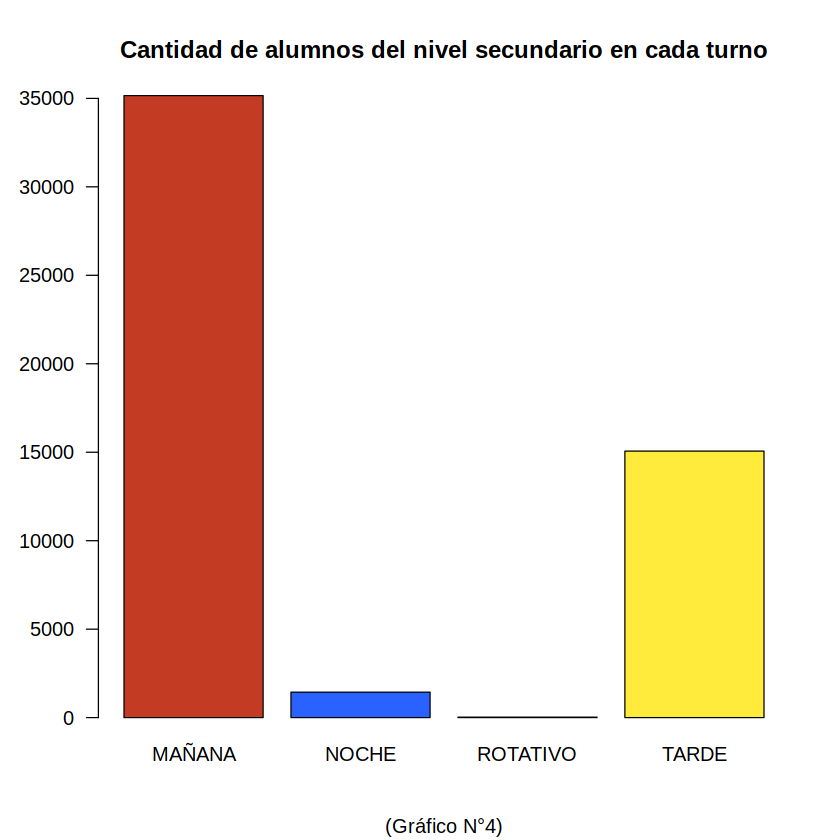

In [44]:
#Distribucion de alumnos por niveles
tabla <- table(secundaria_VICTORIA$turno)
barplot(tabla, main = "Cantidad de alumnos del nivel secundario en cada turno",
        sub = "(Gráfico N°4)",
        col.sub = "black",
        col = c(rojo_pastel,azul,verde,amarillo), ylim = c(0, 35000), las = 1)

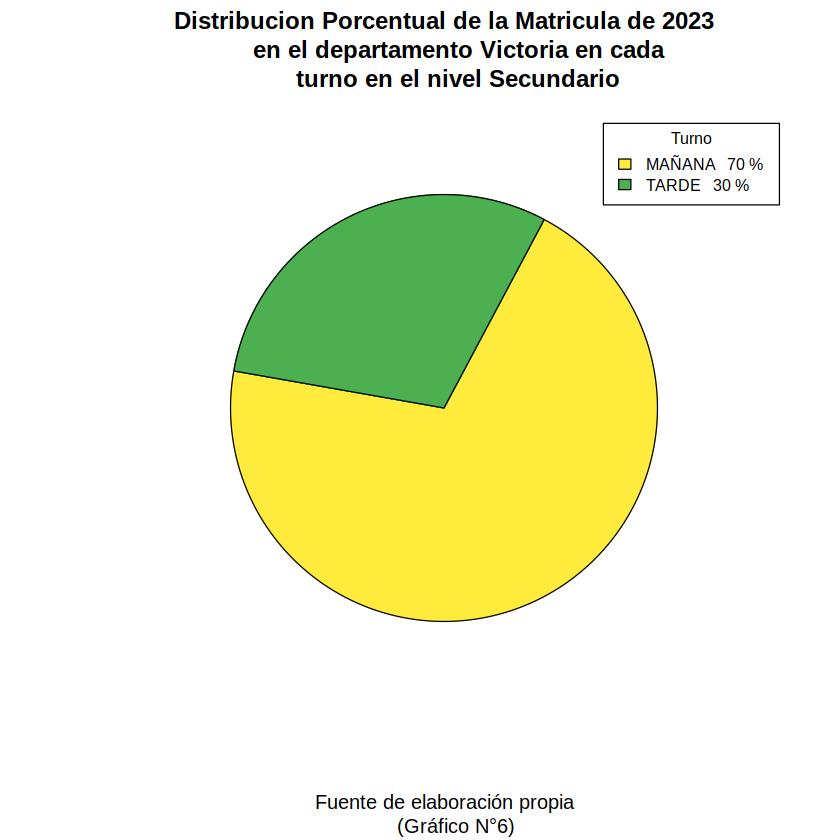

In [45]:
# Filtrar los datos para incluir solo los turnos de mañana y tarde
turnos_seleccionados <- subset(secundaria_VICTORIA, turno %in% c("MAÑANA", "TARDE"))
# Calcular la distribución porcentual de los turnos seleccionados
pie_commute <- round(100 * table(turnos_seleccionados$turno) / length(turnos_seleccionados$turno))
# Títulos para los turnos seleccionados
titulos <- c("MAÑANA", "TARDE")
colors = c(amarillo,verde)

pie(pie_commute, labels = "",
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023
    en el departamento Victoria en cada
    turno en el nivel Secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°6)",
    col.sub = "black",
    density = 500, angle = seq(0,190,35),
    border = 'black',
    cex = 1,
    init.angle = 170)

# Agregar la leyenda
legend(x = 0.56, y = 1, c(0,0.1),
       legend = paste(titulos, " ", pie_commute, "%"),
       fill = colors,
       title = "Turno",
       cex = 0.8)  # Ajustar el tamaño del texto de la leyenda

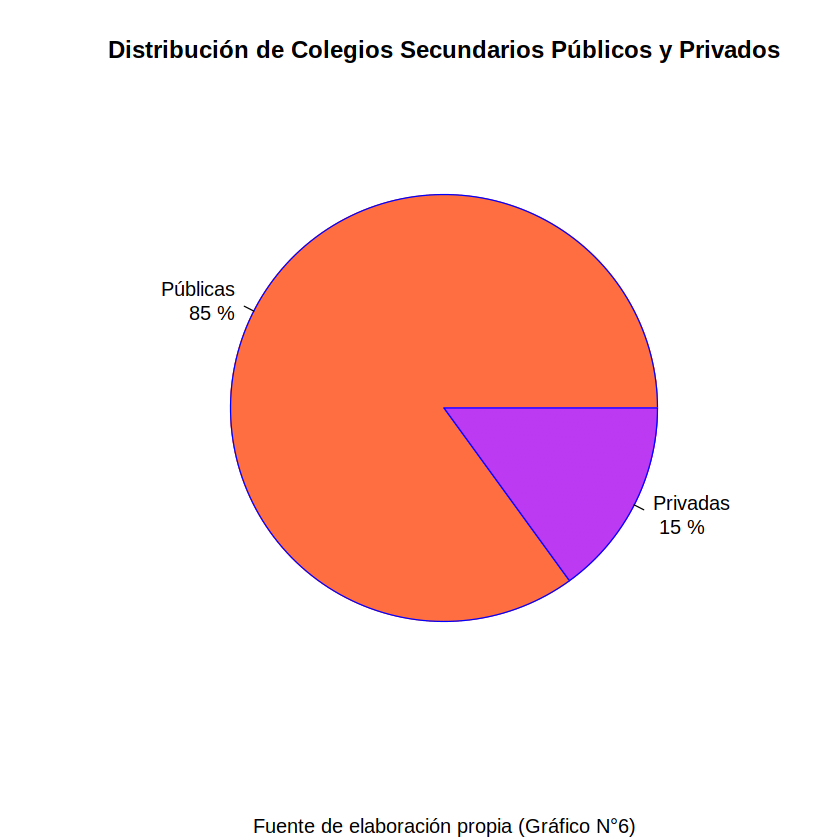

In [46]:
# Contar la cantidad de colegios públicos y privados
cantidad_publicas <- length(unique(secundaria_VICTORIA$CodigoUnicoEscolar[secundaria_VICTORIA$EsPrivada == "N"]))
cantidad_privadas <- length(unique(secundaria_VICTORIA$CodigoUnicoEscolar[secundaria_VICTORIA$EsPrivada == "S"]))
total <- cantidad_publicas + cantidad_privadas
# Calcular el porcentaje de colegios públicos y privados
porcentaje_publicas <- round(100 * cantidad_publicas / total)
porcentaje_privadas <- round(100 * cantidad_privadas / total)

# Crear el gráfico de torta con etiquetas de porcentaje
pie(c(cantidad_publicas, cantidad_privadas),
    labels = c(paste("Públicas\n", porcentaje_publicas, "%"),
               paste("Privadas\n", porcentaje_privadas, "%")),
    col = c("#ff6e40", "#bb3af2"),
    radius = .75,
    main = "Distribución de Colegios Secundarios Públicos y Privados",
    col.main = "black",
    sub = "Fuente de elaboración propia (Gráfico N°6)",
    col.sub = "black",
    density = 500,
    angle = seq(0, 180, 35),
    border = 'blue')


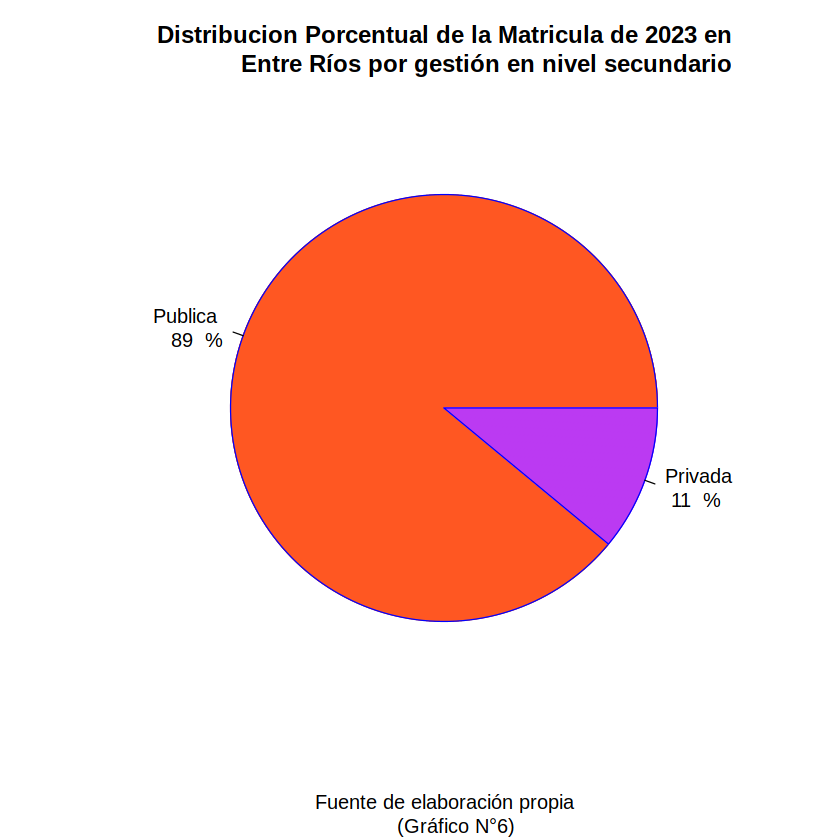

In [47]:
#Distribucion de alumnos por turno
pie_commute <- round(100 * table(secundaria_VICTORIA$EsPrivada) / length(secundaria_VICTORIA$EsPrivada))
titulos <- c("Publica", "Privada")

colors = c(naranja_fuerte4,'#bb3af2')

pie(pie_commute, labels = paste(titulos,'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
            Entre Ríos por gestión en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°6)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'blue')

In [48]:
Victoria_secundaria <- filter(secundaria_VICTORIA, Año_Curso== "PRIMERO" |  Año_Curso== "SEGUNDO" |  Año_Curso== "TERCERO" |
                     Año_Curso== "CUARTO" |  Año_Curso== "QUINTO" |  Año_Curso== "SEXTO" |  Año_Curso== "SEPTIMO")

In [49]:
# Filtrar los datos y mantener solo una entrada por documento por año
Victoria_secundaria_unico <- secundaria_VICTORIA %>%
  filter(Año_Curso %in% c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO", "SEPTIMO")) %>%
  distinct(Documento, Año_Curso, EsPrivada)

# Contar la cantidad de inscritos por año
inscritos_por_año <- Victoria_secundaria_unico %>%
  count(Año_Curso)

`inscritos_por_año`

Año_Curso,n
<chr>,<int>
CUARTO,481
PRIMERO,594
QUINTO,396
SEGUNDO,631
SEPTIMO,50
SEXTO,371
TERCERO,530


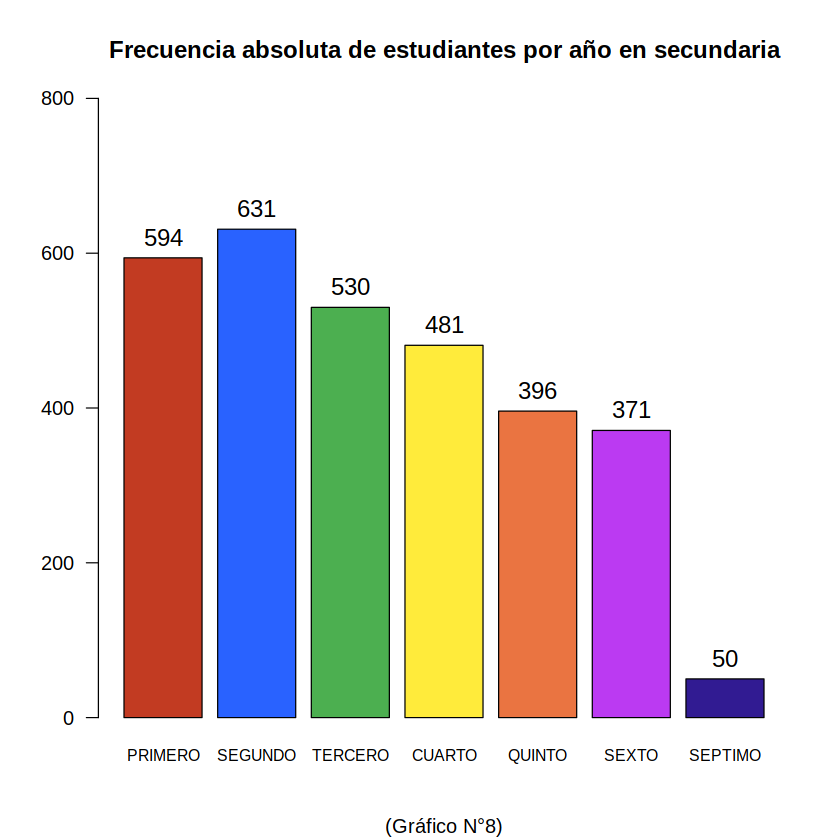

In [50]:
# Distribucion de alumnos por años
colors <- c(rojo_pastel, azul, verde, amarillo, naranja, violeta, azul_violeta) 
datos2 <- table(Victoria_secundaria_unico$Año_Curso)
tabla_años2 <- as.data.frame(datos2)
names(tabla_años2) <- c("Año", "Freq")
tabla_años2 <- tabla_años2 %>% arrange(factor(Año, levels = c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO','SEPTIMO')))
# Grafico de barras de frecuencia absoluta ordenado por año
bp <- barplot(tabla_años2$Freq, 
        names = tabla_años2$Año, 
        main = "Frecuencia absoluta de estudiantes por año en secundaria",
        sub = "(Gráfico N°8)",
        col.sub = "black",
        col = colors,  # Utilizar colores personalizados
        ylim = c(0, 800), 
        las = 1, 
        cex.names = 0.79)

# Agregar la cantidad de estudiantes sobre cada barra
text(x = bp, 
     y = tabla_años2$Freq, 
     labels = tabla_años2$Freq, 
     pos = 3,  # Posición para ubicar el texto (encima de la barra)
     cex = 1.2,  # Tamaño del texto
     col = "black")  # Color del texto

In [51]:
unique(Victoria_secundaria$`ModEnseñanza`)

[1] "Comun"       "Tecnica"     "Agrotecnica"

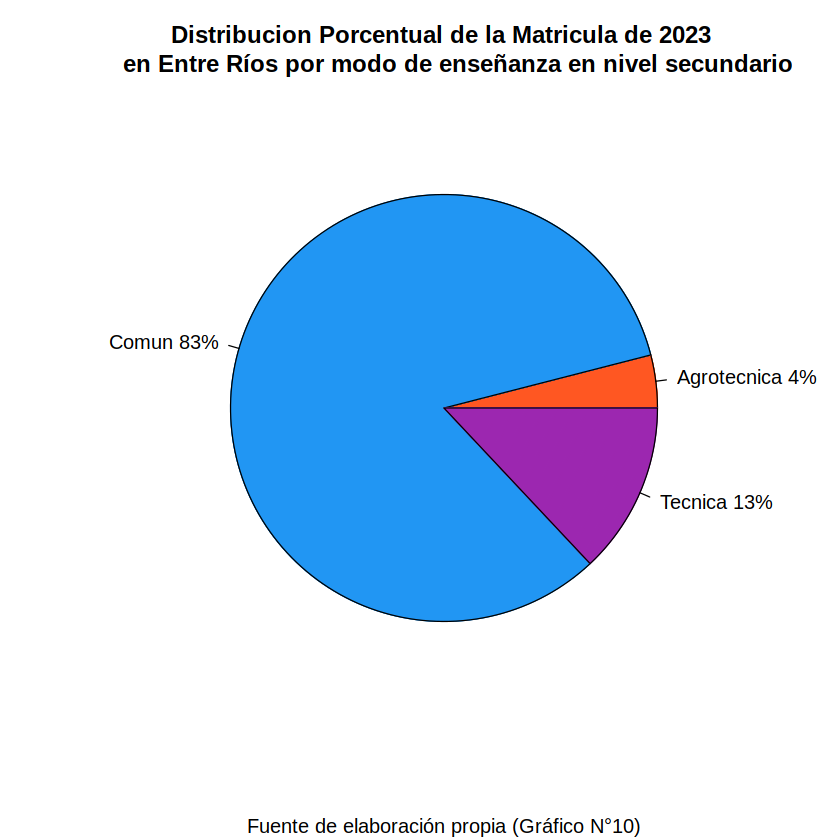

In [52]:
#Distribucion de modalidad de eseñanza
# Calcular los porcentajes
pie_commute <- round(100 * table(Victoria_secundaria$ModEnseñanza) / length(Victoria_secundaria$ModEnseñanza))

# Verificar y limpiar los nombres de las categorías
names(pie_commute) <- make.names(names(pie_commute))

# Definir colores
colors <- c('#ff5722', '#2196f3', '#9c27b0')

# Crear el gráfico de torta
pie(pie_commute, 
    labels = paste0(names(pie_commute), ' ', pie_commute, '%'),
    col = colors,
    radius = 0.75,
    main = "Distribucion Porcentual de la Matricula de 2023 \n    en Entre Ríos por modo de enseñanza en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia (Gráfico N°10)",
    col.sub = "black",
    density = 500, angle = seq(0, 180, 35),
    border = 'black')


In [53]:
#Distribucion de la matricula por nivel de enseñanza

# Calcular los porcentajes
pie_commute <- round(100 * table(Victoria_secundaria$ModEnseñanza) / length(Victoria_secundaria$ModEnseñanza))


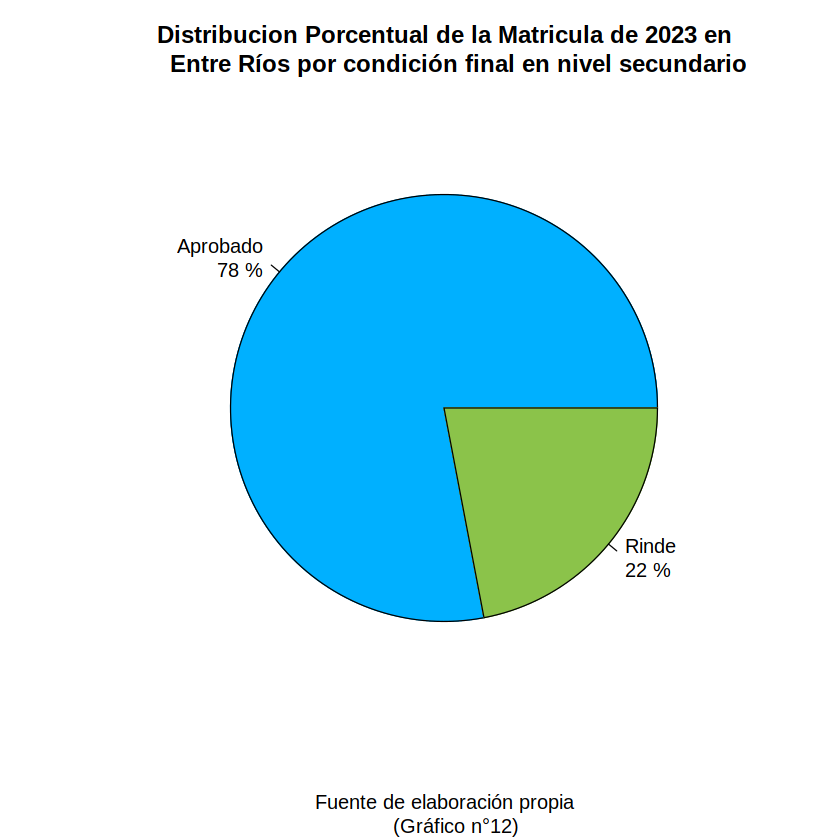

In [54]:
#Distribucion de alumnos segun condicion final
pie_commute <- round(100 * table(Victoria_secundaria$Condición) / length(Victoria_secundaria$Condición))

colors = c(celeste,verde_claro)
pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
    Entre Ríos por condición final en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico n°12)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'black')

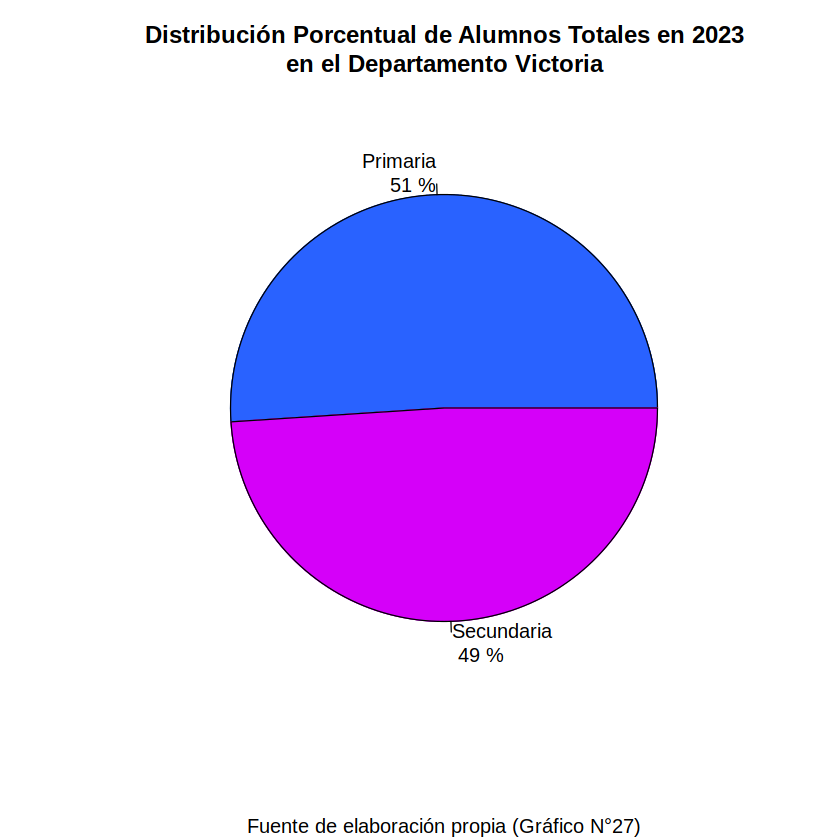

In [55]:
matriculas_primaria <- 3182 #Cantidad de alumnos tomadas del dataset primaria
matriculas_secundaria <- length(unique(secundaria_VICTORIA$Documento))
total_matriculas <- matriculas_primaria + matriculas_secundaria

# Calcular los porcentajes
porcentaje_primaria <- round(100 * matriculas_primaria / total_matriculas, 1)
porcentaje_secundaria <- round(100 * matriculas_secundaria / total_matriculas, 1)

# Títulos para las etiquetas
titulos <- c(paste("Primaria\n", porcentaje_primaria, "%"), 
             paste("Secundaria\n", porcentaje_secundaria, "%"))

#Colores para el grafico
colors = c(azul,violeta_rosado)

# Crear el gráfico de torta
pie(c(matriculas_primaria, matriculas_secundaria),
    labels = titulos,
    col = colors,
    radius = .75,
    main = "Distribución Porcentual de Alumnos Totales en 2023\nen el Departamento Victoria",
    col.main = "black",
    sub = "Fuente de elaboración propia (Gráfico N°27)",
    col.sub = "black",
    density = 500,
    angle = seq(0, 180, 35),
    border = 'black')

In [56]:
secundarias_privadas <- filter(Victoria_secundaria_unico, EsPrivada == "S")

In [57]:
dim(secundarias_privadas)

[1] 346   3

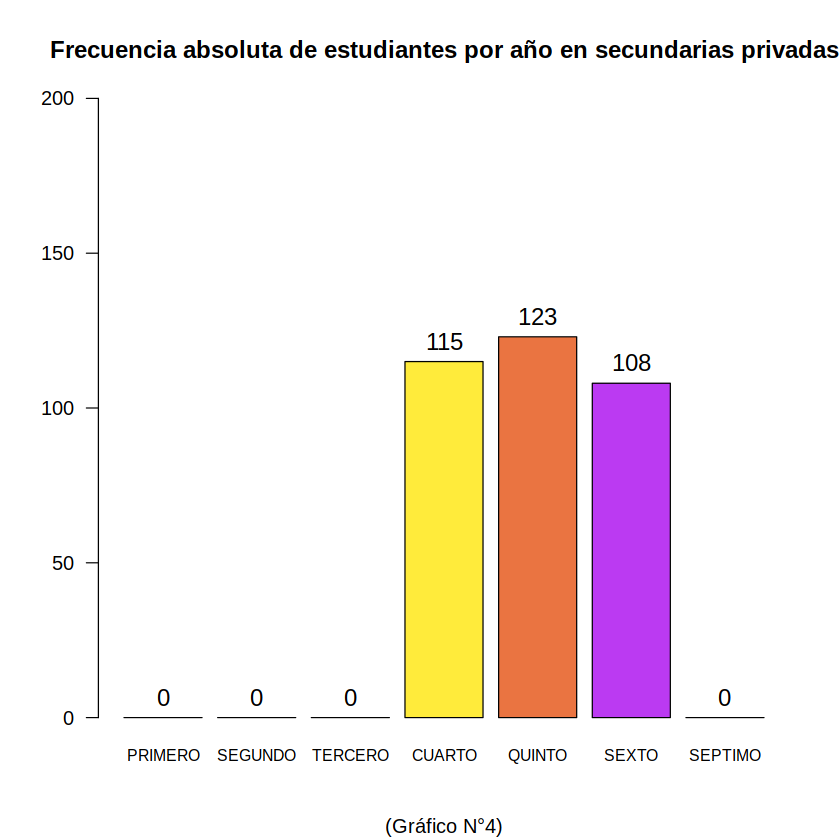

In [58]:
#Distribucion de alumnos por año en colegios secundarios PRIVADOS
#Define todas las categorías (años)
categorias <- c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO', 'SEPTIMO')

# Calcula la tabla de frecuencias
tabla <- table(secundarias_privadas$Año_Curso)

# Completa la tabla con todas las categorías
tabla_completa <- table(factor(secundarias_privadas$Año_Curso, levels = categorias))

# Graficamos
bp <- barplot(tabla_completa, 
               main = "Frecuencia absoluta de estudiantes por año en secundarias privadas",
               sub = "(Gráfico N°4)",
               col.sub = "black",
               col = c(rojo_pastel, azul, verde, amarillo, naranja, violeta, azul_violeta), 
               ylim = c(0, 200), 
               las = 1,
               cex.names = 0.79)

# Agrega etiquetas con los porcentajes
text(x = bp, 
     y = tabla_completa, 
     labels = paste(tabla_completa), 
     pos = 3,  # Posición para ubicar el texto (encima de la barra)
     cex = 1.2,  # Tamaño del texto
     col = "black")  # Color del texto

-----------------

## Guia ejercicios 4-5

In [59]:
#Aunque lo tenemos arriba, lo leemos nuevamente 
secundaria_VICTORIA <- read_excel("VICTORIA_SECUNDARIA_LIMPIA.xlsx")

In [60]:
#CHEQUEAMOS FALTA DE DATOS EN PRIMERO SEGUNDO TERCERO Y SEPTIMO COLEGIOS PRIVADOS SECUNDARIOS

In [61]:
aux <- filter(secundaria_VICTORIA,EsPrivada == "S")

In [62]:
names(aux)
unique(aux$`NivelEnseñanza`)
dim(aux)

[1] "CodigoUnicoEscolar" "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "asignatura"        
 [7] "idalumno"           "observaciones"      "idSubOrganizacion" 
[10] "idDivision"         "NivelEnseñanza"     "orden"             
[13] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[16] "Modalidad"          "ModEnseñanza"       "NotasPrimerT"      
[19] "NotasSegundoT"      "NotasTercerT"       "Promedio"          
[22] "Condición"          "Año_Curso"

[1] "SECUNDARIO"

[1] 5722   23

In [63]:
unique(aux$Año_Curso)
#No hay colegios privados de primer,segundo y tercer año

[1] "SEXTO"  "QUINTO" "CUARTO"

In [64]:
unique(secundaria_VICTORIA$ModEnseñanza)

[1] "Comun"       "Tecnica"     "Agrotecnica"

------------------

### ANALISIS SECUNDARIA POR AÑOS (PRIMERO - SEGUNDO - TERCERO - CUARTO - QUINTO - SEXTO - SEPTIMO)

In [65]:
#Separamos el dataset por año de cursado
PRIMERO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "PRIMERO")
SEGUNDO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "SEGUNDO")
TERCERO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "TERCERO")
CUARTO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "CUARTO")
QUINTO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "QUINTO")
SEXTO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "SEXTO")
SEPTIMO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "SEPTIMO")

In [66]:
#A modo de verificacion contamos la cantidad de alumnos en cada año
alumnos_PRIMERO <- PRIMERO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos PRIMERO: ",dim(alumnos_PRIMERO)[1], "\n")

alumnos_SEGUNDO <- SEGUNDO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos SEGUNDO: ",dim(alumnos_SEGUNDO)[1], "\n")

alumnos_TERCERO <- TERCERO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos TERCERO: ",dim(alumnos_TERCERO)[1], "\n")

alumnos_CUARTO <- CUARTO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos CUARTO: ",dim(alumnos_CUARTO)[1], "\n")

alumnos_QUINTO <- QUINTO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos QUINTO: ",dim(alumnos_QUINTO)[1], "\n")

alumnos_SEXTO <- SEXTO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos SEXTO: ",dim(alumnos_SEXTO)[1], "\n")

alumnos_SEPTIMO <- SEPTIMO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos SEPTIMO: ",dim(alumnos_SEPTIMO)[1], "\n")

N° alumnos PRIMERO:  594 
N° alumnos SEGUNDO:  631 
N° alumnos TERCERO:  530 
N° alumnos CUARTO:  481 
N° alumnos QUINTO:  396 
N° alumnos SEXTO:  371 
N° alumnos SEPTIMO:  50 


### PRIMERO

Mediana MATEMATICA 6.33 
Mediana LENGUA Y LITERATURA 6.67 
Mediana EDUCACION FISICA 8 
Mediana INGLES 7.33

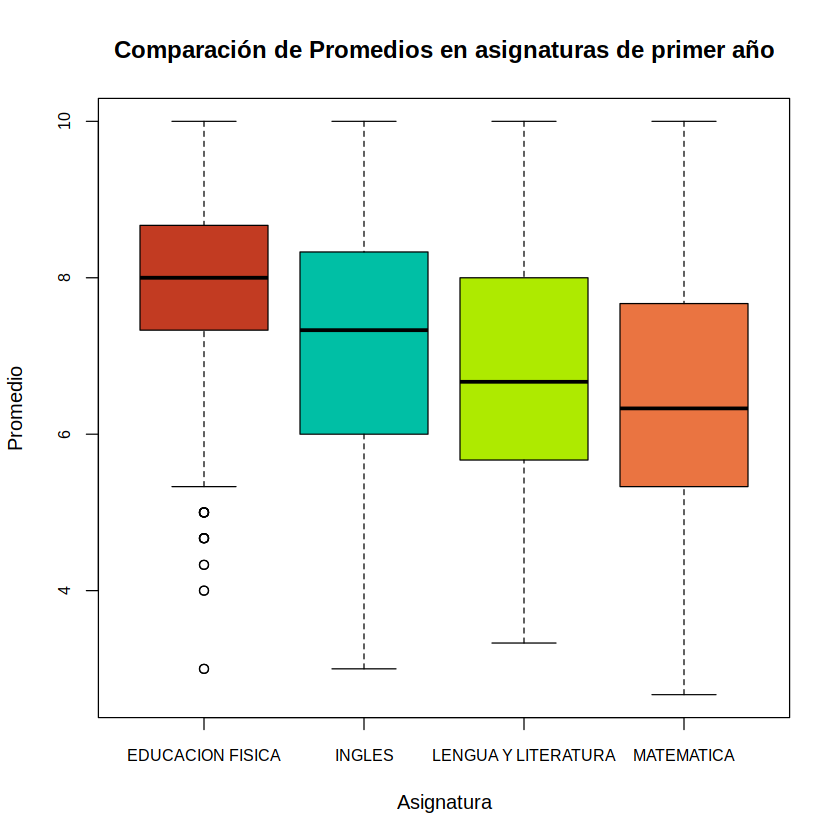

In [67]:
#Boxplots comparativos asignaturas PRIMER AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de primer año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"], na.rm = TRUE))

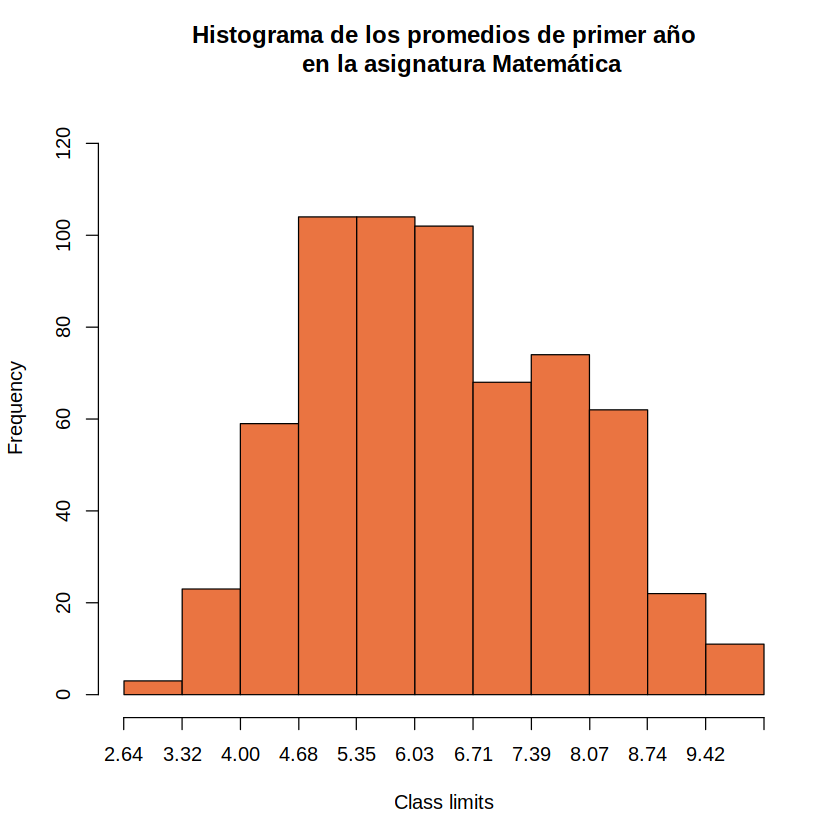

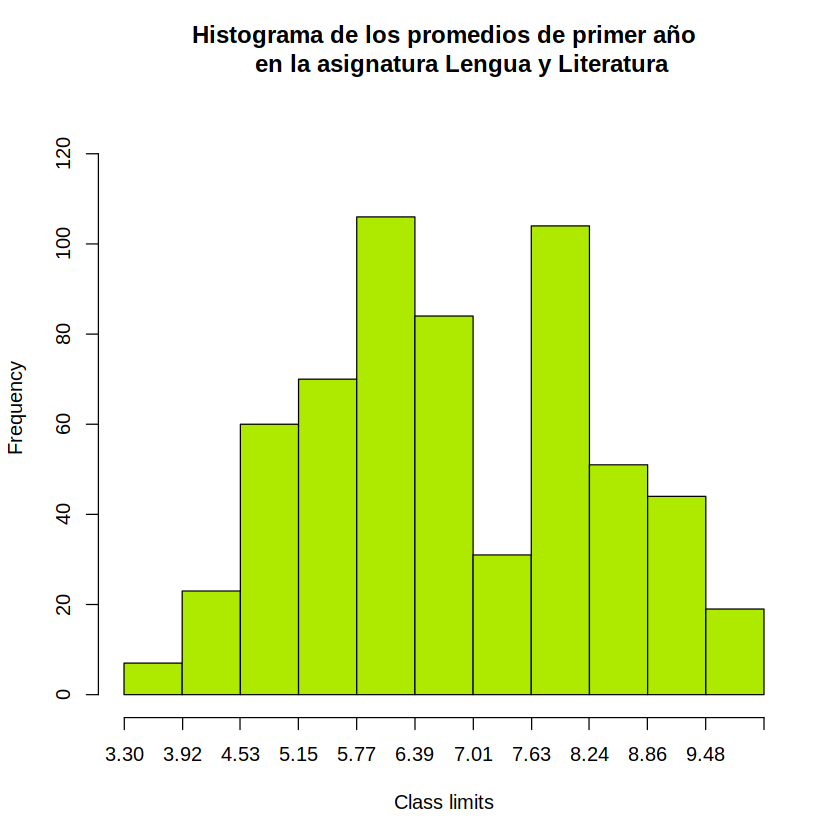

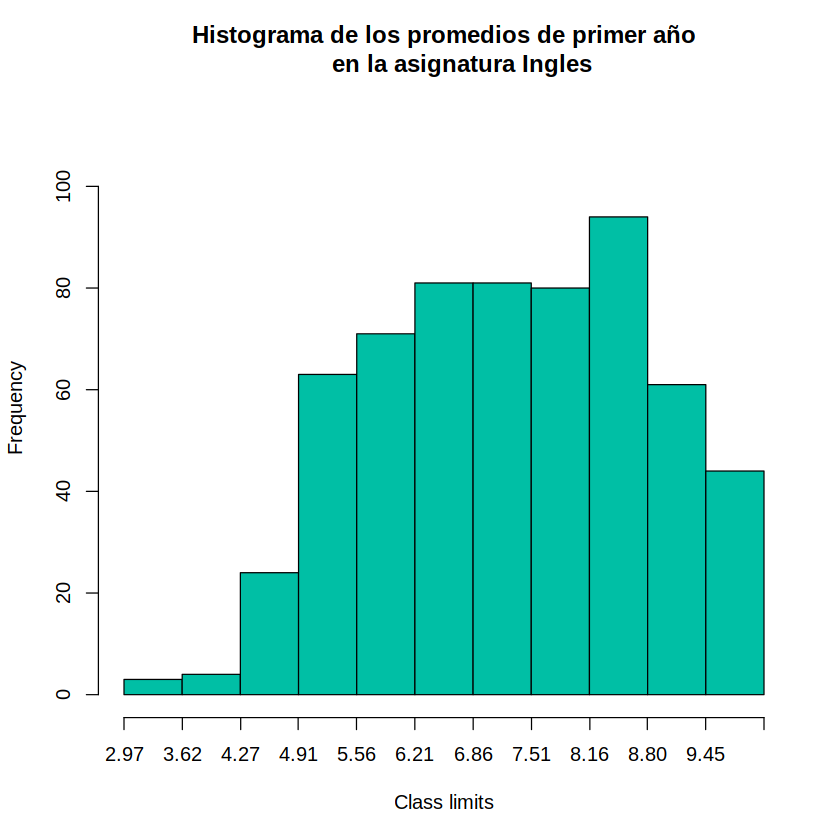

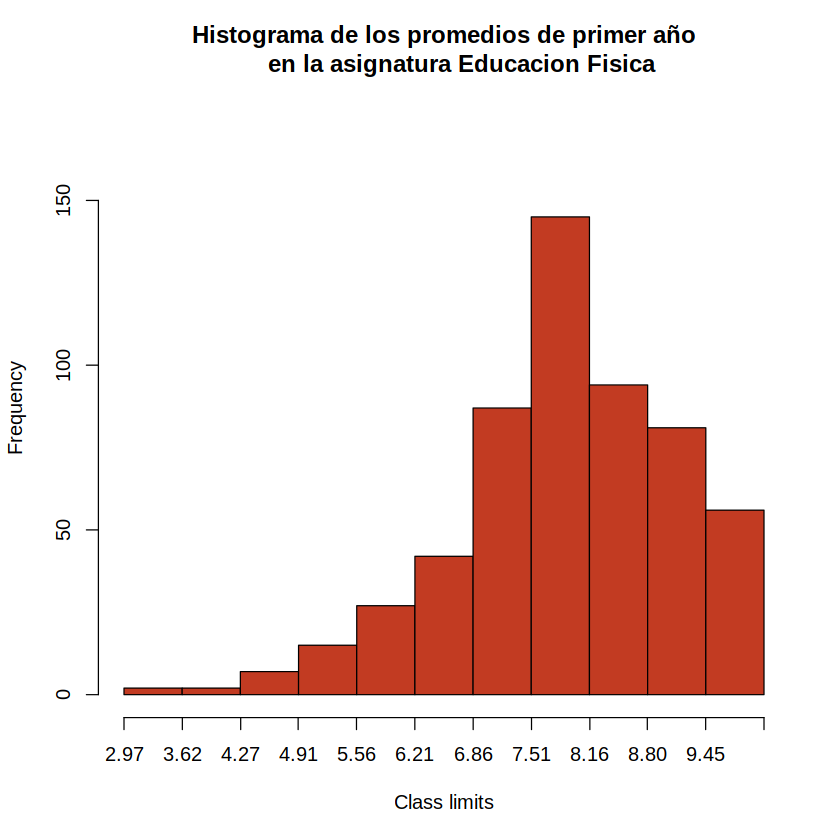

In [68]:
#Graficamos HISTOGRAMAS de los promedios de las materias de primer año

#MATEMATICA
Notas_matematica <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de primer año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de primer año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de primer año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de primer año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

### SEGUNDO

Mediana MATEMATICA 5.33 
Mediana LENGUA Y LITERATURA 6.33 
Mediana EDUCACION FISICA 8 
Mediana INGLES 7.33

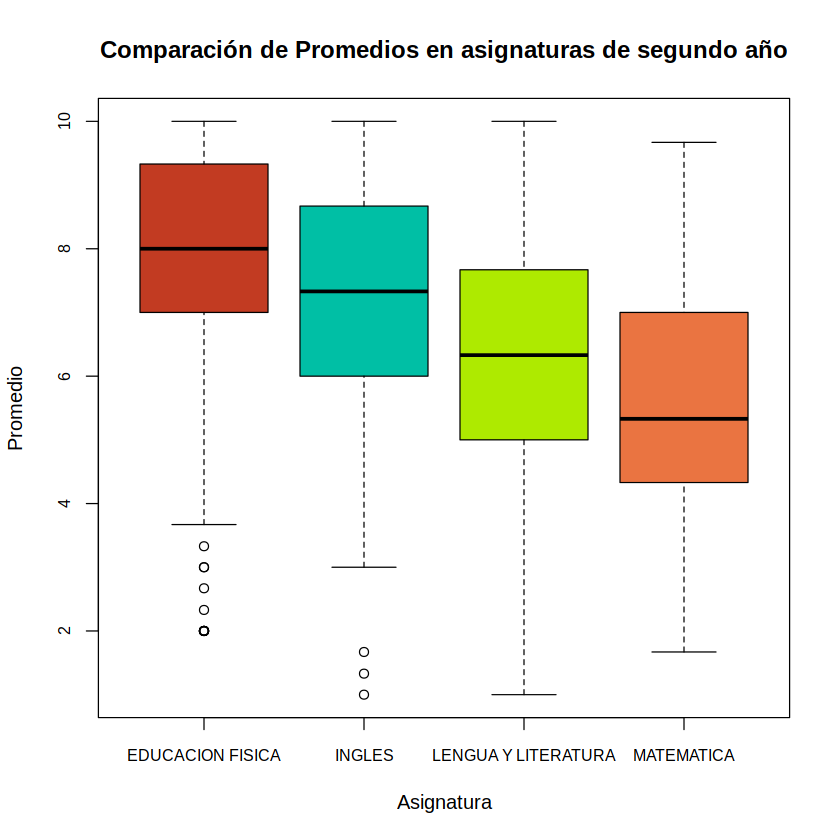

In [69]:
#Boxplots comparativos asignaturas SEGUNDO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de segundo año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

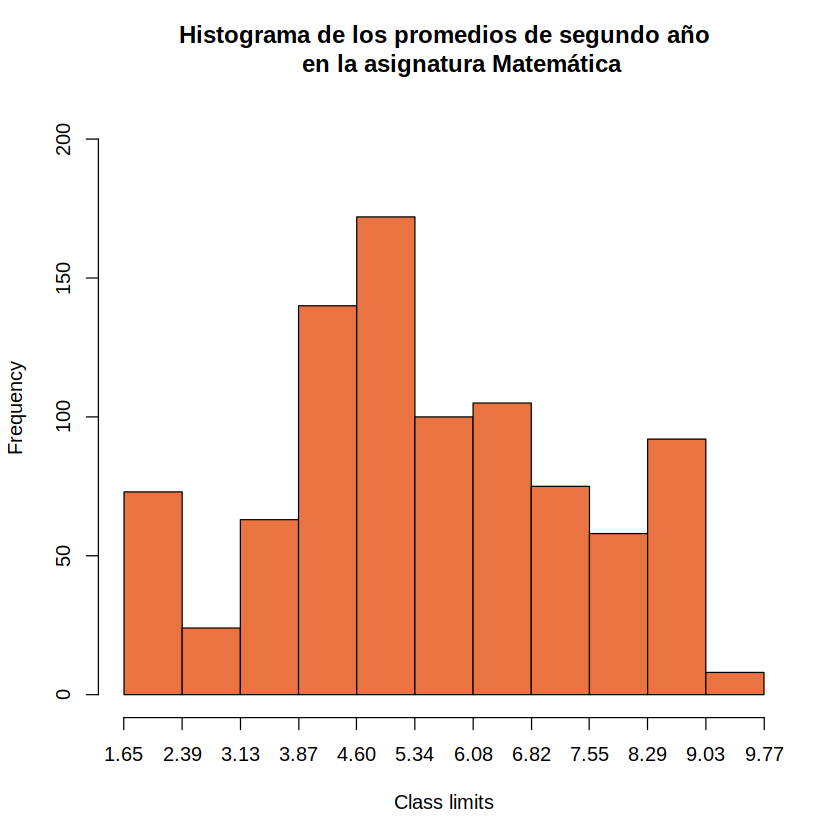

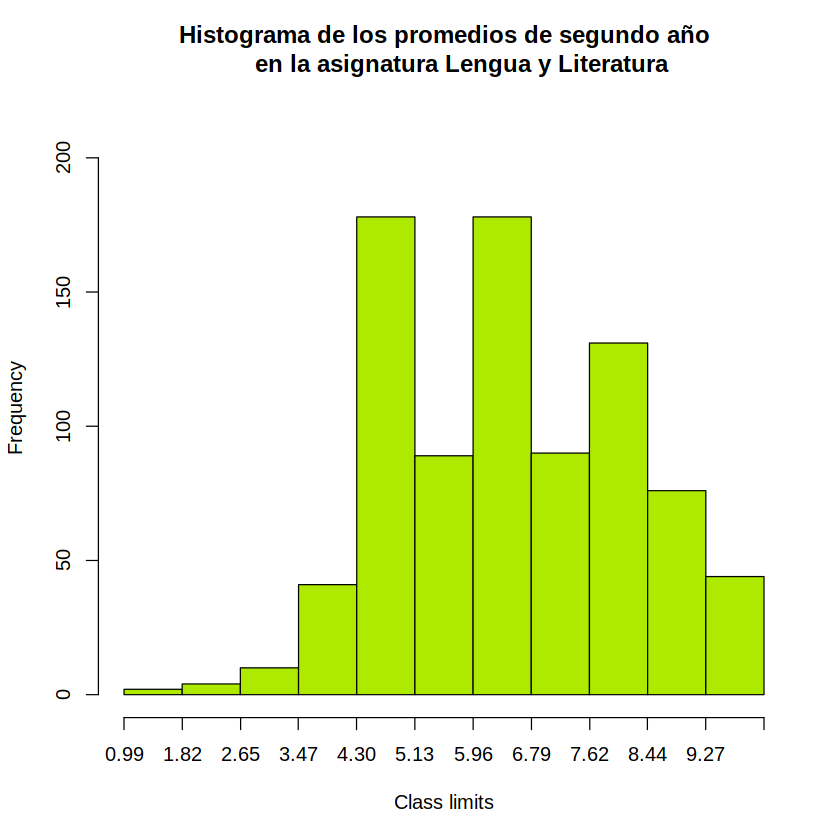

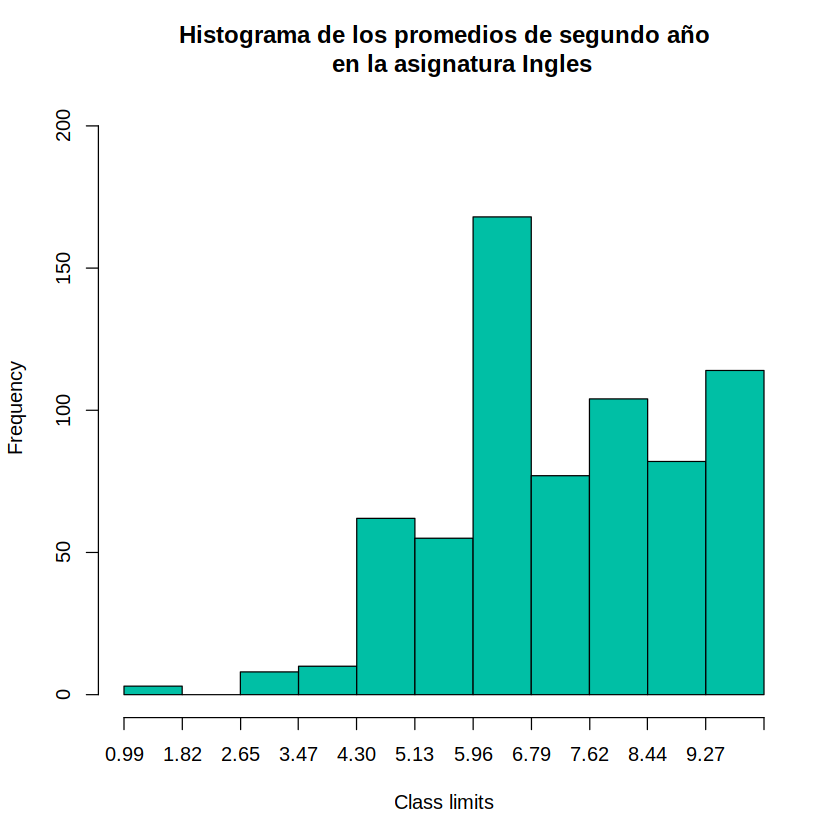

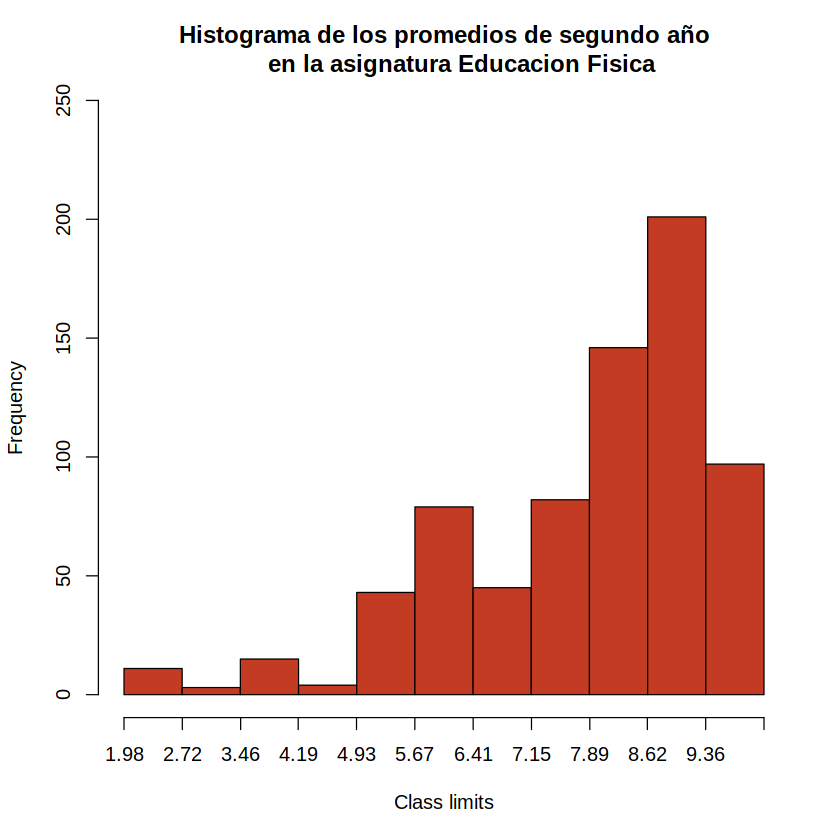

In [70]:
#Graficamos HISTOGRAMAS de los promedios de las materias de segundo año

#MATEMATICA
Notas_matematica <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de segundo año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de segundo año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de segundo año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de segundo año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

### TERCERO

Mediana MATEMATICA 6 
Mediana LENGUA Y LITERATURA 6.67 
Mediana EDUCACION FISICA 8 
Mediana INGLES 7.33

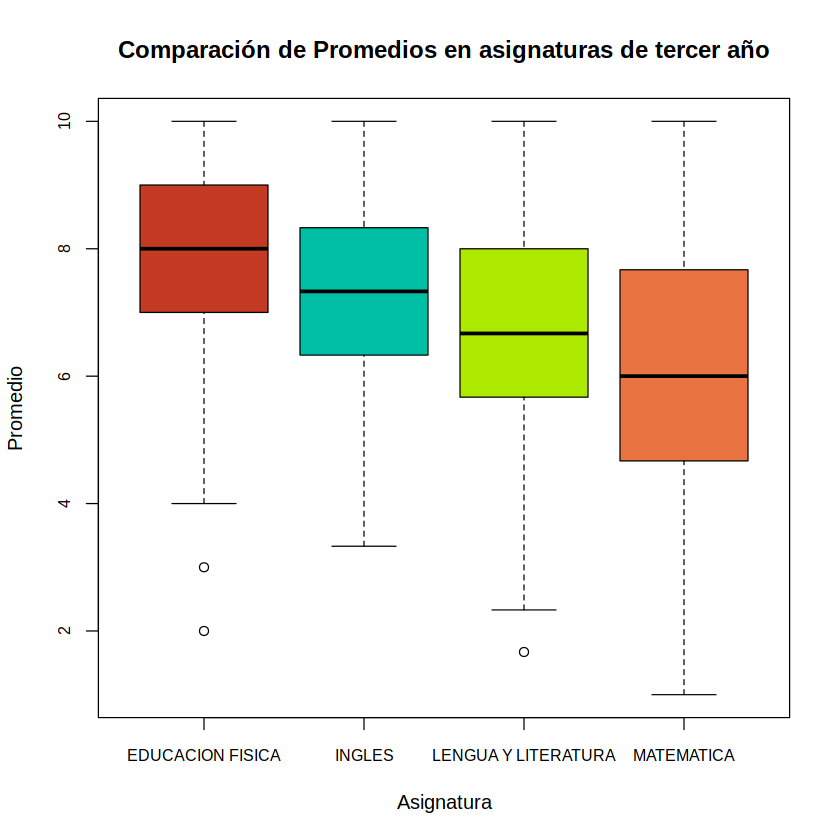

In [71]:
#Boxplots comparativos asignaturas TERCER AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- TERCERO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de tercer año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

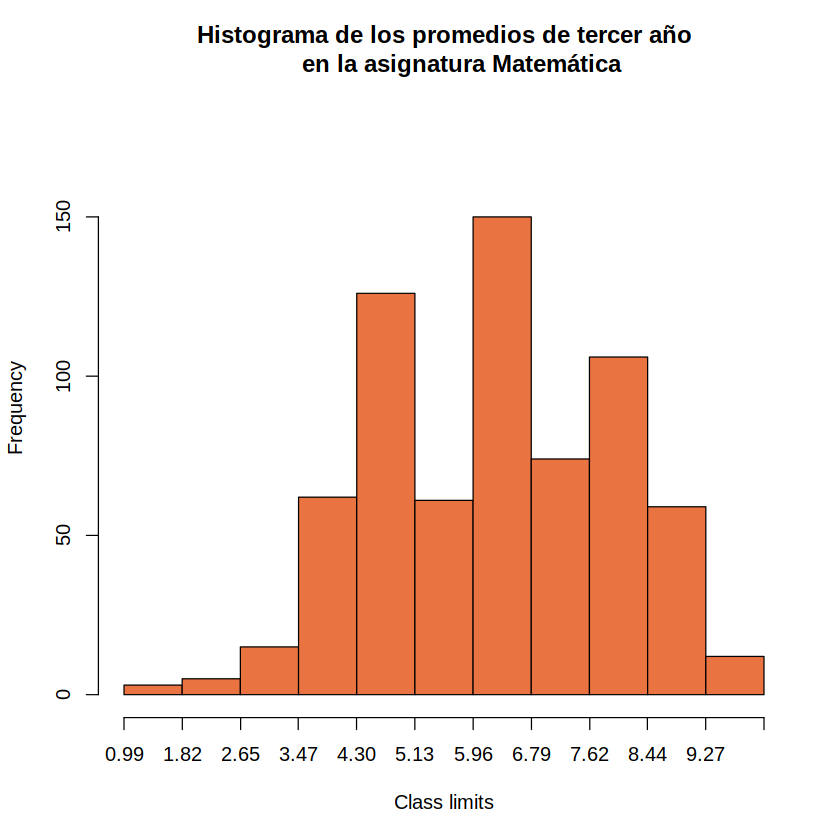

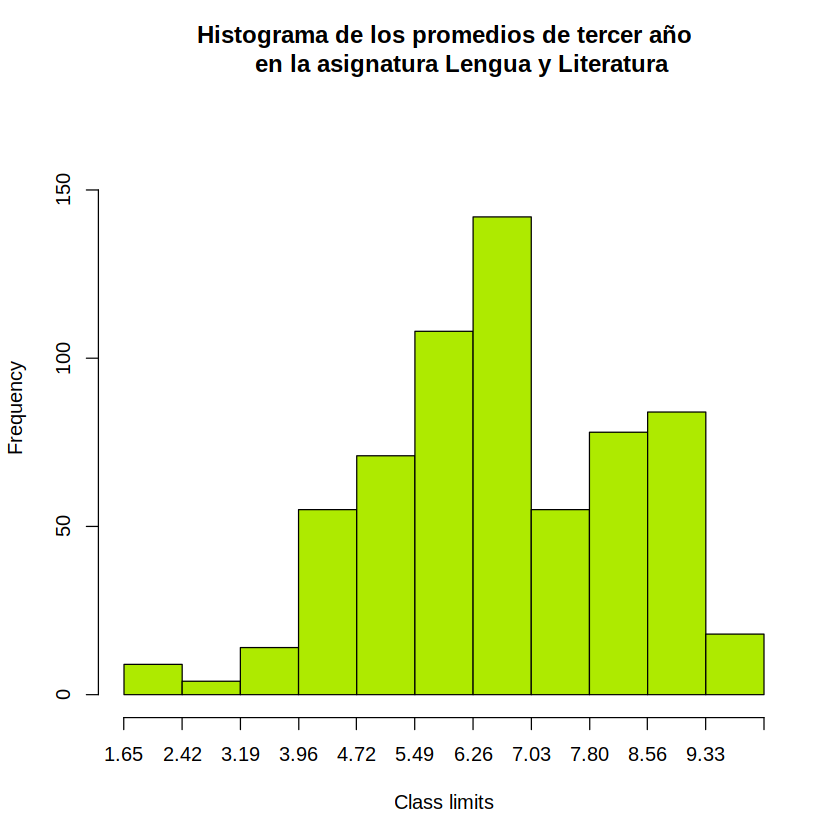

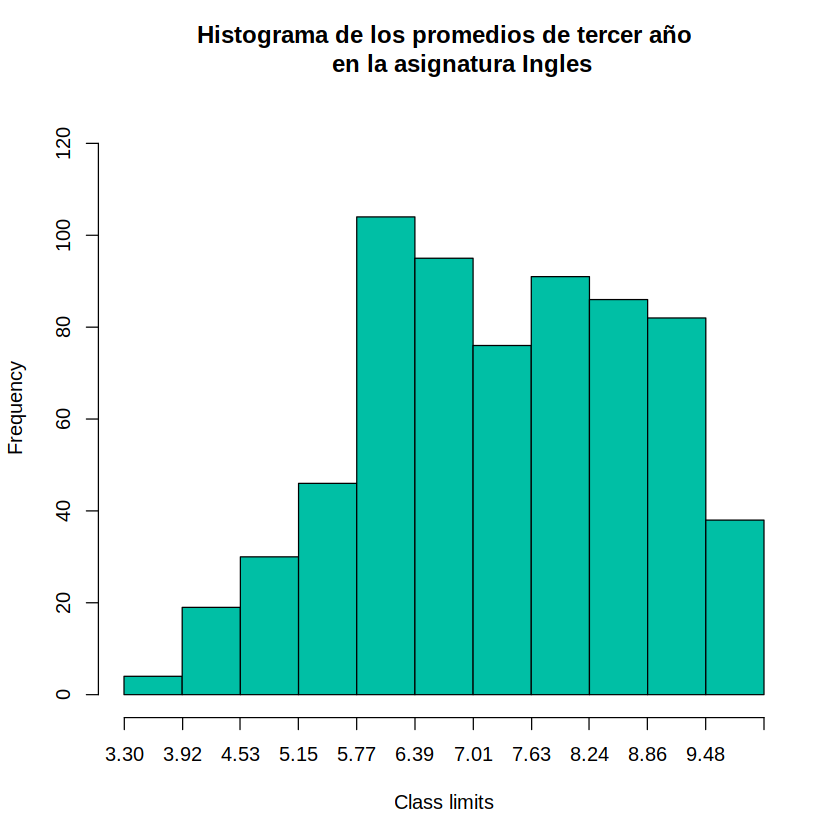

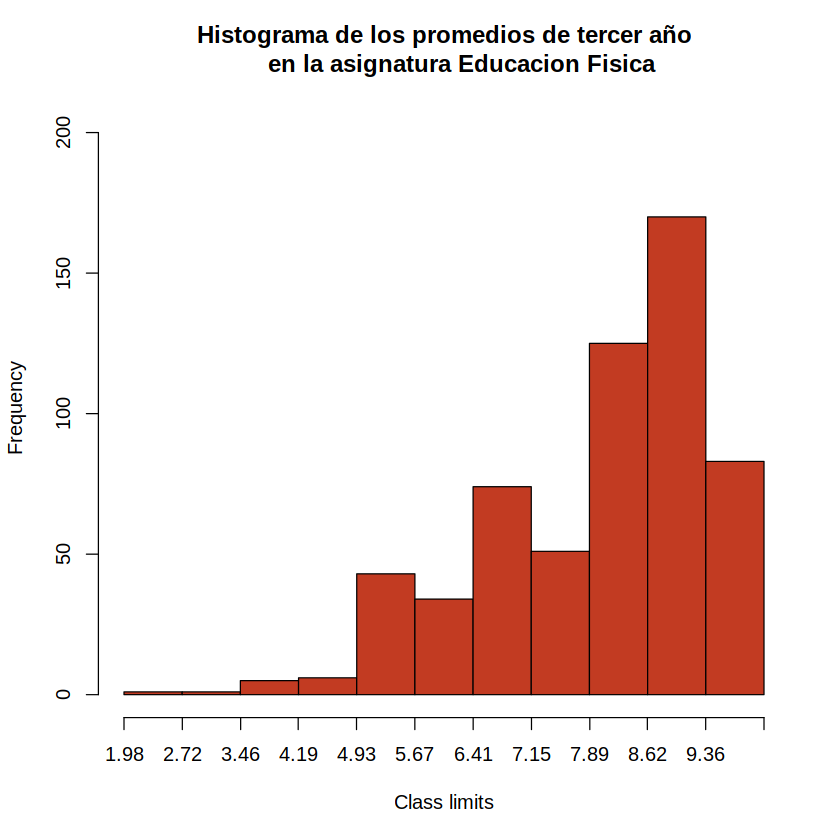

In [72]:
#Graficamos HISTOGRAMAS de los promedios de las materias de tercer año

#MATEMATICA
Notas_matematica <- TERCERO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de tercer año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- TERCERO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de tercer año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- TERCERO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de tercer año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- TERCERO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de tercer año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

### CUARTO

Mediana MATEMATICA 6 
Mediana LENGUA Y LITERATURA 7 
Mediana EDUCACION FISICA 8.33 
Mediana INGLES 7.67

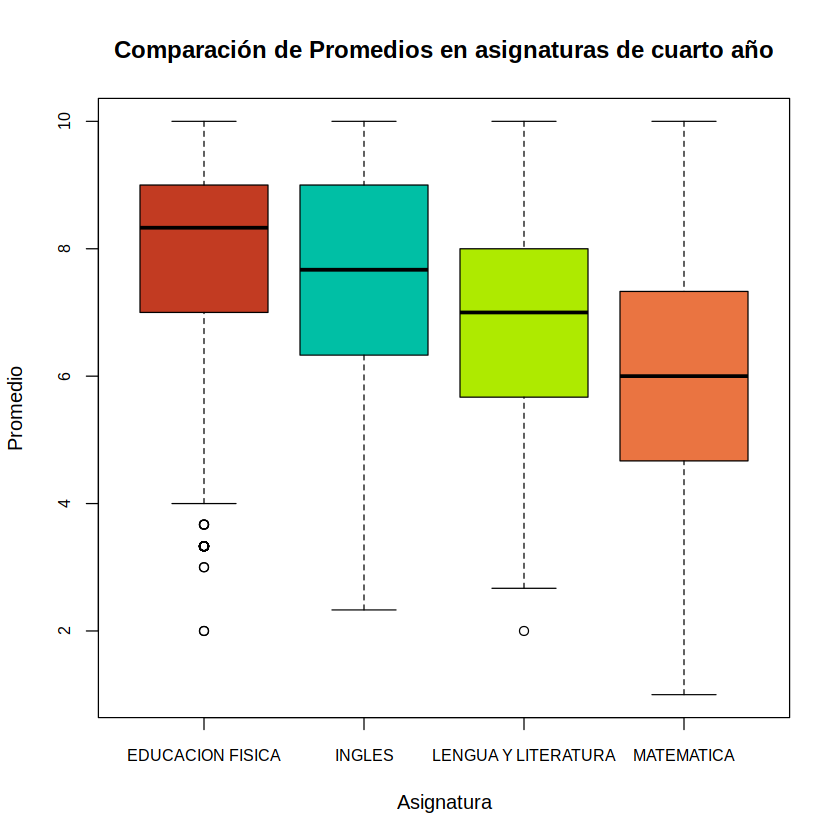

In [73]:
#Boxplots comparativos asignaturas CUARTO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- CUARTO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de cuarto año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

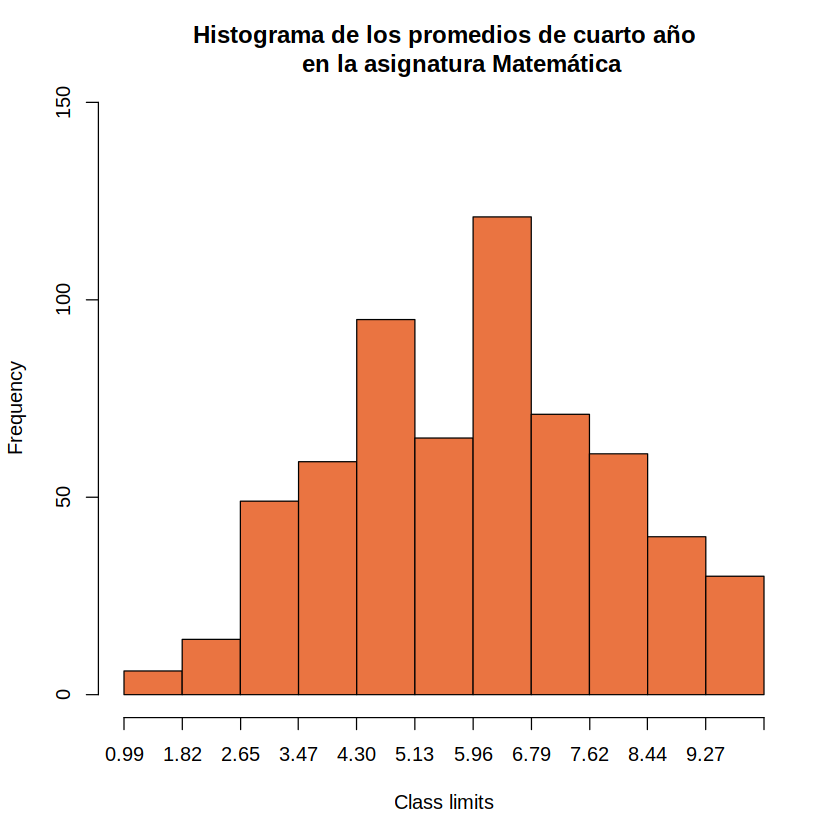

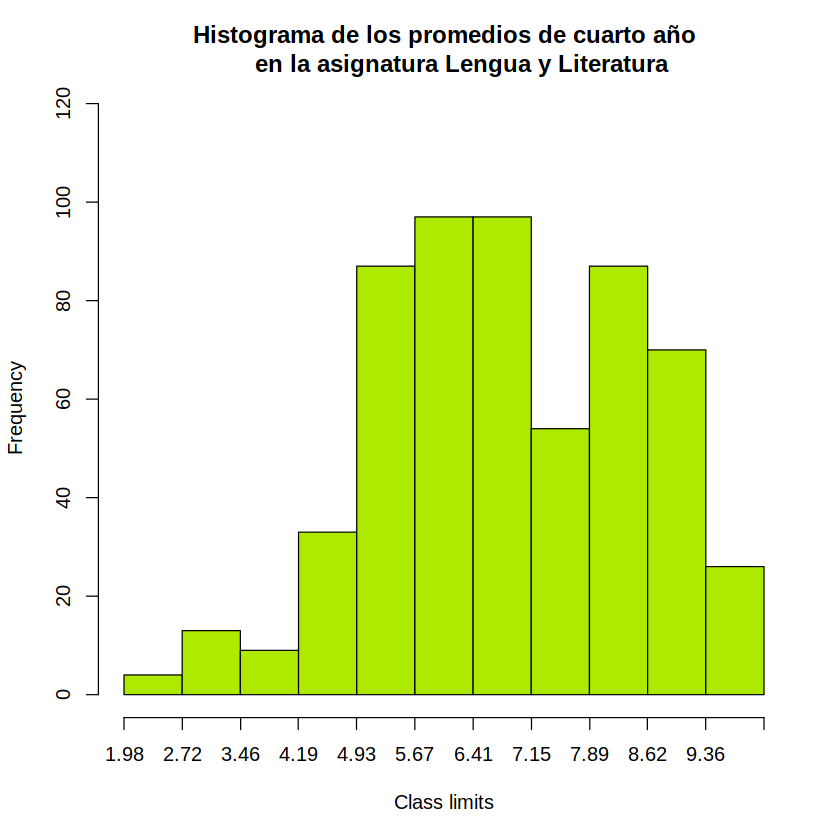

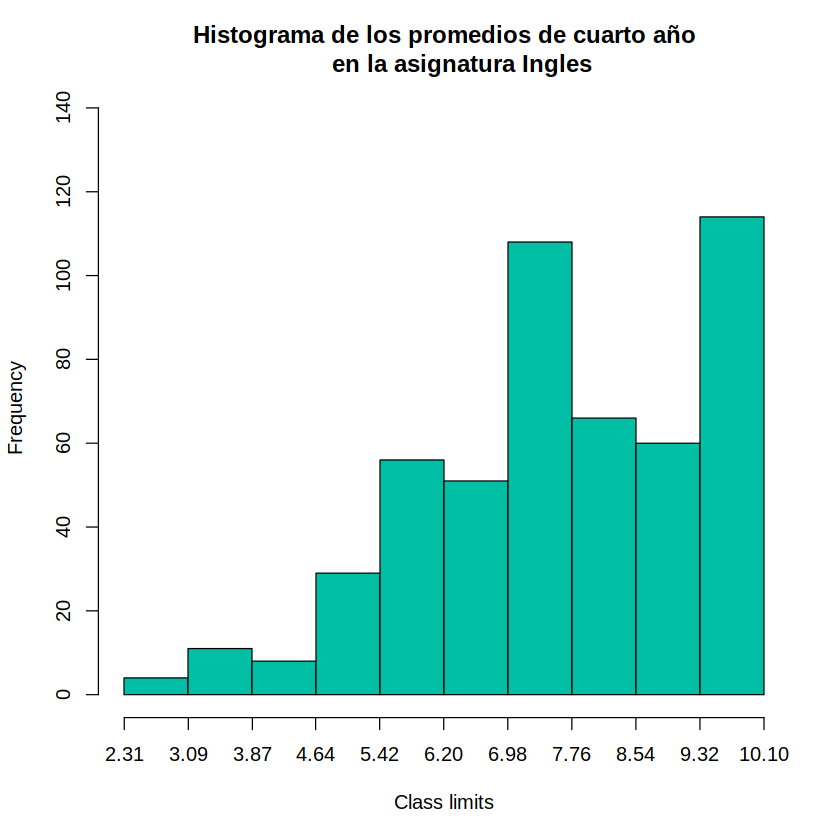

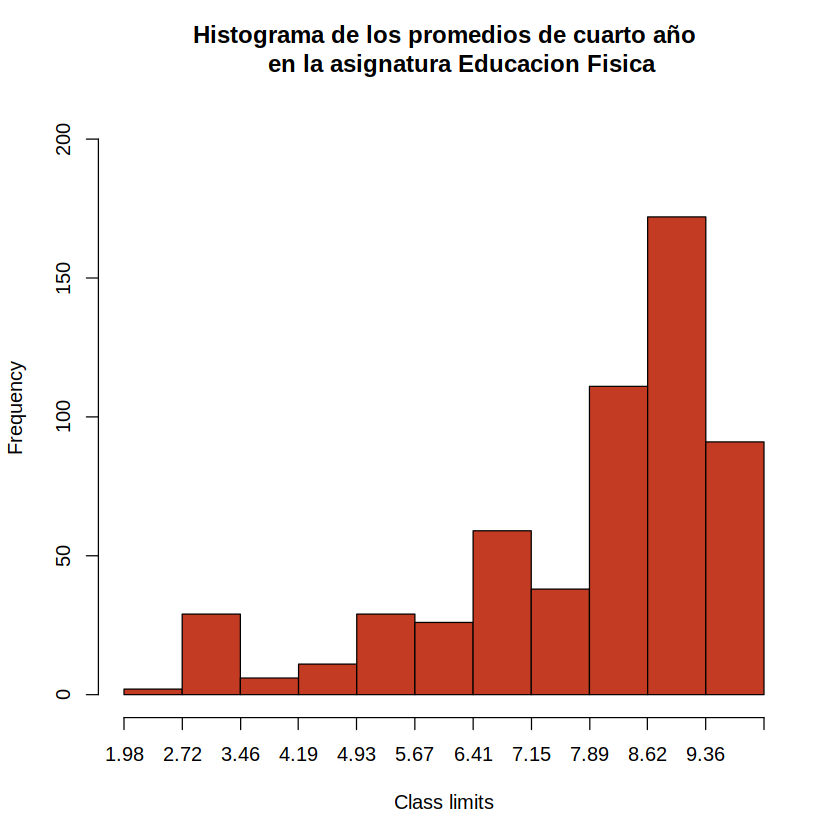

In [74]:
#Graficamos HISTOGRAMAS de los promedios de las materias de cuarto año

#MATEMATICA
Notas_matematica <- CUARTO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- CUARTO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- CUARTO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- CUARTO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

### QUINTO

Mediana MATEMATICA 6.67 
Mediana LENGUA Y LITERATURA 7.67 
Mediana EDUCACION FISICA 8.33 
Mediana INGLES 8

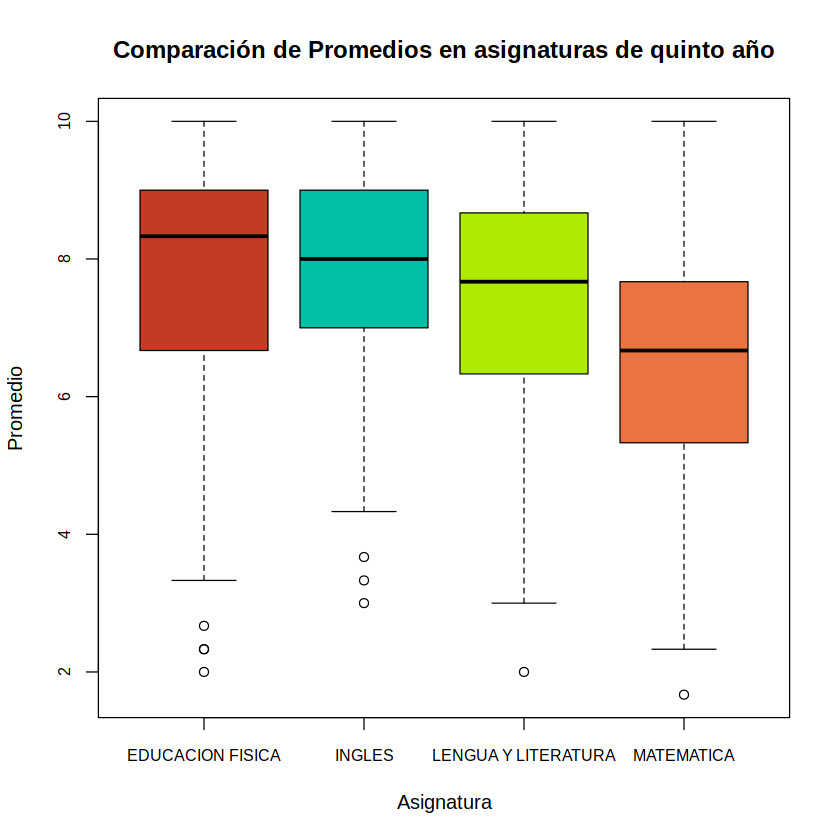

In [75]:
#Boxplots comparativos asignaturas QUINTO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- QUINTO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de quinto año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

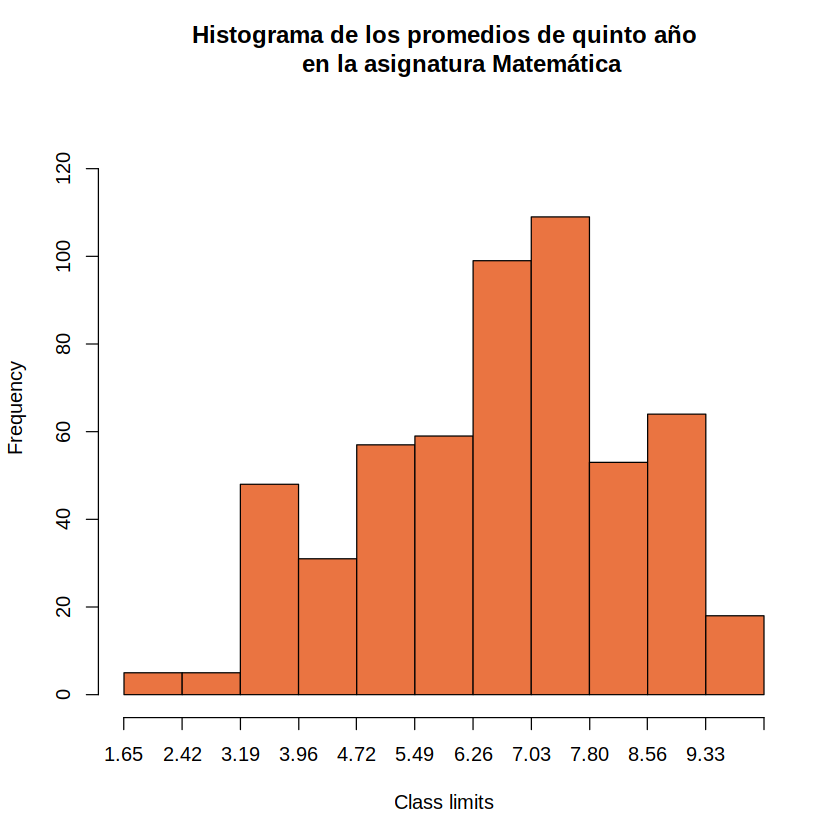

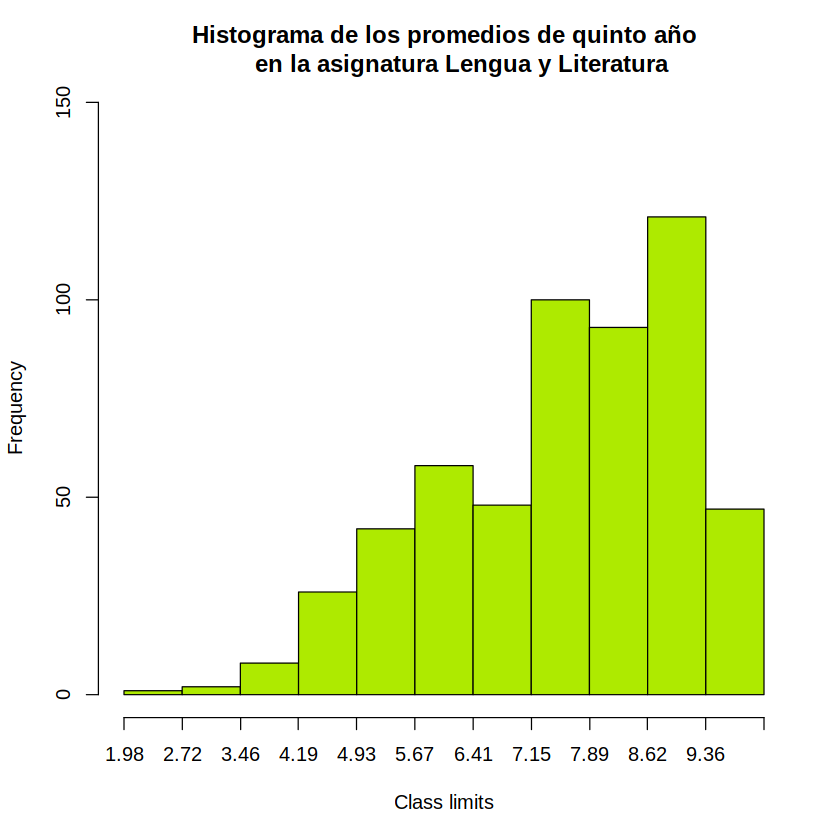

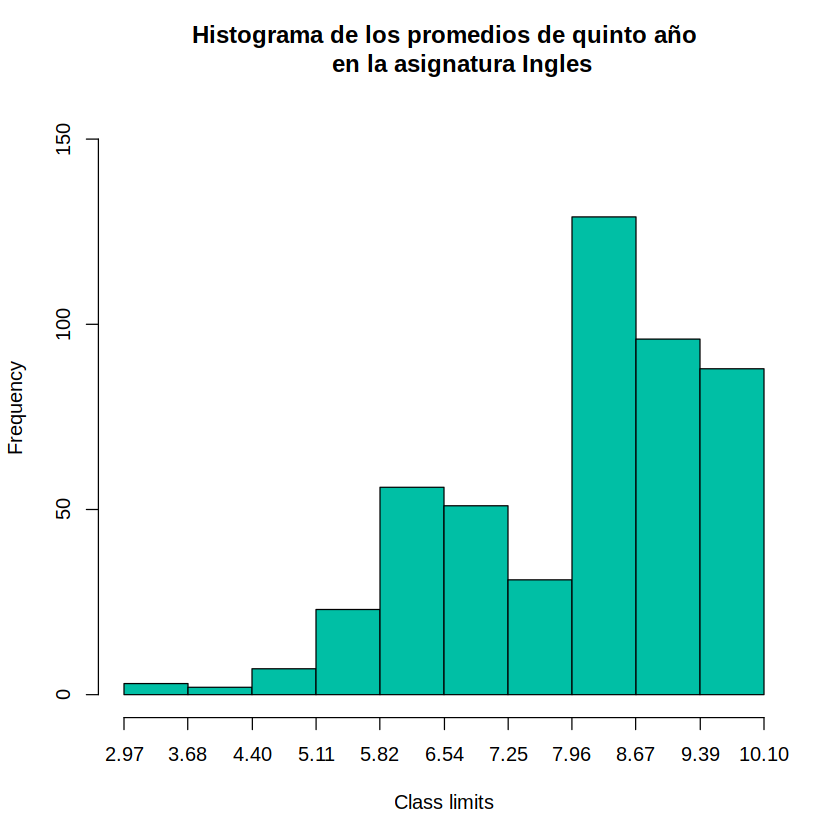

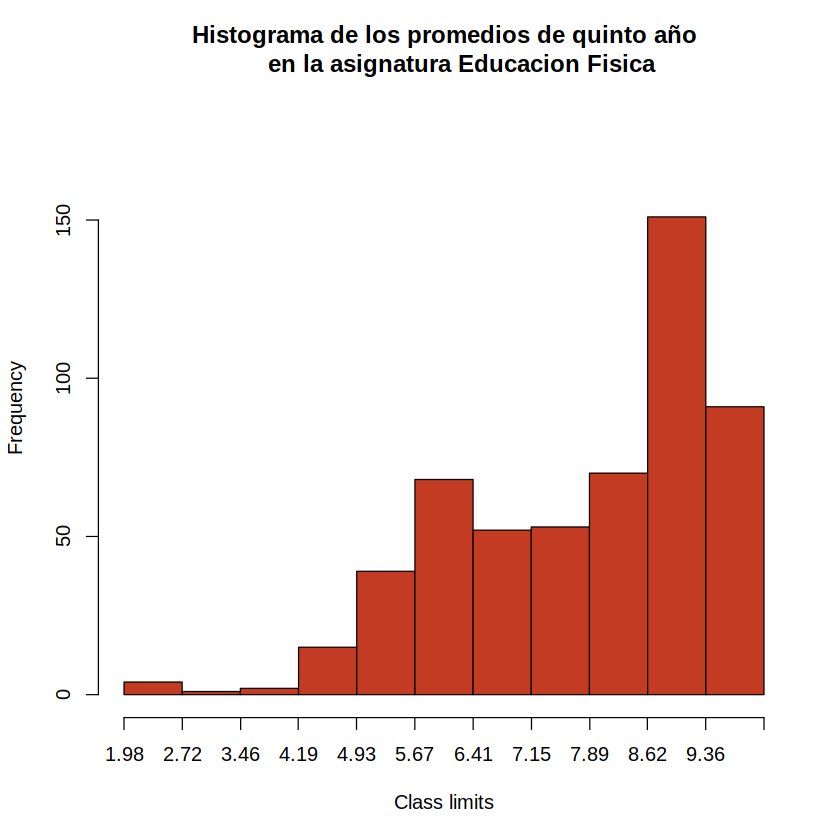

In [76]:
#Graficamos HISTOGRAMAS de los promedios de las materias de quinto año

#MATEMATICA
Notas_matematica <- QUINTO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de quinto año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- QUINTO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de quinto año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- QUINTO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de quinto año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- QUINTO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de quinto año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

### SEXTO

Mediana MATEMATICA 7 
Mediana LENGUA Y LITERATURA 8 
Mediana EDUCACION FISICA 8.33 
Mediana INGLES 8

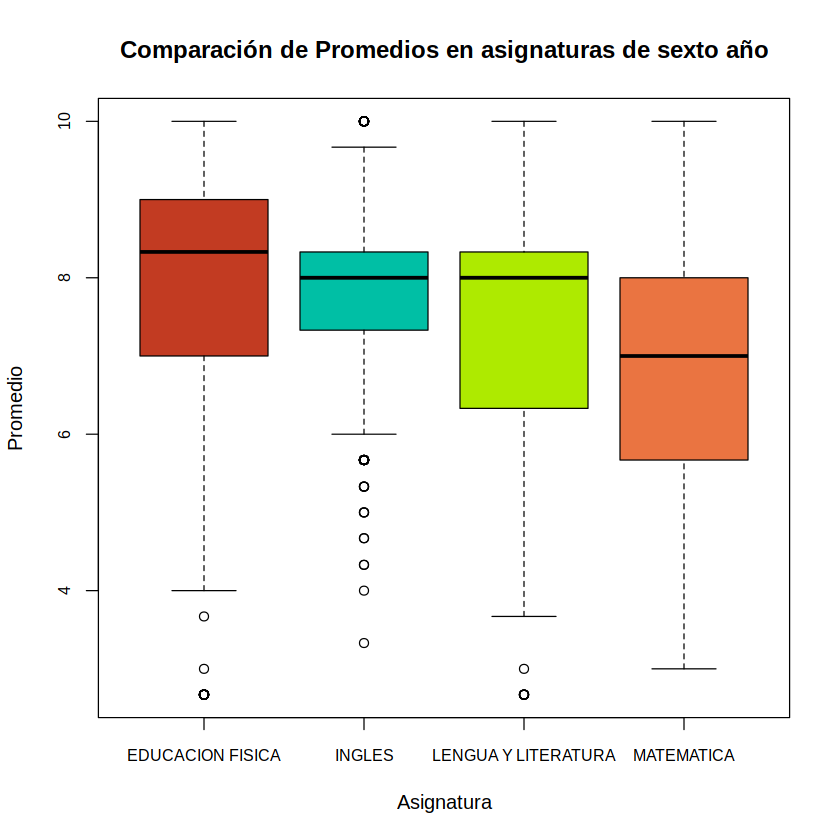

In [77]:
#Boxplots comparativos asignaturas SEXTO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- SEXTO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de sexto año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

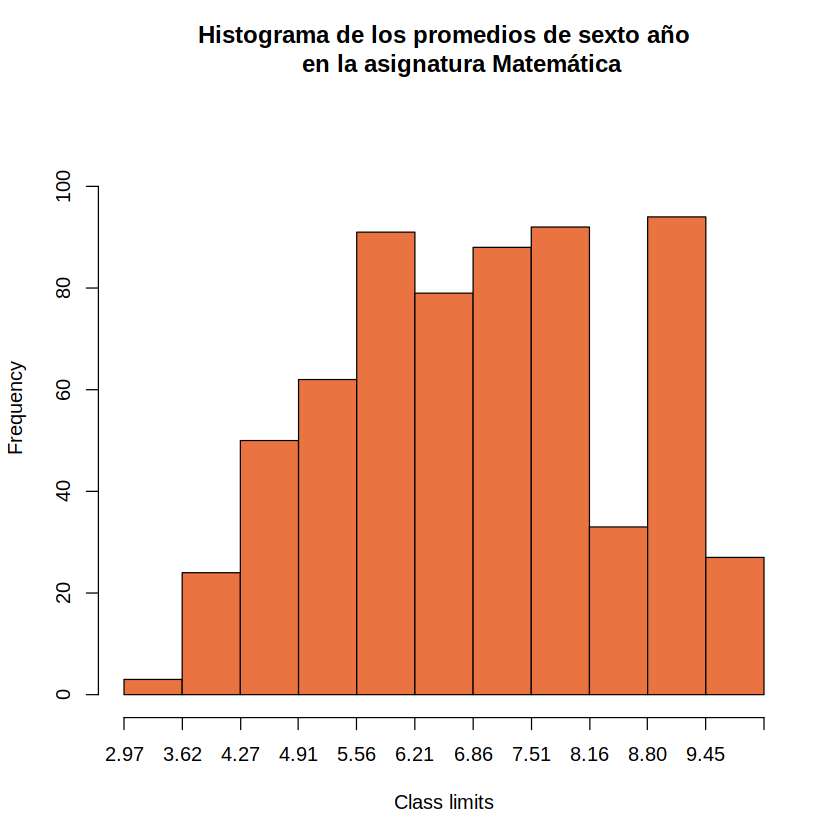

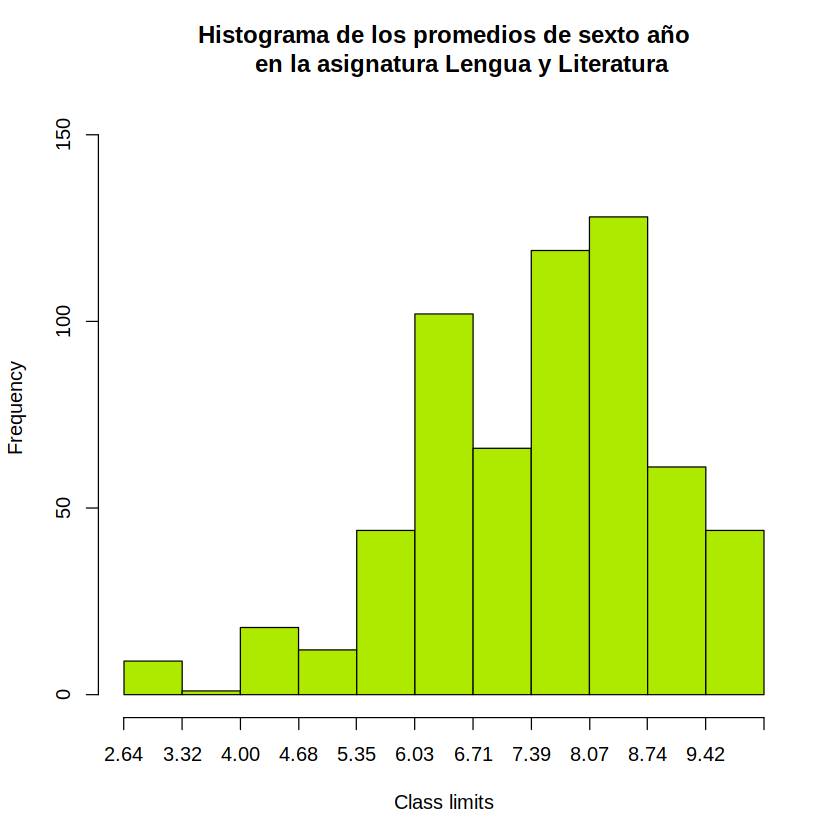

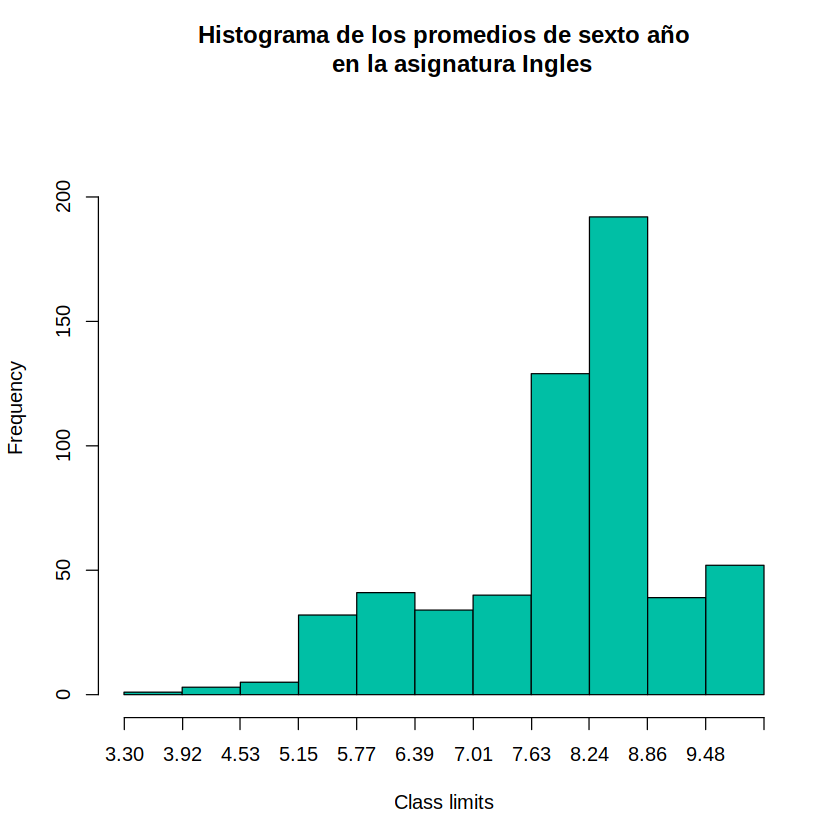

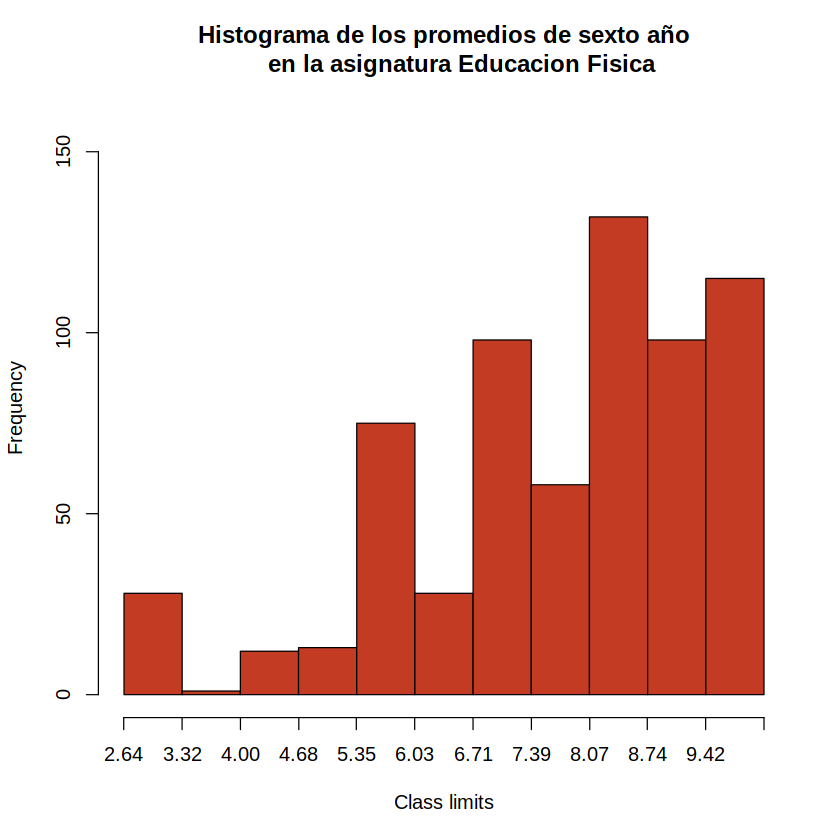

In [78]:
#Graficamos HISTOGRAMAS de los promedios de las materias de sexto año

#MATEMATICA
Notas_matematica <- SEXTO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de sexto año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- SEXTO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de sexto año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- SEXTO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de sexto año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- SEXTO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de sexto año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

### SEPTIMO

Mediana MATEMATICA 7 
Mediana EDUCACION FISICA 7 


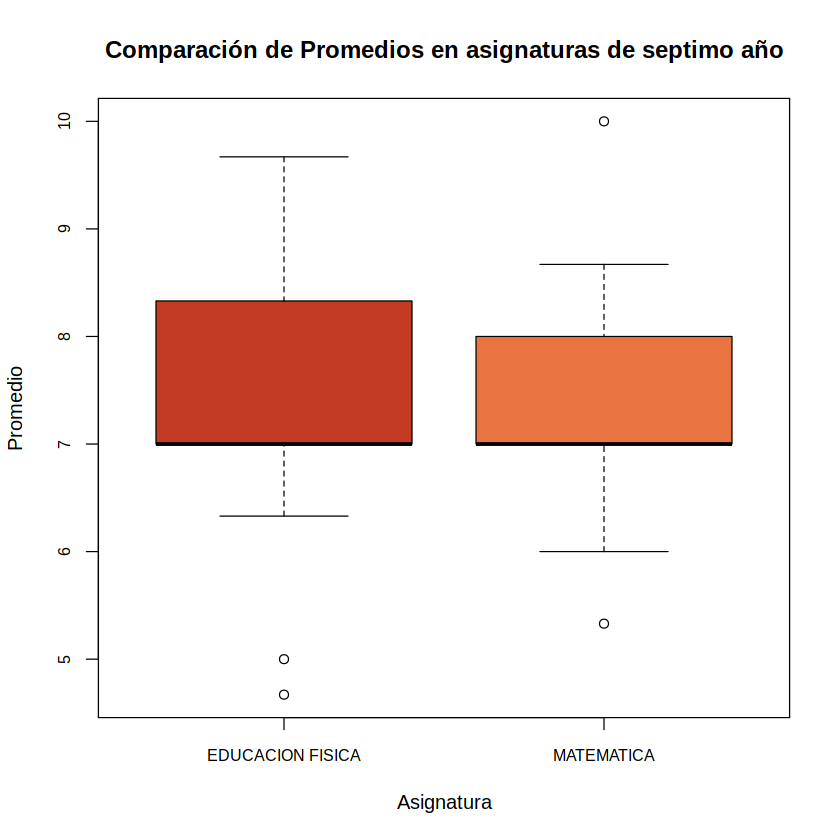

In [79]:
#Boxplots comparativos asignaturas SEPTIMO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- SEPTIMO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "EDUCACION FISICA"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de septimo año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")

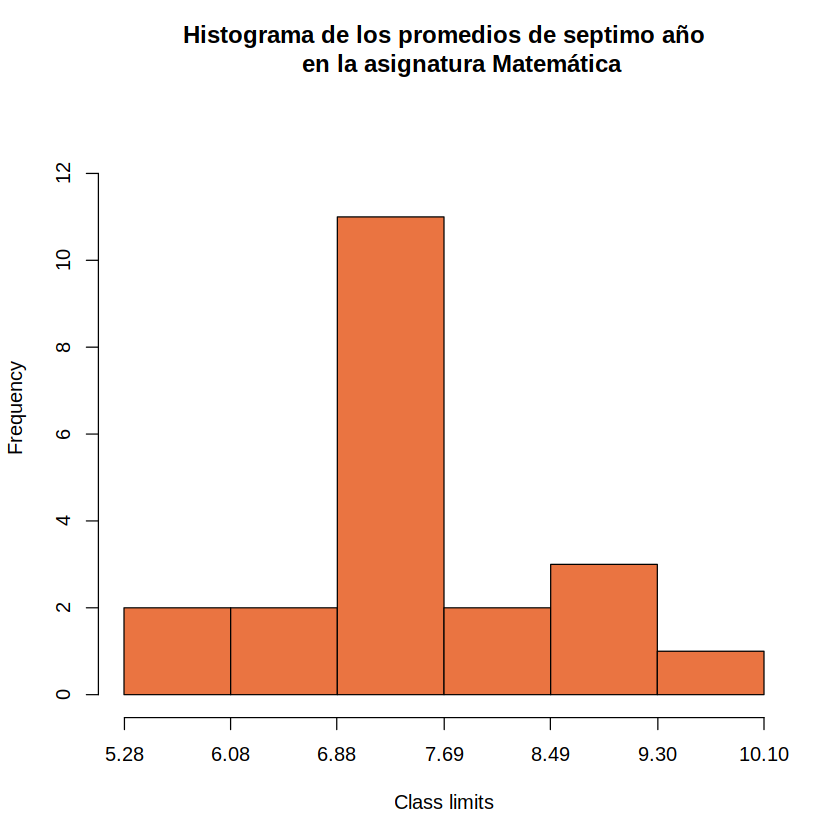

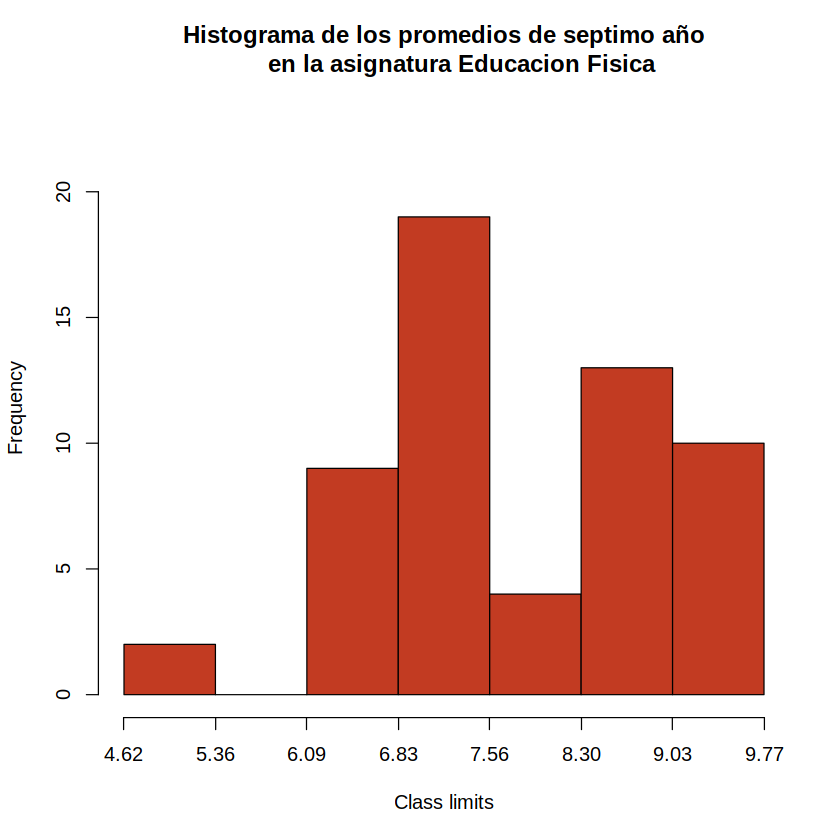

In [80]:
#Graficamos HISTOGRAMAS de los promedios de las materias de septimo año

#MATEMATICA
Notas_matematica <- SEPTIMO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de septimo año
     en la asignatura Matemática",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- SEPTIMO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de septimo año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

### Calculo matriz de correlacion y correlacion parcial

In [81]:
#install.packages("corrplot")  # Instalar el paquete corrplot si no está instalado
library(corrplot)  # Cargar el paquete corrplot

corrplot 0.92 loaded



In [82]:
#install.packages("ppcor")  # Instalar el paquete ppcor si no está instalado
library(ppcor)  # Cargar el paquete ppcor

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




#### Primero

In [83]:
# Unimos en un data frame las materias seleccionadas para calcular correlaciones
df <- suppressWarnings(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "MATEMATICA"),"Documento","Promedio") %>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "LENGUA Y LITERATURA"),"Documento","Promedio"),by="Documento")%>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "INGLES"),"Documento","Promedio"),by="Documento")%>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "EDUCACION FISICA"),"Documento","Promedio"),by="Documento")%>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "HISTORIA"),"Documento","Promedio"),by="Documento")%>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "GEOGRAFIA"),"Documento","Promedio"),by="Documento"))

In [84]:
#Renombramos las columnas
df <- rename(df,Prom_Mat=Promedio.x, Prom_Leng=Promedio.y, Prom_Ing=Promedio.x.x,
         	Prom_ef=Promedio.y.y,Prom_Hist=Promedio.x.x.x, Prom_Geo=Promedio.y.y.y)

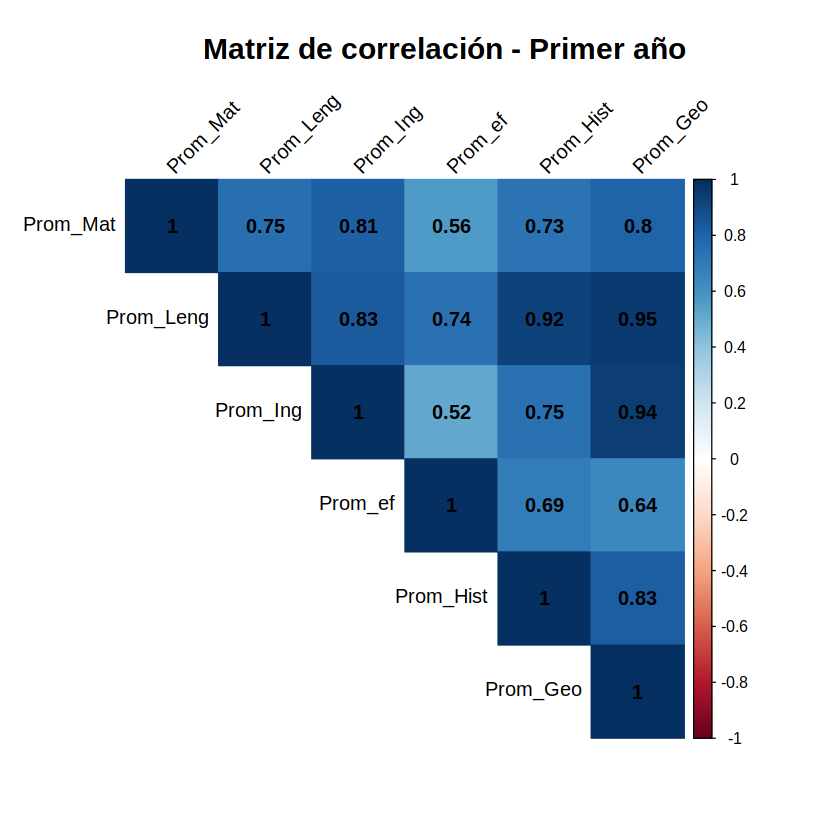

In [85]:
# Gráfico de la matriz de correlación
matriz_correlacion <- cor(df[, -1], method="spearman")
corrplot(matriz_correlacion, method = "color", type = "upper", 
         addCoef.col = "black", tl.col = "black", tl.srt = 45)
title("Matriz de correlación - Primer año", cex.main = 1.5)

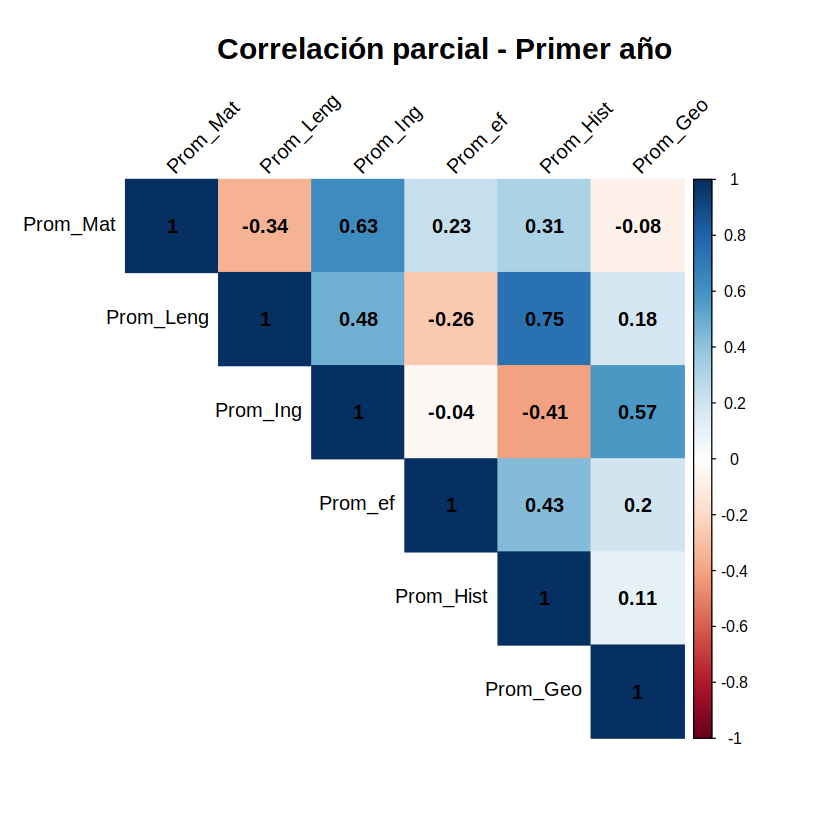

In [86]:
# Gráfico de correlación parcial
correlacion_parcial <- pcor(df[, -1], method = "pearson")$estimate
corrplot(correlacion_parcial, method = "color", type = "upper", 
         addCoef.col = "black", tl.col = "black", tl.srt = 45)
title("Correlación parcial - Primer año", cex.main = 1.5)

-----------------------

# Guia 6 - Comparacion de medias (1)

In [87]:
#Aunque lo tenemos arriba, lo leemos nuevamente 
secundaria_VICTORIA <- read_excel("VICTORIA_SECUNDARIA_LIMPIA.xlsx")

Actividad 1.1

¿Podría afirmar que la media de su departamento en las notas Matemática de primer año estuvo por encima de 7?


	Shapiro-Wilk normality test

data:  datos_mat
W = 0.98104, p-value = 2.666e-07


Warning message in ks.test.default(datos_mat, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  datos_mat
D = 0.99707, p-value < 2.2e-16
alternative hypothesis: two-sided



	Wilcoxon signed rank test with continuity correction

data:  datos_mat
V = 53442, p-value = 1
alternative hypothesis: true location is greater than 7



	Wilcoxon signed rank test with continuity correction

data:  datos_mat
V = 53442, p-value < 2.2e-16
alternative hypothesis: true location is less than 7


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.670   5.330   6.330   6.445   7.670  10.000 

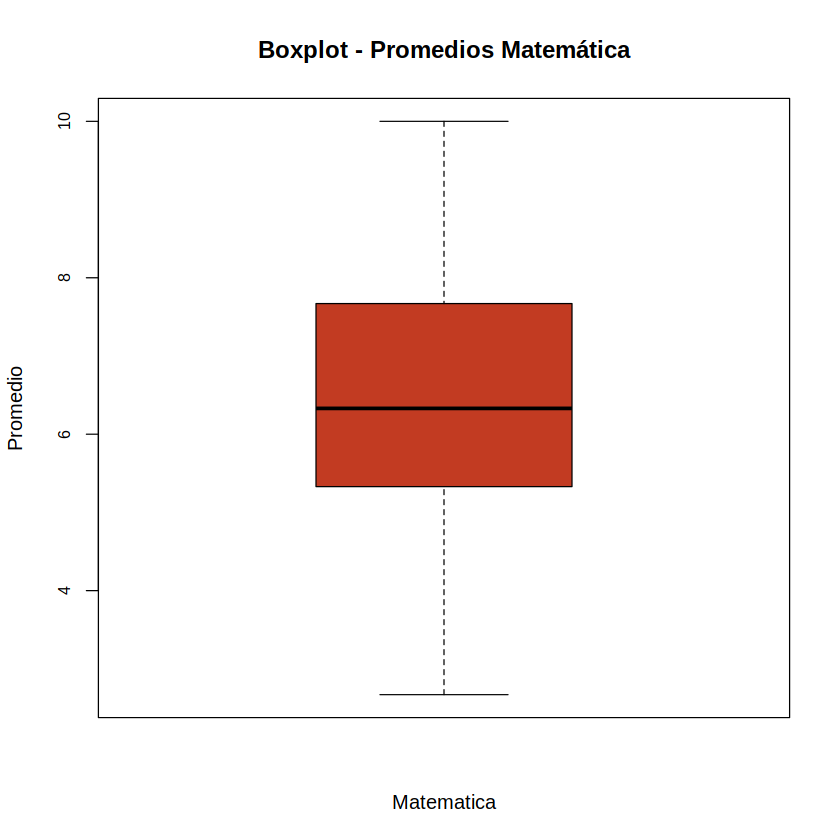

In [88]:
datos_mat <- filter(secundaria_VICTORIA, Año_Curso== "PRIMERO" & asignatura == "MATEMATICA")$Promedio

# Chequeamos supuesto de normalidad, antes de realizar pruebas PARAMETRICAS
shapiro.test(datos_mat) #p-value = 2.666e-07 --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 
ks.test(datos_mat, "pnorm") #Kolmogorov-Smirnov test seria lo ideal por el tamaño, pero no maneja bien valores repetidos (igualmente obtenemos mismo resultado)

#No podemos usar un test parametrico (ya que no cumple supuesto de normalidad) para comparar las medias del promedio conseguido por los 
#alumnos de primer año en la asignatura de MATEMATICA. En su lugar, utilizaremos un test no parametrico como lo es el test de Wilcox pero 
#en vez de comparar las medias, compararemos las MEDIANAS.

#Compara la mediana de la variable Promedio del dataset datos_mat con un valor constante, que en este caso es 7.
wilcox.test(datos_mat, mu=7, alternative = "greater", conf.level = 0.95)
# H0 -> la mediana de los alumnos de primer grado en matematica es 7
# H1 -> la mediana de los alumnos de primer grado en matematica es mayor a 7
# P-value = 1 --> No rechazo H0 -->No hay evidencia muestral suficiente p/concluir que la mediana de los estudiantes es mayor a 7

#Puedo volver a ejecutar, pero esta vez viendo si es menor a 7
wilcox.test(datos_mat, mu=7, alternative = "less", conf.level = 0.95)
# H0 -> la mediana de los alumnos de primer grado en matematica es 7
# H1 -> la mediana de los alumnos de primer grado en matematica es menor a 7
# p-value < 2.2e-16 < (0.05) --> Rechazo H0 --> Hay evidencia muestral suf. p/afirmar que la mediana es menor a 7

#Vemos efectivamente el valor de la mediana en el boxplot
boxplot(datos_mat,
        main = "Boxplot - Promedios Matemática",
        xlab = "Matematica",
        ylab = "Promedio",
        col = c("#C23B22"),
        border = "black",
        cex.axis = 0.8
)
#Vemos un resumen estadistico
summary(datos_mat)

## Comparamos promedios de asignatura matemática en colegios privados y públicos.

In [89]:
#¿Hay diferencias significativas entre el rendimiento en matematica de colegios PRIVADOS y colegios PÚBLICOS?
datos_mat_privado <- filter(secundaria_VICTORIA, EsPrivada == "S" & asignatura == "MATEMATICA")$Promedio
datos_mat_publico <- filter(secundaria_VICTORIA, EsPrivada == "N" & asignatura == "MATEMATICA")$Promedio

# Vemos sus normalidades
shapiro.test(datos_mat_privado) #p-value = 9.983e-05 < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 
shapiro.test(datos_mat_publico) #p-value < 2.2e-16  < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

#Como no cumple supuesto de normalidad, usamos test no parametrico

# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(datos_mat_privado,datos_mat_publico, alternative = "greater", conf.level = 0.95)

#p-value = 6.096e-09 < α --> Rechazo H0 --> 
#Hay evidencia muestral suficiente para sugerir que el rendimiento en matemáticas es realmente mejor en los colegios privados que en los públicos



	Shapiro-Wilk normality test

data:  datos_mat_privado
W = 0.98287, p-value = 9.983e-05



	Shapiro-Wilk normality test

data:  datos_mat_publico
W = 0.98654, p-value < 2.2e-16



	Wilcoxon rank sum test with continuity correction

data:  datos_mat_privado and datos_mat_publico
W = 862266, p-value = 6.096e-09
alternative hypothesis: true location shift is greater than 0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.000   7.000   6.717   7.670  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    5.00    6.00    6.16    7.67   10.00 

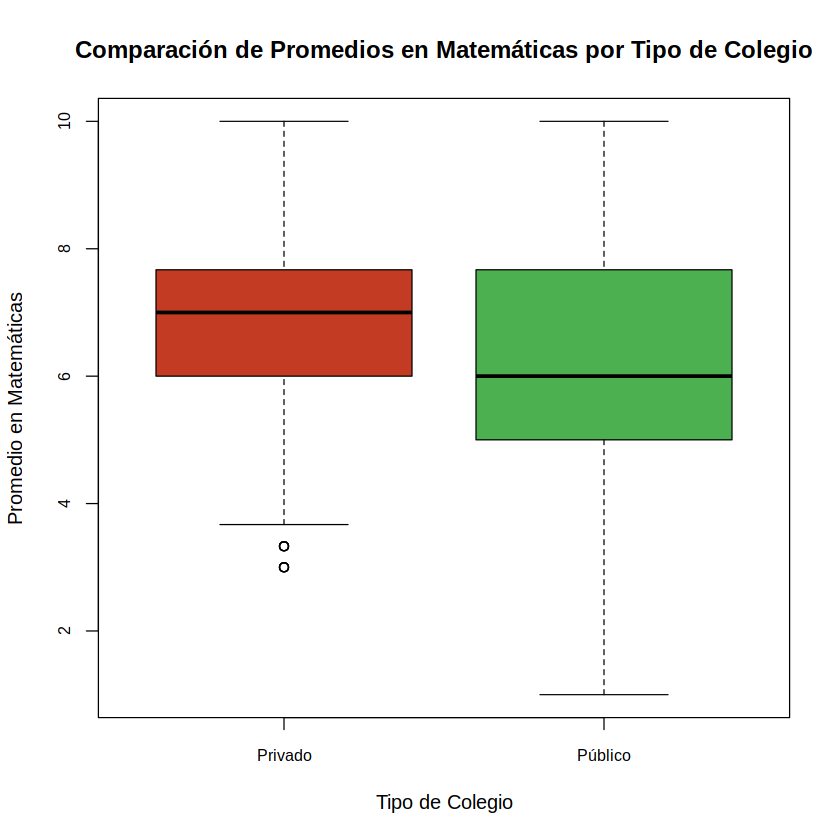

In [90]:
# Creamos el boxplot comparativo
boxplot(datos_mat_privado, datos_mat_publico,
        names = c("Privado", "Público"),
        main = "Comparación de Promedios en Matemáticas por Tipo de Colegio",
        xlab = "Tipo de Colegio",
        ylab = "Promedio en Matemáticas",
        col = c("#C23B22", "#4caf50"),
        border = "black",
        cex.axis = 0.8
)

#Vemos un resumen estadístico
summary(datos_mat_privado)
summary(datos_mat_publico)

## Comparamos promedios de asignatura matemática en colegios comunes y técnicos

In [91]:
#¿Hay diferencias significativas entre el rendimiento en matematica de colegios COMUNES y colegios TÉCNICOS?
datos_mat_comun <- filter(secundaria_VICTORIA, ModEnseñanza == "Comun" & asignatura == "MATEMATICA")$Promedio
datos_mat_tecnico <- filter(secundaria_VICTORIA, ModEnseñanza == "Tecnica" & asignatura == "MATEMATICA")$Promedio
length(datos_mat_tecnico)
# Vemos sus normalidades
shapiro.test(datos_mat_comun) #p-value < 2.2e-16 < α(0.05) --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 
shapiro.test(datos_mat_tecnico) #p-value = 7.356e-05 < α(0.05) --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

#Como no cumple supuesto de normalidad, usamos test no parametrico
wilcox.test(datos_mat_tecnico, datos_mat_comun,alternative = "two.sided", conf.level = 0.95)
# H0 -> La mediana de la distribución de los valores en el primer grupo es igual a la mediana de la distribución en el segundo grupo.
# H1 -> La mediana de la distribución de los valores en uno de los grupos es diferente de la mediana de la distribución en el otro grupo.

#p-value = 0.3615 > (0.05) --> No rechazo H0 --> No hay evidencia muestral suf. p/rechazar la hipotesis nula --> NO SE ENCONTRO DIFERENCIA EN LOS RENDIMIENTOS

[1] 453


	Shapiro-Wilk normality test

data:  datos_mat_comun
W = 0.98557, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  datos_mat_tecnico
W = 0.98413, p-value = 7.356e-05



	Wilcoxon rank sum test with continuity correction

data:  datos_mat_tecnico and datos_mat_comun
W = 755798, p-value = 0.3615
alternative hypothesis: true location shift is not equal to 0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   6.330   6.209   7.670  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.670   6.000   6.155   7.330  10.000 

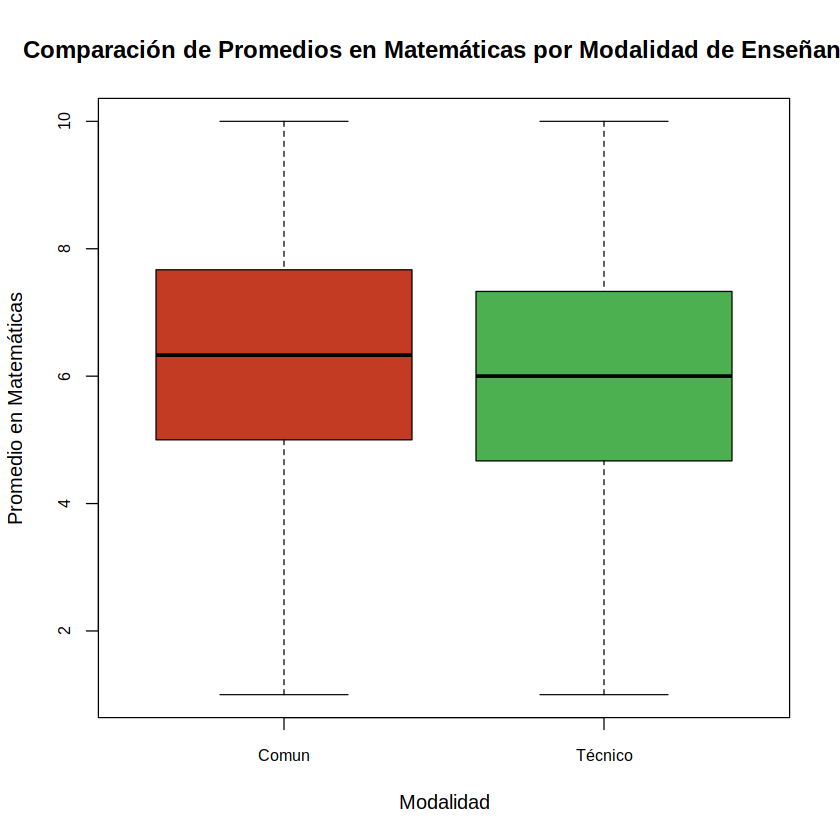

In [92]:
# Creamos el boxplot comparativo
boxplot(datos_mat_comun, datos_mat_tecnico,
        names = c("Comun", "Técnico"),
        main = "Comparación de Promedios en Matemáticas por Modalidad de Enseñanza",
        xlab = "Modalidad",
        ylab = "Promedio en Matemáticas",
        col = c("#C23B22", "#4caf50"),
        border = "black",
        cex.axis = 0.8
)
#Vemos un resumen estadístico
summary(datos_mat_comun)
summary(datos_mat_tecnico)

## Comparamos rendimiento matemática contra Eduacion Fisica

In [93]:
#¿Hay diferencias significativas entre el rendimiento en matematica y el rendimiento en Educación Física?
datos_matematica <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA")$Promedio
datos_ed_fisica <- filter(secundaria_VICTORIA, asignatura == "EDUCACION FISICA")$Promedio

# Vemos sus normalidades
#shapiro.test(datos_matematica) #p-value < 2.2e-16 < α(0.05) --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 
#shapiro.test(datos_ed_fisica) #p-value = 2.2e-16 < α(0.05) --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

ks.test(datos_matematica, "pnorm") 
ks.test(datos_ed_fisica, "pnorm") 

#Comparamos con un test no parametrico (Primero vemos si datos_matematica < datos_ed_fisica)
wilcox.test(datos_matematica, datos_ed_fisica,alternative = "less", conf.level = 0.95)
# H0 -> la mediana de las notas en matematica es mayor que la mediana de las notas en educacion fisica
# H1 -> la mediana de las notas en matematica es menor que la mediana de las notas en educacion fisica
#p-value < 2.2e-16 < (0.05) --> Rechazo H0 --> Hay evidencia muestras suf. p/concluir que el rendimiento en matematica es menor que el rendimiento en educacion fisica

Warning message in ks.test.default(datos_matematica, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  datos_matematica
D = 0.97029, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(datos_ed_fisica, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  datos_ed_fisica
D = 0.9919, p-value < 2.2e-16
alternative hypothesis: two-sided



	Wilcoxon rank sum test with continuity correction

data:  datos_matematica and datos_ed_fisica
W = 3628286, p-value < 2.2e-16
alternative hypothesis: true location shift is less than 0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   6.330   6.216   7.670  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.000   7.000   8.000   7.879   9.000  10.000       1 

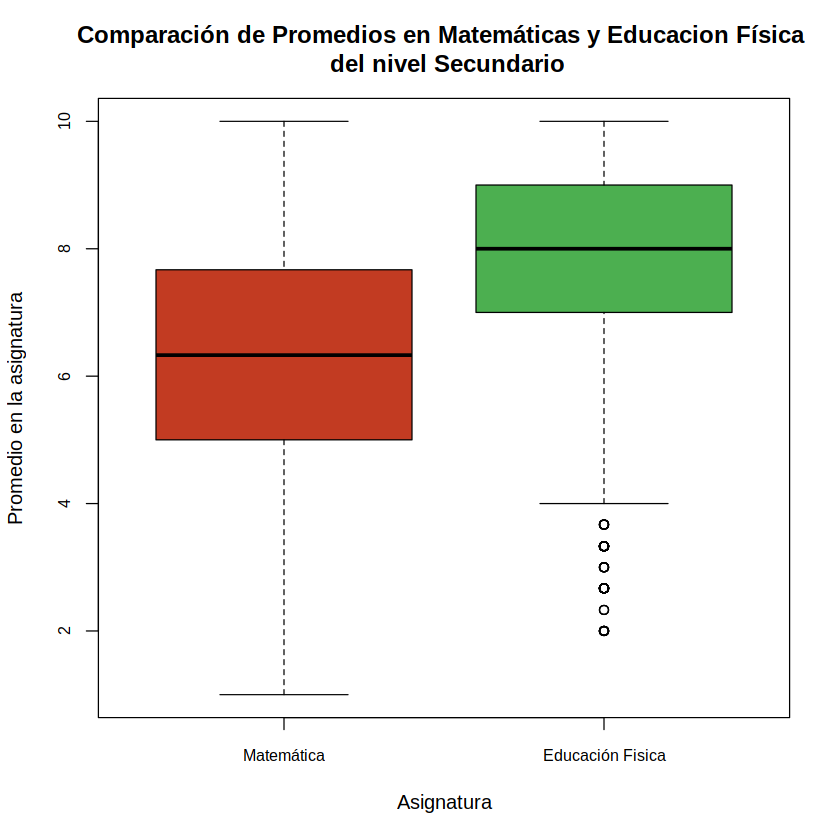

In [94]:
# Creamos el boxplot comparativo
boxplot(datos_matematica, datos_ed_fisica,
        names = c("Matemática", "Educación Fisica"),
        main = "Comparación de Promedios en Matemáticas y Educacion Física \n del nivel Secundario",
        xlab = "Asignatura",
        ylab = "Promedio en la asignatura",
        col = c("#C23B22", "#4caf50"),
        border = "black",
        cex.axis = 0.8
)
#Vemos un resumen estadístico
summary(datos_matematica)
summary(datos_ed_fisica)

## Comparamos si la matricula del ciclo básico difiere significativamente del ciclo orientado

In [95]:
# Filtrar datos para ciclo básico y ciclo orientado
datos_ciclo_basico <- filter(secundaria_VICTORIA, Año_Curso %in% c("PRIMERO", "SEGUNDO", "TERCERO"))
datos_ciclo_orientado <- filter(secundaria_VICTORIA, Año_Curso %in% c("CUARTO", "QUINTO", "SEXTO"))

# Contar la cantidad de matriculados únicos por ciclo
matriculados_basico <- n_distinct(datos_ciclo_basico$Documento)
matriculados_orientado <- n_distinct(datos_ciclo_orientado$Documento)

# Crear una tabla de contingencia
matricula_tabla <- matrix(c(matriculados_basico, matriculados_orientado), nrow = 2, byrow = TRUE)
rownames(matricula_tabla) <- c("Ciclo Básico", "Ciclo Orientado")
colnames(matricula_tabla) <- c("Matriculados")

print(matricula_tabla)

                Matriculados
Ciclo Básico            1755
Ciclo Orientado         1248


In [96]:
# Realizar la prueba de chi-cuadrado
chisq_test <- chisq.test(matricula_tabla)
print(chisq_test)
#p-value < 2.2e-16 < (0.05) --> Rechazo Ho --> Hay dif significativa en la matrícula entre el ciclo básico y el ciclo orientado 


	Chi-squared test for given probabilities

data:  matricula_tabla
X-squared = 85.597, df = 1, p-value < 2.2e-16



Año_Curso,Count,Ciclo
<chr>,<int>,<chr>
PRIMERO,594,Ciclo Básico
SEGUNDO,631,Ciclo Básico
TERCERO,530,Ciclo Básico
CUARTO,481,Ciclo Orientado
QUINTO,396,Ciclo Orientado
SEXTO,371,Ciclo Orientado


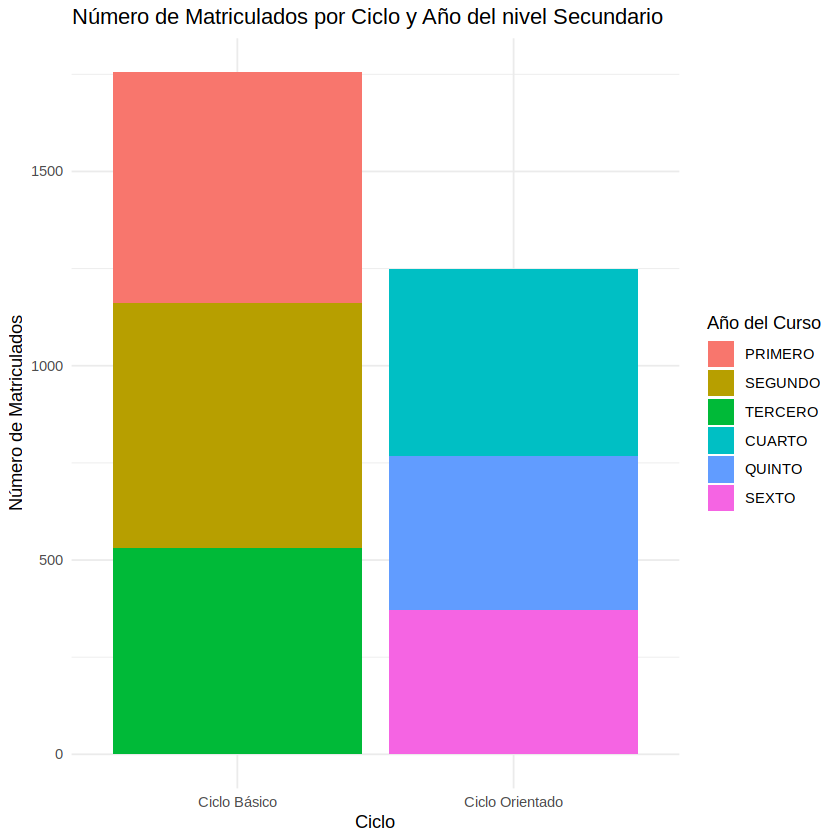

In [97]:
# Contar la cantidad de matriculados únicos por año en cada ciclo
matriculados_basico <- datos_ciclo_basico %>%
  group_by(Año_Curso) %>%
  summarise(Count = n_distinct(Documento))
matriculados_orientado <- datos_ciclo_orientado %>%
  group_by(Año_Curso) %>%
  summarise(Count = n_distinct(Documento))

# Añadir una columna para identificar el ciclo
matriculados_basico <- matriculados_basico %>%
  mutate(Ciclo = "Ciclo Básico")
matriculados_orientado <- matriculados_orientado %>%
  mutate(Ciclo = "Ciclo Orientado")

# Unir los datos
matriculados <- bind_rows(matriculados_basico, matriculados_orientado)
head(matriculados)

# Ordenar los niveles del factor Año_Curso
matriculados$Año_Curso <- factor(matriculados$Año_Curso, levels = c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO"))

# Graficar los datos en un gráfico de barras apiladas
ggplot(matriculados, aes(x = Ciclo, y = Count, fill = Año_Curso)) +
  geom_bar(stat = "identity") +
  labs(title = "Número de Matriculados por Ciclo y Año del nivel Secundario",
       x = "Ciclo",
       y = "Número de Matriculados",
       fill = "Año del Curso") +
  theme_minimal()

-----------------------------

# Guia 7 - Comparacion de medias (2)

## ¿Existen diferencia significativa en los promedios de los distintos ciclos (en matematica)?

***Analisis Exploratorio***

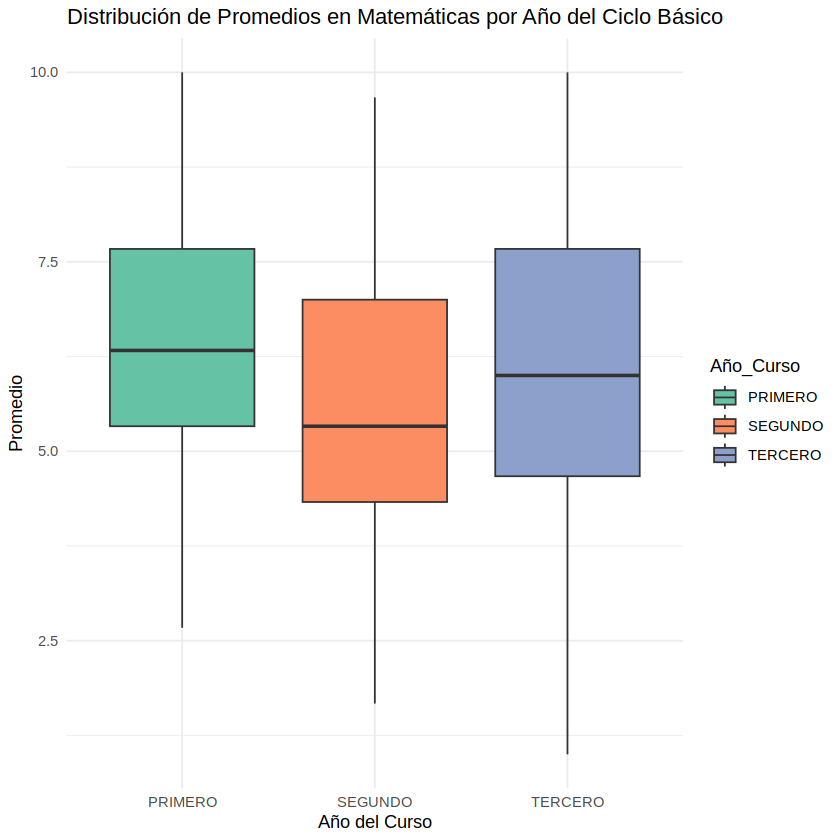

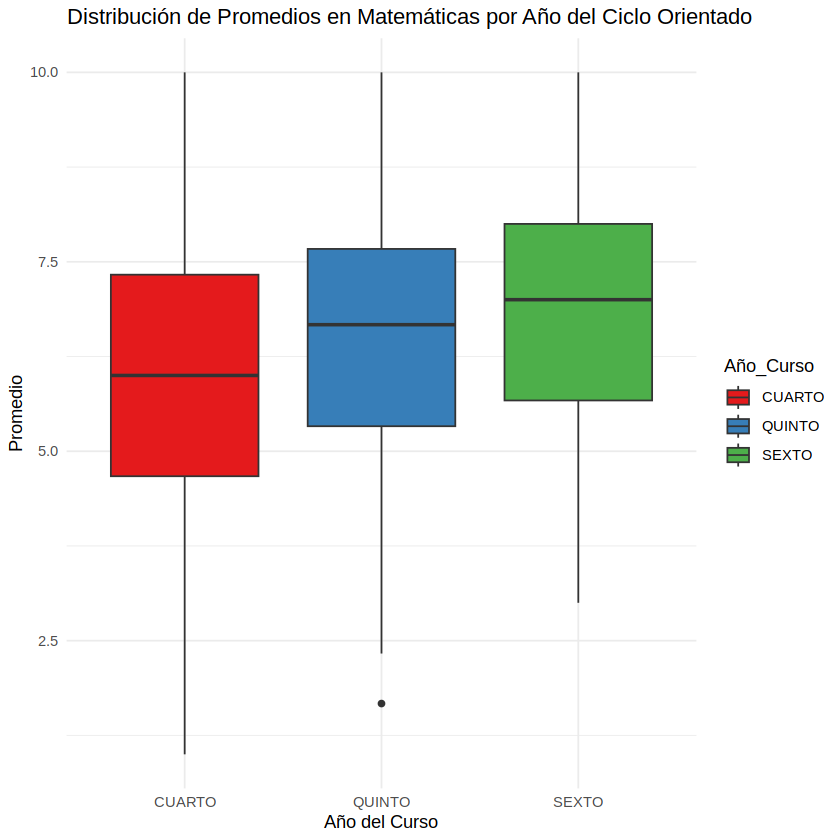

In [98]:
#Primero hacemos un analisis exploratorio de los datos

#Tomamos las notas correspondientes a la asignatura MATEMATICA
datos_CB_mat <- filter(datos_ciclo_basico, asignatura == "MATEMATICA")
datos_CO_mat <- filter(datos_ciclo_orientado, asignatura == "MATEMATICA")

# Creamos los boxplots
ggplot(datos_CB_mat, aes(x = Año_Curso, y = Promedio, fill = Año_Curso)) +
  geom_boxplot() +
  labs(title = "Distribución de Promedios en Matemáticas por Año del Ciclo Básico",
       x = "Año del Curso",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

ggplot(datos_CO_mat, aes(x = Año_Curso, y = Promedio, fill = Año_Curso)) +
  geom_boxplot() +
  labs(title = "Distribución de Promedios en Matemáticas por Año del Ciclo Orientado",
       x = "Año del Curso",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")

In [99]:
#Preparamos los datos para su posteriro analisis
# Segmentamos los datos de los grados del Ciclo Basico 
primero <- na.omit(filter(datos_CB_mat, Año_Curso == "PRIMERO")$Promedio)
segundo <- na.omit(filter(datos_CB_mat, Año_Curso == "SEGUNDO")$Promedio)
tercero <- na.omit(filter(datos_CB_mat, Año_Curso == "TERCERO")$Promedio)
# Mostrar los tamaños de las muestras
cat("Tamaño de las muestras:", "\n",
    "PRIMERO:", length(primero), "\n",
    "SEGUNDO:", length(segundo), "\n",
    "TERCERO:", length(tercero), "\n")

# Segmentamos los datos de los grados del Ciclo Orientado
cuarto <- na.omit(filter(datos_CO_mat, Año_Curso == "CUARTO")$Promedio)
quinto <- na.omit(filter(datos_CO_mat, Año_Curso == "QUINTO")$Promedio)
sexto <- na.omit(filter(datos_CO_mat, Año_Curso == "SEXTO")$Promedio)
septimo <- na.omit(filter(datos_CO_mat, Año_Curso == 'SEPTIMO')$Promedio)
# Mostrar los tamaños de las muestras
cat("Tamaño de las muestras:", "\n",
    "CUARTO:", length(cuarto), "\n",
    "QUINTO:", length(quinto), "\n",
    "SEXTO:", length(sexto), "\n",
    "SEPTIMO:", length(septimo))

Tamaño de las muestras: 
 PRIMERO: 632 
 SEGUNDO: 910 
 TERCERO: 673 
Tamaño de las muestras: 
 CUARTO: 611 
 QUINTO: 548 
 SEXTO: 643 
 SEPTIMO: 0

In [100]:
length(primero)

[1] 632

***Chequeamos normalidad***

In [101]:
#Salvando SEPTIMO, en el resto de las muestras debemos chequear normalidad con Kolmogorov-Smirnov ya que superamos los 5000 datos
#Realizar la prueba de Kolmogorov-Smirnov
#Ciclo Basico
ks.test(primero, "pnorm", mean = mean(primero), sd = sd(primero))
ks.test(segundo, "pnorm", mean = mean(segundo), sd = sd(segundo))
ks.test(tercero, "pnorm", mean = mean(tercero), sd = sd(tercero))

#Ciclo Especializado
ks.test(cuarto, "pnorm", mean = mean(cuarto), sd = sd(cuarto))
ks.test(quinto, "pnorm", mean = mean(quinto), sd = sd(quinto))
ks.test(sexto, "pnorm", mean = mean(sexto), sd = sd(sexto))
#Hipotesis del Test Kolmogorov-Smirnov
# H0 -> La distribucion de los datos  es normal.
# H1 -> La distribucion de los daots no es normal.
#p-value < 2.2e-16 < (0.05) --> Rechazo H0 --> Hay evidencia muestras suf. p/concluir que los datos no siguen una dist. normal

Warning message in ks.test.default(primero, "pnorm", mean = mean(primero), sd = sd(primero)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  primero
D = 0.090782, p-value = 5.983e-05
alternative hypothesis: two-sided


Warning message in ks.test.default(segundo, "pnorm", mean = mean(segundo), sd = sd(segundo)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  segundo
D = 0.055394, p-value = 0.00751
alternative hypothesis: two-sided


Warning message in ks.test.default(tercero, "pnorm", mean = mean(tercero), sd = sd(tercero)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  tercero
D = 0.072848, p-value = 0.001581
alternative hypothesis: two-sided


Warning message in ks.test.default(cuarto, "pnorm", mean = mean(cuarto), sd = sd(cuarto)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  cuarto
D = 0.047895, p-value = 0.1212
alternative hypothesis: two-sided


Warning message in ks.test.default(quinto, "pnorm", mean = mean(quinto), sd = sd(quinto)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  quinto
D = 0.10997, p-value = 3.504e-06
alternative hypothesis: two-sided


Warning message in ks.test.default(sexto, "pnorm", mean = mean(sexto), sd = sd(sexto)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sexto
D = 0.088674, p-value = 8.119e-05
alternative hypothesis: two-sided


In [102]:
#Comparamos los datos del ciclo basico
# Crear un data frame con todos los datos
notas <- c(primero, segundo, tercero)
curso <- factor(c(rep("PRIMERO", length(primero)), 
                  rep("SEGUNDO", length(segundo)), 
                  rep("TERCERO", length(tercero))))

notas_CB <- data.frame(curso, notas)

# El test de ANOVA no se puede aplicar ya que los datos no siguen una distribución normal. Usamos otro test no parametrico
# Realizar la prueba de Kruskal-Wallis (Los 3 grupos son independientes)
kruskal_test <- kruskal.test(notas ~ curso, data = notas_CB)
#H0) ---> Las distribuciones de las notas de los cursos "PRIMERO", "SEGUNDO" y "TERCERO" son iguales.
#H1) ---> Al menos una de las distribuciones de las notas es diferente.
kruskal_test #p-value < 2.2e-16 <(0.05) y estadístico de prueba es mucho mayor que el valor crítico --> Rechazo H0 --> Al menos una de las dist de las notas es diferente
# Valor critico
qchisq(0.05, 3-1, lower.tail = F)

#Comparaciones POST-HOC
#Pairse wilcox
pairwise.wilcox.test(notas_CB$notas, notas_CB$curso,p.adjust.method = "bonferroni")


	Kruskal-Wallis rank sum test

data:  notas by curso
Kruskal-Wallis chi-squared = 101.99, df = 2, p-value < 2.2e-16


[1] 5.991465


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  notas_CB$notas and notas_CB$curso 

        PRIMERO SEGUNDO
SEGUNDO < 2e-16 -      
TERCERO 0.046   1.3e-11

P value adjustment method: bonferroni 

In [103]:
#Comparamos los datos del ciclo especializado
# Crear un data frame con todos los datos
notas <- c(cuarto, quinto, sexto)#, septimo)
curso <- factor(c(rep("CUARTO", length(cuarto)), 
                  rep("QUINTO", length(quinto)), 
                  rep("SEXTO", length(sexto))))
                  #rep("SEPTIMO", length(septimo))))

notas_CE <- data.frame(curso, notas)

# El test de ANOVA no se puede aplicar ya que los datos no siguen una distribución normal. Usamos otro test no parametrico
# Realizar la prueba de Kruskal-Wallis (Los 4 grupos son independientes)
kruskal_test <- kruskal.test(notas ~ curso, data = notas_CE)
#H0) ---> Las distribuciones de las notas de los cursos "CUARTO", "QUINTO", "SEXTO" y "SEPTIMO" son iguales.
#H1) ---> Al menos una de las distribuciones de las notas es diferente.
kruskal_test #p-value < 2.2e-16 <(0.05) y estadístico de prueba es mucho mayor que el valor crítico --> Rechazo H0 --> Al menos una de las dist de las notas es diferente
# Valor critico
qchisq(0.05, 3-1, lower.tail = F)

#Comparaciones POST-HOC
#Pairse wilcox
pairwise.wilcox.test(notas_CE$notas, notas_CE$curso,p.adjust.method = "bonferroni")


	Kruskal-Wallis rank sum test

data:  notas by curso
Kruskal-Wallis chi-squared = 86.967, df = 2, p-value < 2.2e-16


[1] 5.991465


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  notas_CE$notas and notas_CE$curso 

       CUARTO  QUINTO
QUINTO 2.8e-09 -     
SEXTO  < 2e-16 0.016 

P value adjustment method: bonferroni 

Como SEPTIMO es un año en particular, que registra una baja en los matriculados, teniendo solamente 50 alumnos, no lo tomamos para la comparacion. Esto puede deberse a que solamente los colegios técnicos y agrotécnicos tienen siete años. Además el 83% son colegios comunes y solamente el 17% se corresponde a colegios técnicos/agrotécnicos. 

## ¿Impacta el turno (MAÑANA, TARDE) en el rendimiento academico?

***Para responder a esta pregunta, comparamos el desempeño en matematica y lengua(unas de las asignaturas mas importantes) en cada uno de los turno, año por año***

***No tomamos en cuenta turno NOCHE ni ROTATIVO ya que no esta en nuestros planes estudiar los colegios de adultos***

Usamos un test para dos medias independientes:
- ANOVA en caso de tener datos normales.
- Si no cumple supuesto de normalidad --> Wilcoxon test

In [104]:
turno_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA")
turno_tarde <- filter(secundaria_VICTORIA, turno == "TARDE")
turno_noche <- filter(secundaria_VICTORIA, turno == "NOCHE")
turno_rotativo <- filter(secundaria_VICTORIA, turno == "ROTATIVO")

dim(turno_mañana)
dim(turno_tarde)
dim(turno_noche) #Escuela de adultos
dim(turno_rotativo) #Escuela de adultos

[1] 35158    23

[1] 15063    23

[1] 1439   23

[1] 26 23

### MATEMÁTICA

#### PRIMERO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00    5.33    6.33    6.59    7.67    9.67 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   6.152   7.330  10.000 

Tamaño de muestra - Mañana: 521 
Tamaño de muestra - Tarde: 79 


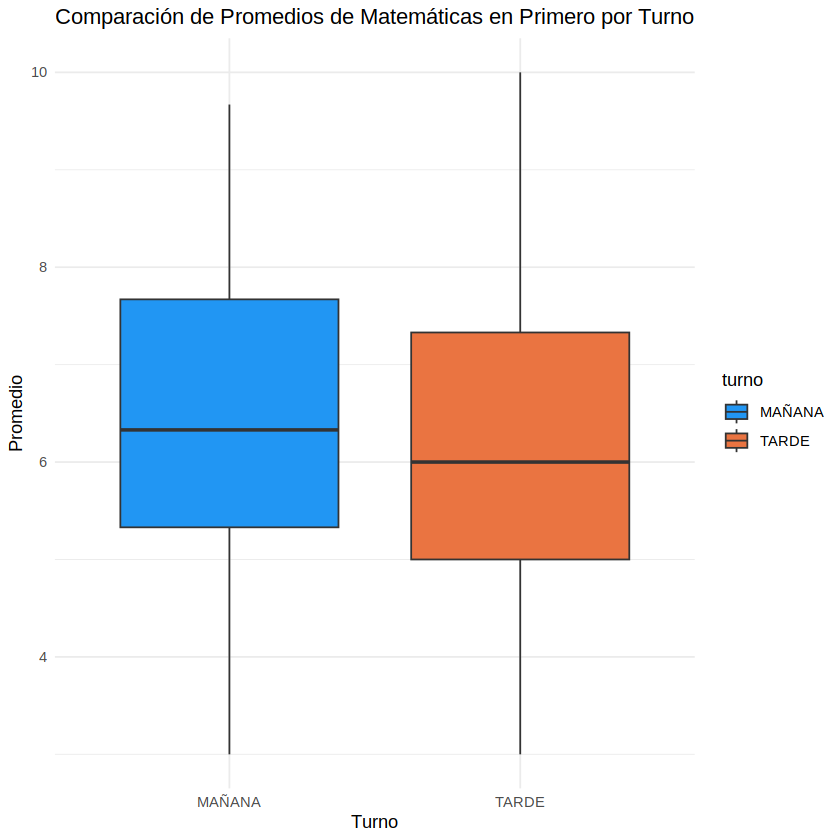

In [105]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "MATEMATICA" & Año_Curso == "PRIMERO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "MATEMATICA" & Año_Curso == "PRIMERO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de Matemáticas en Primero por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [106]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,6.6,521
TARDE,6.2,79


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.97635, p-value = 1.854e-07



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.96668, p-value = 0.03684


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 24426, p-value = 0.007221
alternative hypothesis: true location shift is not equal to 0


#### SEGUNDO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.670   4.330   6.000   5.647   7.000   9.670 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.330   4.330   4.330   4.919   5.330   9.330 

Tamaño de muestra - Mañana: 707 
Tamaño de muestra - Tarde: 168 


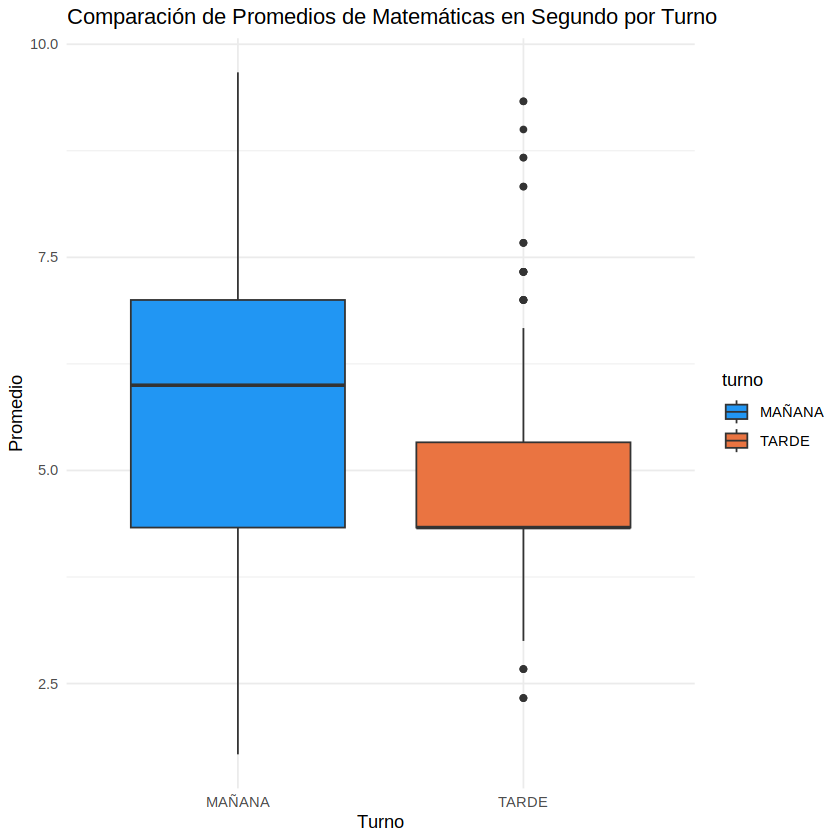

In [107]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "MATEMATICA" & Año_Curso == "SEGUNDO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "MATEMATICA" & Año_Curso == "SEGUNDO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de Matemáticas en Segundo por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [108]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,5.6,707
TARDE,4.9,168


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.9627, p-value = 1.978e-12



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.86089, p-value = 2.494e-11


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 75882, p-value = 2.002e-08
alternative hypothesis: true location shift is not equal to 0


#### TERCERO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.670   5.000   6.000   6.249   7.670  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.670   6.000   5.851   7.000   8.670 

Tamaño de muestra - Mañana: 519 
Tamaño de muestra - Tarde: 96 


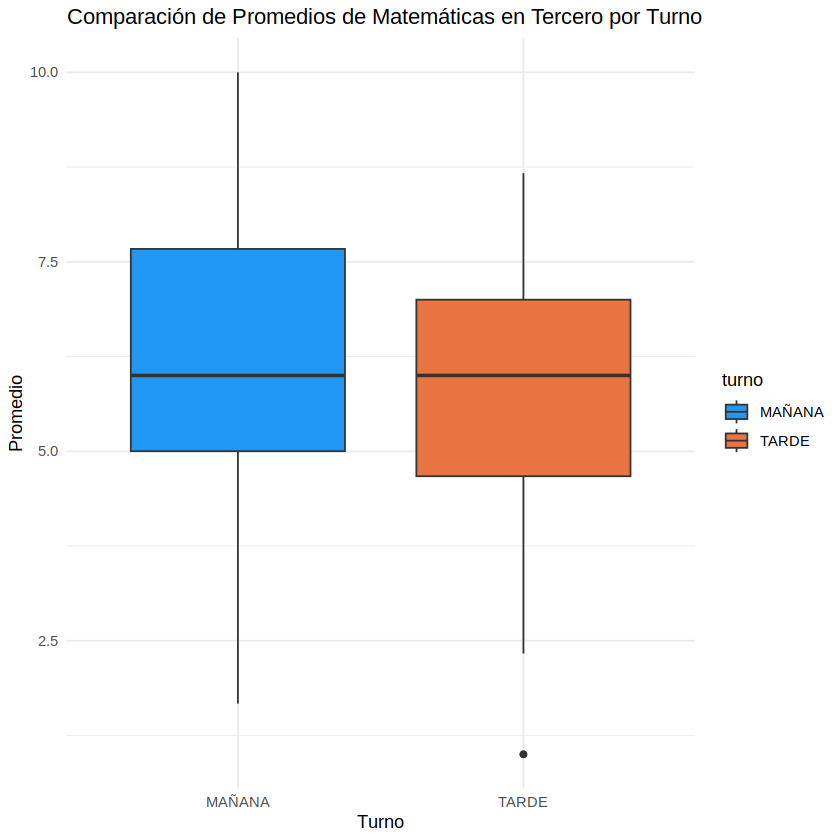

In [109]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "MATEMATICA" & Año_Curso == "TERCERO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "MATEMATICA" & Año_Curso == "TERCERO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de Matemáticas en Tercero por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [110]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,6.2,519
TARDE,5.9,96


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.97893, p-value = 8.088e-07



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.96737, p-value = 0.01708


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 27506, p-value = 0.1043
alternative hypothesis: true location shift is not equal to 0


#### CUARTO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.670   4.330   6.000   5.874   7.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.670   6.000   5.963   7.330  10.000 

Tamaño de muestra - Mañana: 289 
Tamaño de muestra - Tarde: 322 


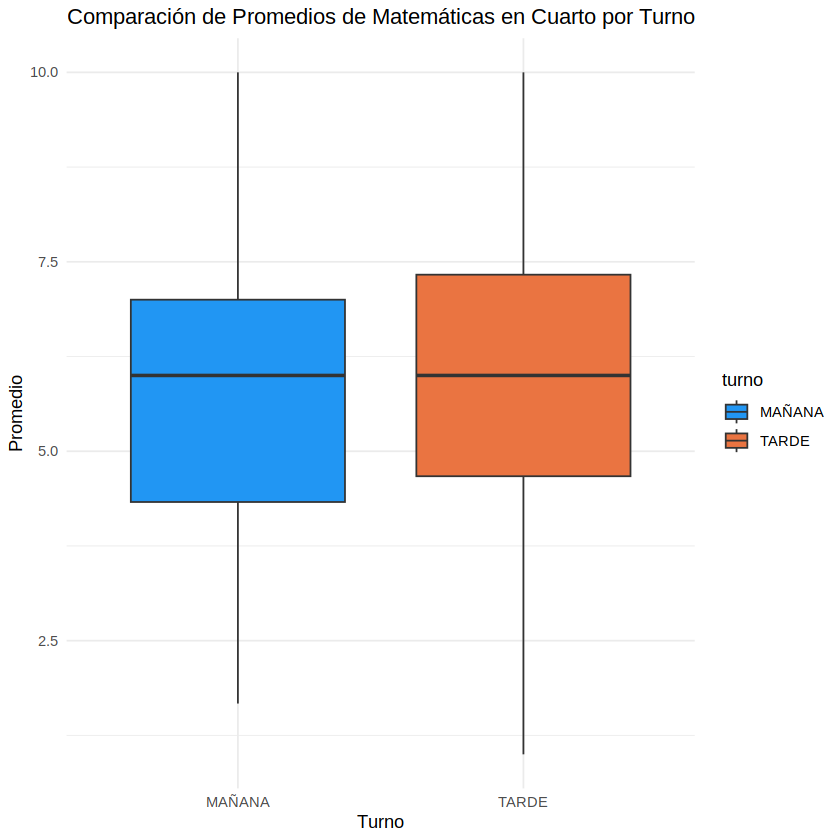

In [111]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "MATEMATICA" & Año_Curso == "CUARTO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "MATEMATICA" & Año_Curso == "CUARTO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de Matemáticas en Cuarto por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [112]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,5.9,289
TARDE,6.0,322


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.97632, p-value = 0.0001016



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.9865, p-value = 0.004193


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 45476, p-value = 0.6284
alternative hypothesis: true location shift is not equal to 0


#### QUINTO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.670   5.330   7.000   6.647   7.670  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.330   5.330   6.330   6.496   7.670  10.000 

Tamaño de muestra - Mañana: 333 
Tamaño de muestra - Tarde: 215 


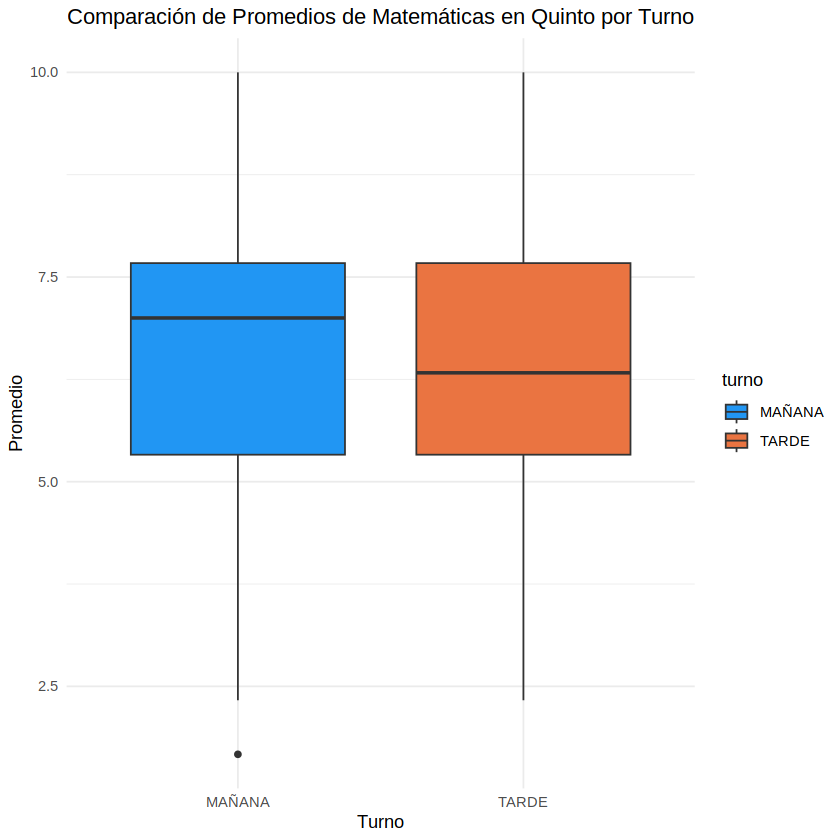

In [113]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "MATEMATICA" & Año_Curso == "QUINTO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "MATEMATICA" & Año_Curso == "QUINTO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de Matemáticas en Quinto por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [114]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,6.6,333
TARDE,6.5,215


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.95347, p-value = 8.996e-09



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.98198, p-value = 0.007556


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 38642, p-value = 0.1151
alternative hypothesis: true location shift is not equal to 0


#### SEXTO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.330   6.418   7.330  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.670   6.330   7.670   7.464   8.835  10.000 

Tamaño de muestra - Mañana: 312 
Tamaño de muestra - Tarde: 331 


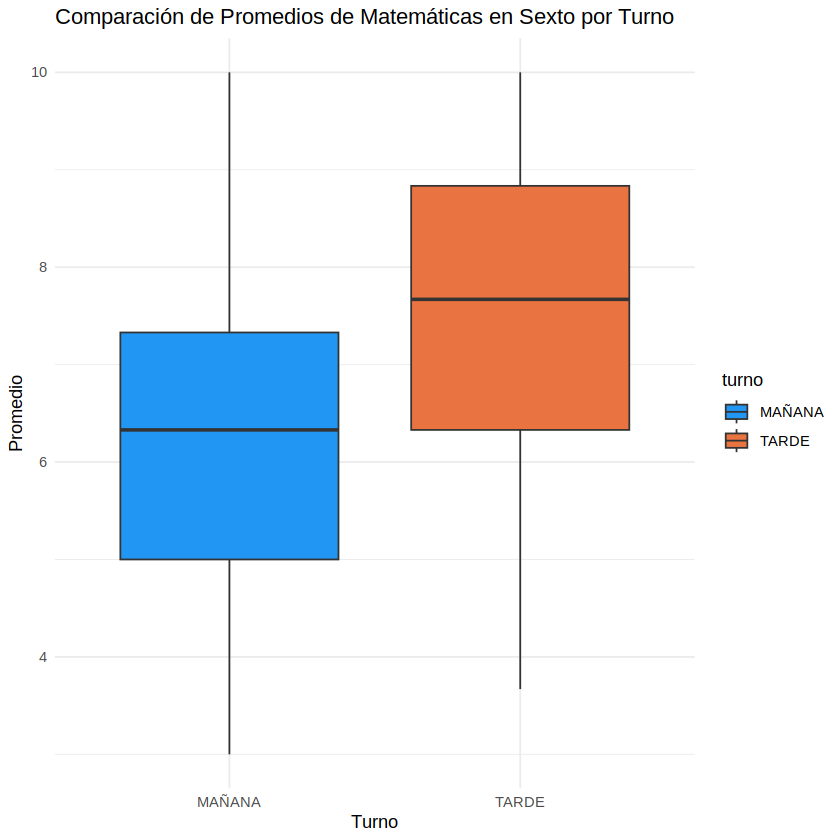

In [115]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "MATEMATICA" & Año_Curso == "SEXTO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "MATEMATICA" & Año_Curso == "SEXTO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de Matemáticas en Sexto por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [116]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,6.4,312
TARDE,7.5,331


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.95648, p-value = 5.214e-08



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.95029, p-value = 3.922e-09


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 32868, p-value = 1.299e-15
alternative hypothesis: true location shift is not equal to 0


#### SEPTIMO

***No se analizo porque solamente 1 colegio tiene matematica en turno mañana***

## LENGUA

#### PRIMERO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.330   6.000   7.000   6.891   8.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.670   5.330   6.330   6.443   7.585   9.670 

Tamaño de muestra - Mañana: 517 
Tamaño de muestra - Tarde: 70 


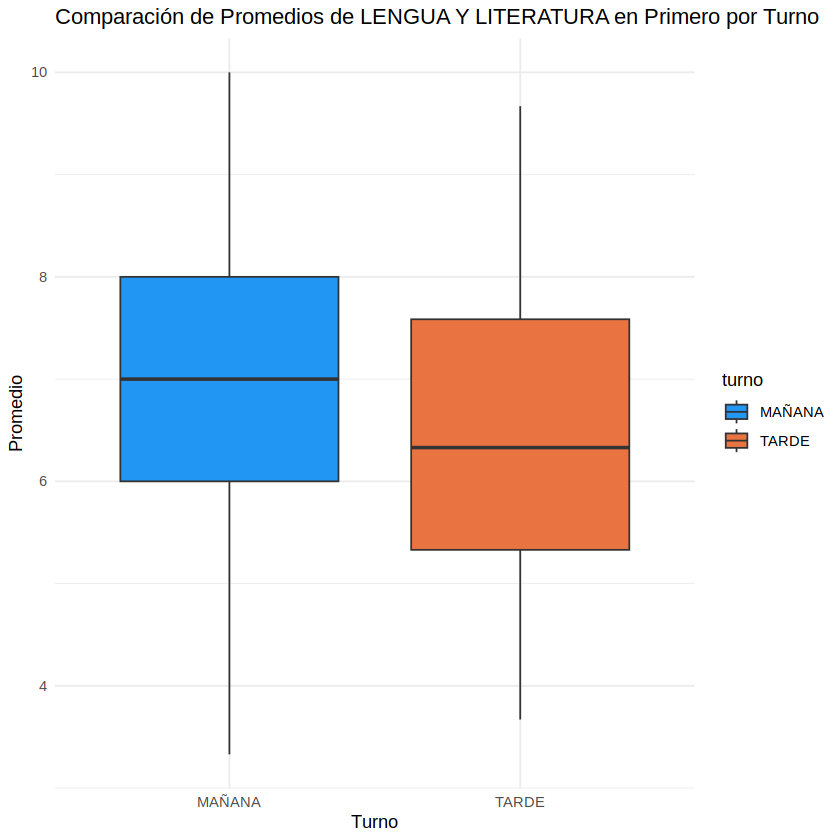

In [117]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "PRIMERO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "PRIMERO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de LENGUA Y LITERATURA en Primero por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [118]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,6.9,517
TARDE,6.4,70


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.97795, p-value = 4.862e-07



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.97613, p-value = 0.2013


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 21172, p-value = 0.02056
alternative hypothesis: true location shift is not equal to 0


#### SEGUNDO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.330   6.500   6.574   8.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.330   4.670   5.330   5.702   6.670   9.670 

Tamaño de muestra - Mañana: 682 
Tamaño de muestra - Tarde: 137 


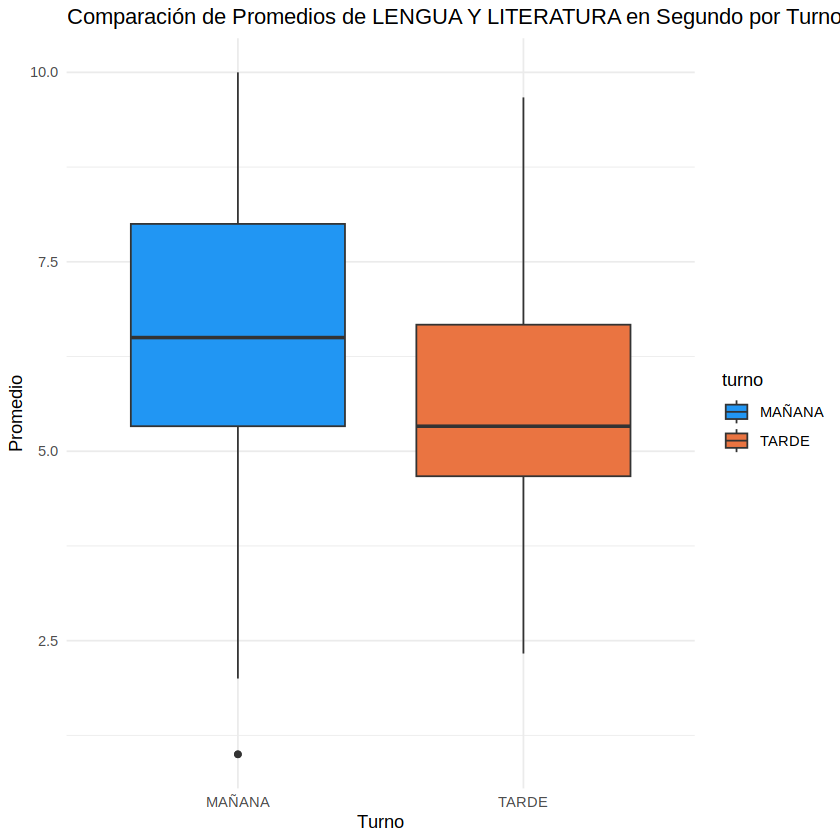

In [119]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "SEGUNDO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "SEGUNDO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de LENGUA Y LITERATURA en Segundo por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [120]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,6.6,682
TARDE,5.7,137


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.97748, p-value = 9.65e-09



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.93857, p-value = 1.01e-05


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 61190, p-value = 9.522e-09
alternative hypothesis: true location shift is not equal to 0


#### TERCERO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.670   5.330   6.670   6.584   8.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.000   6.330   6.684   8.000   9.670 

Tamaño de muestra - Mañana: 485 
Tamaño de muestra - Tarde: 95 


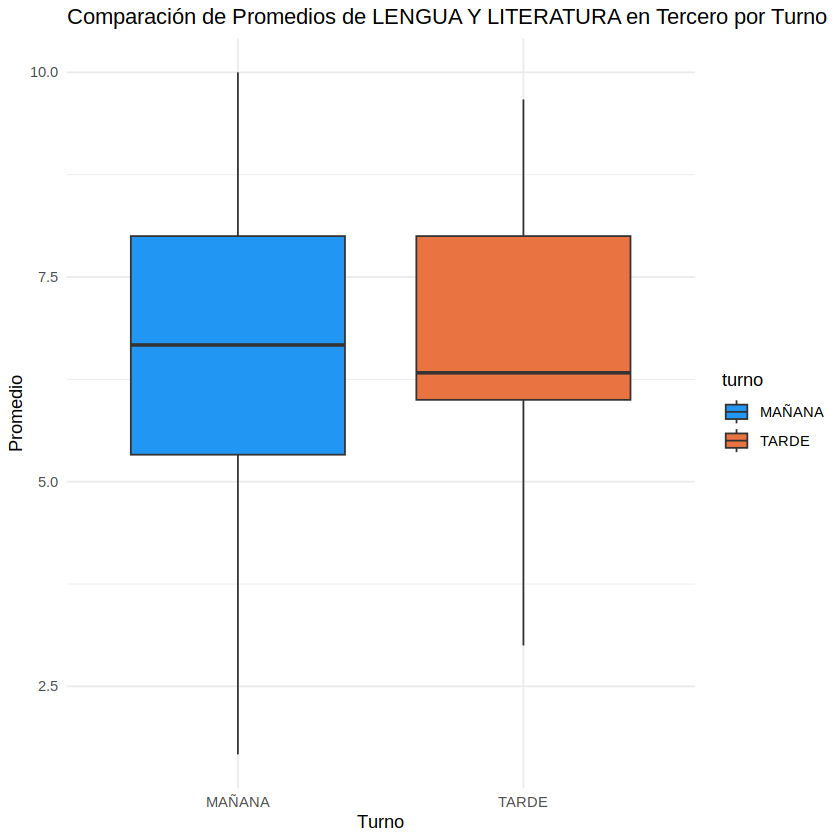

In [121]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "TERCERO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "TERCERO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de LENGUA Y LITERATURA en Tercero por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [122]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,6.6,485
TARDE,6.7,95


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.98277, p-value = 1.643e-05



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.97103, p-value = 0.03327


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 22256, p-value = 0.6004
alternative hypothesis: true location shift is not equal to 0


#### CUARTO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.330   6.670   6.658   8.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.670   6.000   7.000   7.006   8.330   9.670 

Tamaño de muestra - Mañana: 289 
Tamaño de muestra - Tarde: 288 


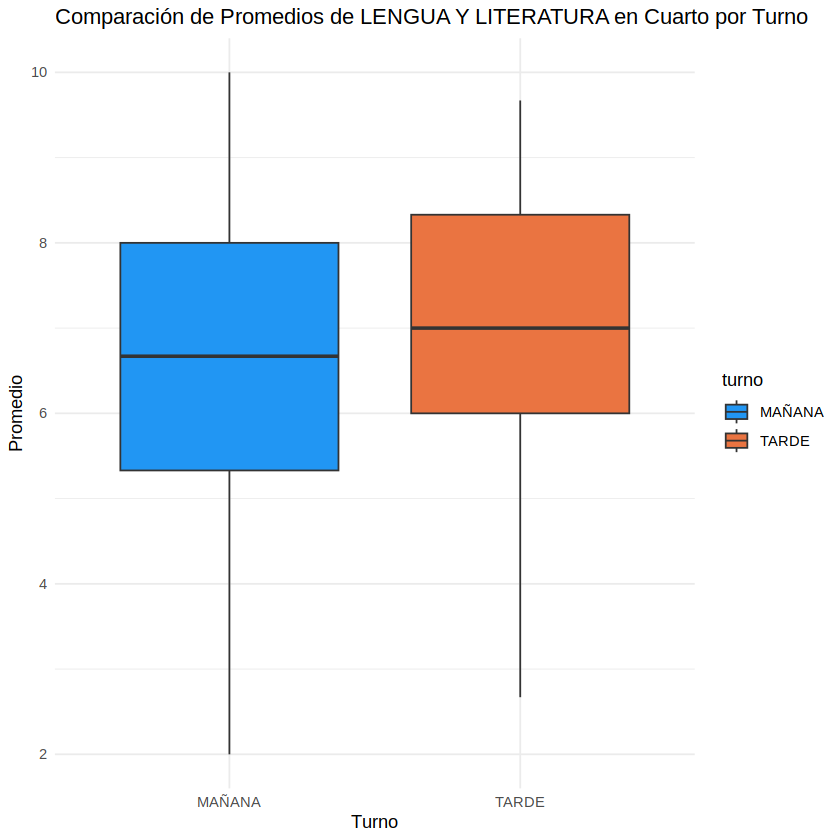

In [123]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "CUARTO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "CUARTO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de LENGUA Y LITERATURA en Cuarto por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [124]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,6.7,289
TARDE,7.0,288


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.98097, p-value = 0.0006818



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.97575, p-value = 8.415e-05


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 36220, p-value = 0.006902
alternative hypothesis: true location shift is not equal to 0


#### QUINTO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   7.670   7.638   8.670  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.000   7.670   7.446   9.000  10.000 

Tamaño de muestra - Mañana: 336 
Tamaño de muestra - Tarde: 210 


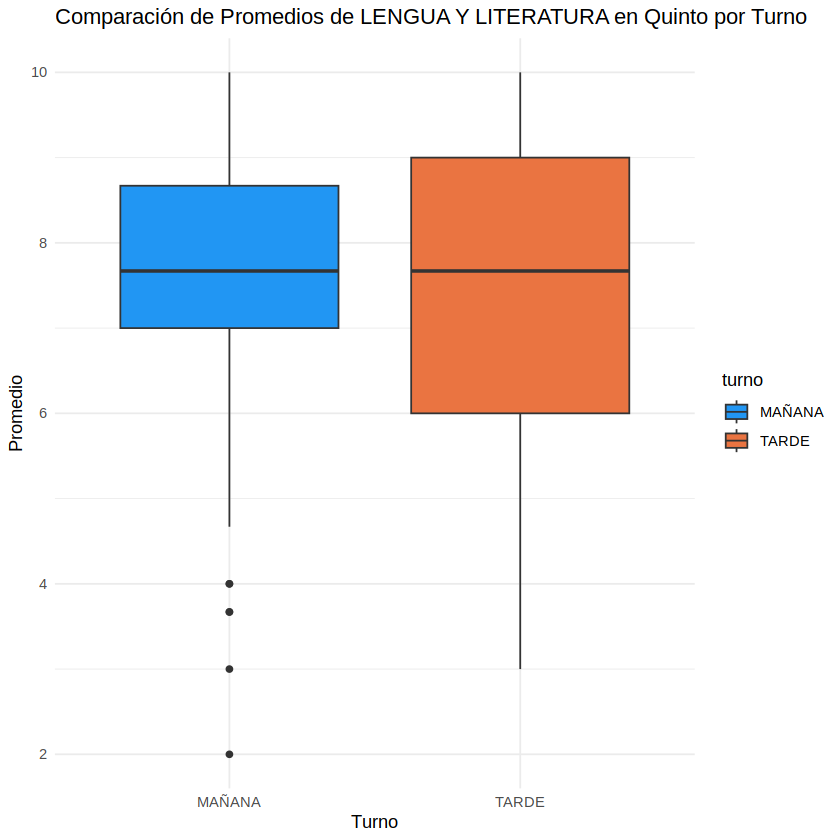

In [125]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "QUINTO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "QUINTO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de LENGUA Y LITERATURA en Quinto por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [126]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,7.6,336
TARDE,7.4,210


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.94187, p-value = 3.272e-10



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.93058, p-value = 2.013e-08


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 35896, p-value = 0.7305
alternative hypothesis: true location shift is not equal to 0


#### SEXTO

***Análisis Exploratorio***

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.670   6.330   8.000   7.539   9.000  10.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   6.330   8.000   7.616   8.330  10.000 

Tamaño de muestra - Mañana: 302 
Tamaño de muestra - Tarde: 302 


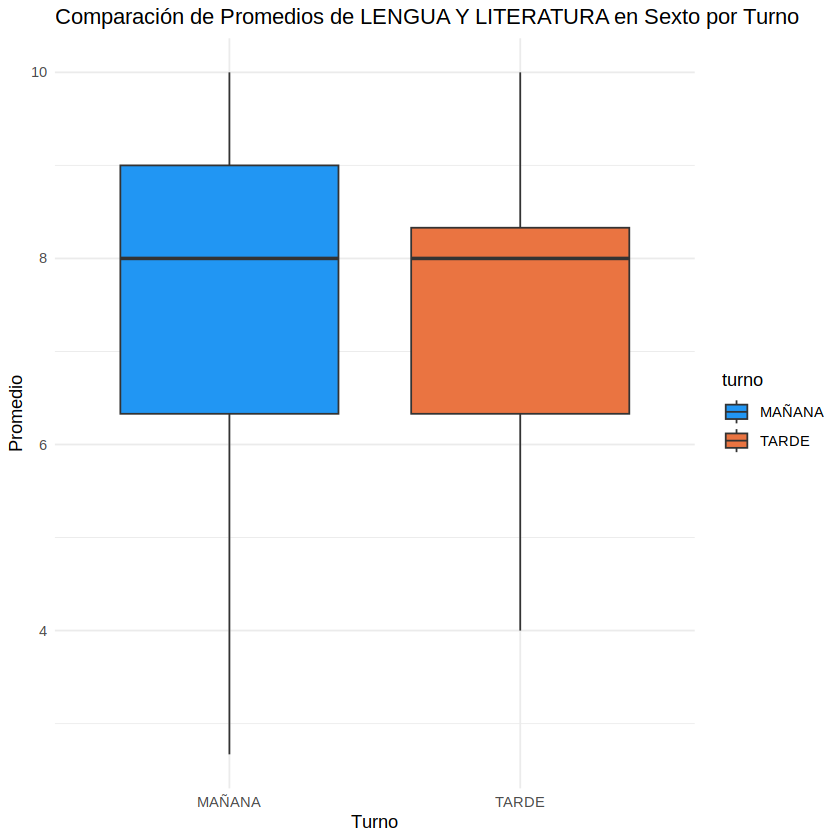

In [127]:
#Filtramos los datos que necesitamos 
datos_mañana <- filter(secundaria_VICTORIA, turno == "MAÑANA" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "SEXTO")
datos_tarde <- filter(secundaria_VICTORIA, turno == "TARDE" & asignatura == "LENGUA Y LITERATURA" & Año_Curso == "SEXTO")

#Vemos un resumen de los estadistios
summary(datos_mañana$Promedio)
summary(datos_tarde$Promedio)
# Tamaños de muestra
cat("Tamaño de muestra - Mañana:", nrow(datos_mañana), "\n")
cat("Tamaño de muestra - Tarde:", nrow(datos_tarde), "\n")

# Combinamos los datos para graficarlos
datos_comb <- bind_rows(
  datos_mañana %>% mutate(turno = "MAÑANA"),
  datos_tarde %>% mutate(turno = "TARDE"))

# Convertir la columna 'turno' a factor con niveles específicos
datos_comb$turno <- factor(datos_comb$turno, levels = c("MAÑANA", "TARDE"))

# Crear el boxplot comparativo con ggplot2
ggplot(datos_comb, aes(x = turno, y = Promedio, fill = turno)) +
  geom_boxplot() +
  labs(title = "Comparación de Promedios de LENGUA Y LITERATURA en Sexto por Turno",
       x = "Turno",
       y = "Promedio") +
  theme_minimal() +
  scale_fill_manual(values = c("#2196f3", "#ea7441", "#ff4081"))

***Test para comparar dos medias independientes***

In [128]:
# Pasamos los datos a tipo numerico
promedio = as.numeric(c(datos_mañana$Promedio, datos_tarde$Promedio))

# Para que se repita la cantidad de alumno en cada turno su nombre
turno <- as.factor(c(rep("MAÑANA", length(datos_mañana$Promedio)), rep("TARDE",length(datos_tarde$Promedio))))    

# Armamos el dataframe
datos_turnos <- data.frame(turno, promedio)

# Agrupamos los datos según el turno, calculamos la media de los promedios y contabilizamos las frecuencias
datos_turnos %>% group_by(turno) %>%
    summarise(Media = round(mean(promedio),1), datos = n())
print("Prueba NORMALIDAD -----------------------------------")
# Para usar un test parametrico, la distribución de los datos tiene que ser
#normal, por eso se calcularan los test de shapiro
#Como tenemos menos de 5000 observaciones en cada uno, optamos por shapiro:
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "MAÑANA"])
shapiro.test(datos_turnos$promedio[datos_turnos$turno == "TARDE"])
#p-value < α --> Rechazo H0 --> Hay evidencia muestral suficiente p/concluir que los datos no siguen una distribución normal. 

print("Prueba comparacion de medias -------------------------")
#Como no cumple supuesto de normalidad, usamos test no parametrico:
# H0 -> No hay diferencia significativa en el rendimiento en matemáticas entre colegios privados y públicos
# H1 -> El rendimiento de los alumnos en matematica es mejor en colegios privados que en colegios publicos
wilcox.test(promedio ~ turno, data = datos_turnos, conf.level = 0.95)
#En base al p-value --> CONCLUYO

turno,Media,datos
<fct>,<dbl>,<int>
MAÑANA,7.5,302
TARDE,7.6,302


[1] "Prueba NORMALIDAD -----------------------------------"



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "MAÑANA"]
W = 0.94085, p-value = 1.233e-09



	Shapiro-Wilk normality test

data:  datos_turnos$promedio[datos_turnos$turno == "TARDE"]
W = 0.93692, p-value = 4.845e-10


[1] "Prueba comparacion de medias -------------------------"



	Wilcoxon rank sum test with continuity correction

data:  promedio by turno
W = 45272, p-value = 0.8772
alternative hypothesis: true location shift is not equal to 0


#### SEPTIMO

***No se analizo porque solamente 1 colegio tiene lengua en turno mañana***

--------------------

## Comparacion del rendimiento en los 3 trimestres (año por año)

***Usamos el test de friedman (diferencia de 3 o mas medias), ya que estamos trabajando con muestras pareadas (estariamos comparando la misma muestra -promedio alumno- en distintos momentos)
En este caso, los tres trimestres del año académico se considerarían como grupos diferentes de mediciones repetidas en el mismo conjunto de alumnos.***
***Para medir el rendimiento, tomamos como referencia las notas obtenidas en la asignatura MATEMATICA, ya que es una asignatura muy importante***

### PRIMERO

***Análisis Exploratorio***

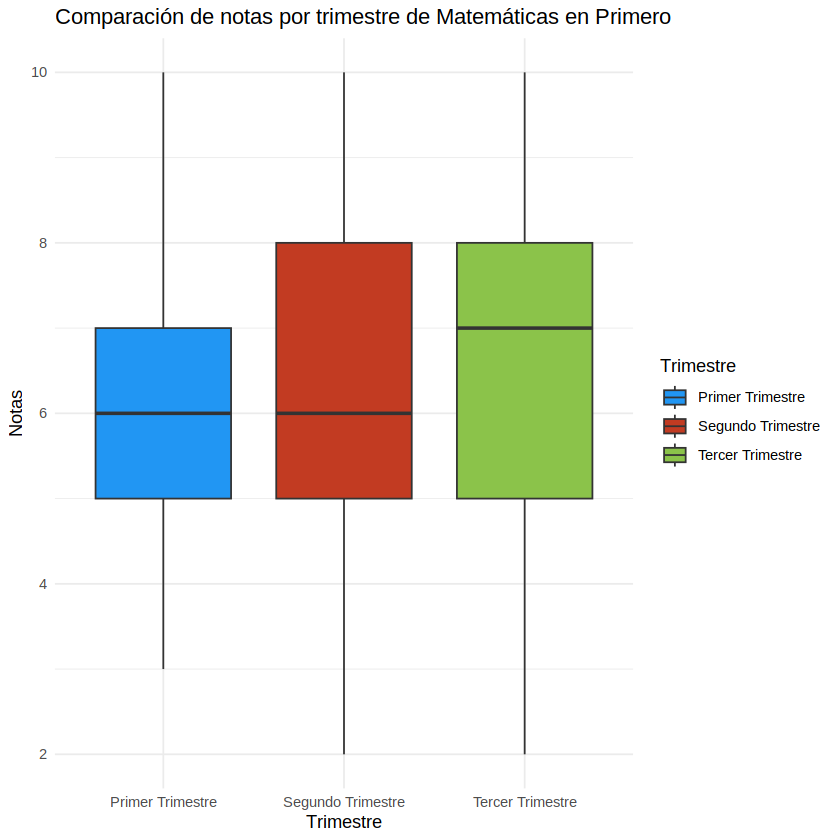

In [129]:
# Filtramos los datos 
datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "PRIMERO")$NotasPrimerT
datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "PRIMERO")$NotasSegundoT
datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "PRIMERO")$NotasTercerT

# Unimos los datos filtrados a un data frame
datos_completos <- data.frame(
  Trimestre = rep(c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"), each = length(datos_primer_tri)),
  Notas = c(datos_primer_tri, datos_segundo_tri, datos_tercer_tri))

# Convertimos la variable Trimestre a factor
datos_completos$Trimestre <- factor(datos_completos$Trimestre, levels = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"))

# Gráfico de caja y bigotes con ggplot2
ggplot(datos_completos, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  labs(title = "Comparación de notas por trimestre de Matemáticas en Primero",
       x = "Trimestre",
       y = "Notas") +
  scale_fill_manual(values = c("#2196f3", "#C23B22", "#8bc34a")) +
  theme_minimal()

***Test de Friedman***

In [130]:
# Calculamos el tamaño de los alumnos de primer grado en Matemática para utilizar posteriormente
tamanio = length(datos_primer_tri)
print(tamanio)

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

#SUPUESTOS
#Chequeamos normalidad de los residuos con shapiro (cantidad de datos < 5000)
# Ajustar el modelo lineal
modelo_lm <- lm(notas ~ trimestres, data = datos)
# Obtener los residuos del modelo
datos$residuals <- resid(modelo_lm)
print("Test de Normalidad:")
shapiro.test(datos$residuals) #Rechazo H0 --> No los residuos no se distribuyen Normalmente

#Como los residuos no se distribuyen normalmente --> TEST DE FRIEDMAN
# Test para encontrar diferencias significativas entre los grupos
friedman.test(notas ~ trimestres | Alumnos, data=datos)

# Potencia del test
friedman_anova <- pwr.anova.test(k = 3, n = tamanio, f = 0.25, sig.level = 0.05)$power
print("Potencia del test:")
friedman_anova

# Calculamos medias de cada grupo p/chequear
by(data = datos$notas, INDICES = datos$trimestres, FUN = median)

# Para saber entre que conjuntos de datos estan las diferencias
pairwise.wilcox.test(datos$notas, datos$trimestres, paired = TRUE)

[1] 632


,Alumnos,notas,trimestres
,<int>,<dbl>,<fct>
1,1,9,Primer Trimestre
2,2,3,Primer Trimestre
3,3,3,Primer Trimestre
4,4,7,Primer Trimestre
5,5,6,Primer Trimestre
6,6,3,Primer Trimestre


[1] "Test de Normalidad:"



	Shapiro-Wilk normality test

data:  datos$residuals
W = 0.96219, p-value < 2.2e-16



	Friedman rank sum test

data:  notas and trimestres and Alumnos
Friedman chi-squared = 2.9882, df = 2, p-value = 0.2244


[1] "Potencia del test:"


[1] 1

datos$trimestres: Primer Trimestre
[1] 6
------------------------------------------------------------ 
datos$trimestres: Segundo Trimestre
[1] 6
------------------------------------------------------------ 
datos$trimestres: Tercer Trimestre
[1] 7


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  datos$notas and datos$trimestres 

                  Primer Trimestre Segundo Trimestre
Segundo Trimestre 0.32             -                
Tercer Trimestre  0.53             0.94             

P value adjustment method: holm 

***Grafico de coordenadas paralelas***

,Alumnos,notas,trimestres
,<int>,<dbl>,<fct>
1,1,9,Primer Trimestre
2,2,3,Primer Trimestre
3,3,3,Primer Trimestre
4,4,7,Primer Trimestre
5,5,6,Primer Trimestre
6,6,3,Primer Trimestre


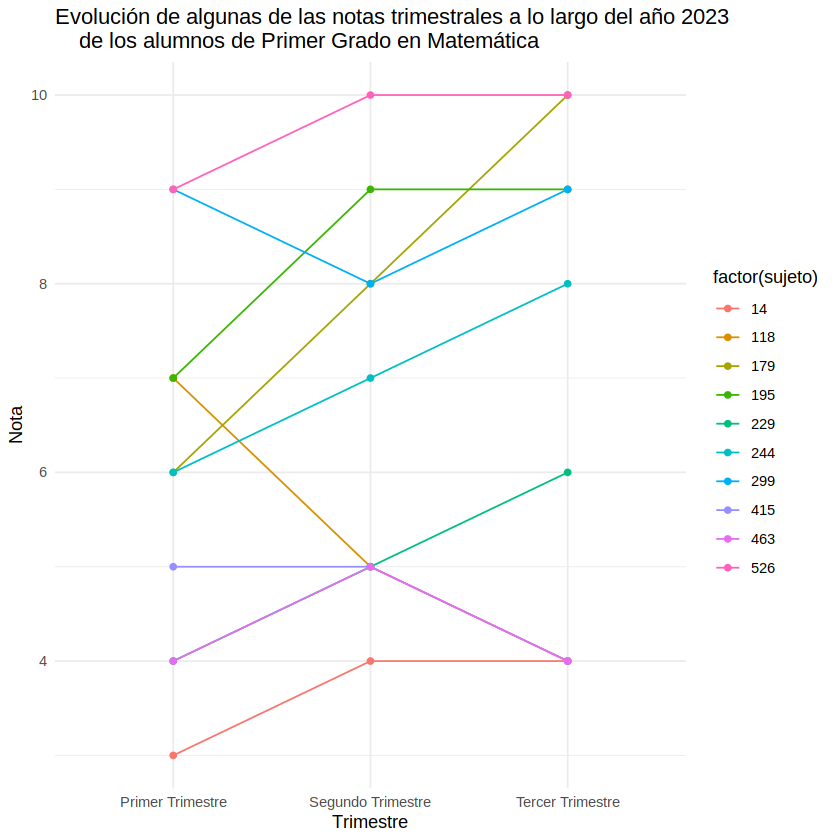

In [131]:
# Armamos el data frame con lo datos
notas_primero <- data.frame(
 sujeto = 1:tamanio,
 datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "PRIMERO")$NotasPrimerT,
 datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "PRIMERO")$NotasSegundoT,
 datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "PRIMERO")$NotasTercerT)

# Esto sirve para armar los datos de manera larga
datos_largo <- melt(notas_primero, id.vars= "sujeto", variable.name= "Notas", value.name= "Puntuacion")



# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

# Grafico de coordenadas paralelas de los primeros 10 estudiantes (no se hacen todos porque no se entenderia el grafico con tantas lineas)
# Primero modificamos el nombre de los datos para que a la hora de ponerlos en el grafico, se vea mas conciso cada clase
datos_largo$Notas <- gsub("datos_primer_tri.*", "Primer Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_segundo_tri.*", "Segundo Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_tercer_tri.*", "Tercer Trimestre", datos_largo$Notas)

# Seleccionar 10 alumnos aleatorios
set.seed(123) # Fijar una semilla para reproducibilidad
alumnos_aleatorios <- sample(unique(datos_largo$sujeto), 10)
# Filtrar los datos para los alumnos seleccionados aleatoriamente
datos_grafica <- datos_largo %>%
  filter(sujeto %in% alumnos_aleatorios)

# Grafico de coordenadas paralelas de los primeros 10 alumnos con sus notas en cada trimestre
ggplot(datos_grafica, aes(x = Notas, y = Puntuacion, group = sujeto, color = factor(sujeto))) +
  geom_line() +
  geom_point() +
  labs(title = "Evolución de algunas de las notas trimestrales a lo largo del año 2023
    de los alumnos de Primer Grado en Matemática",
       x = "Trimestre",
       y = "Nota") +
  theme_minimal()

### SEGUNDO

***Análisis Exploratorio***

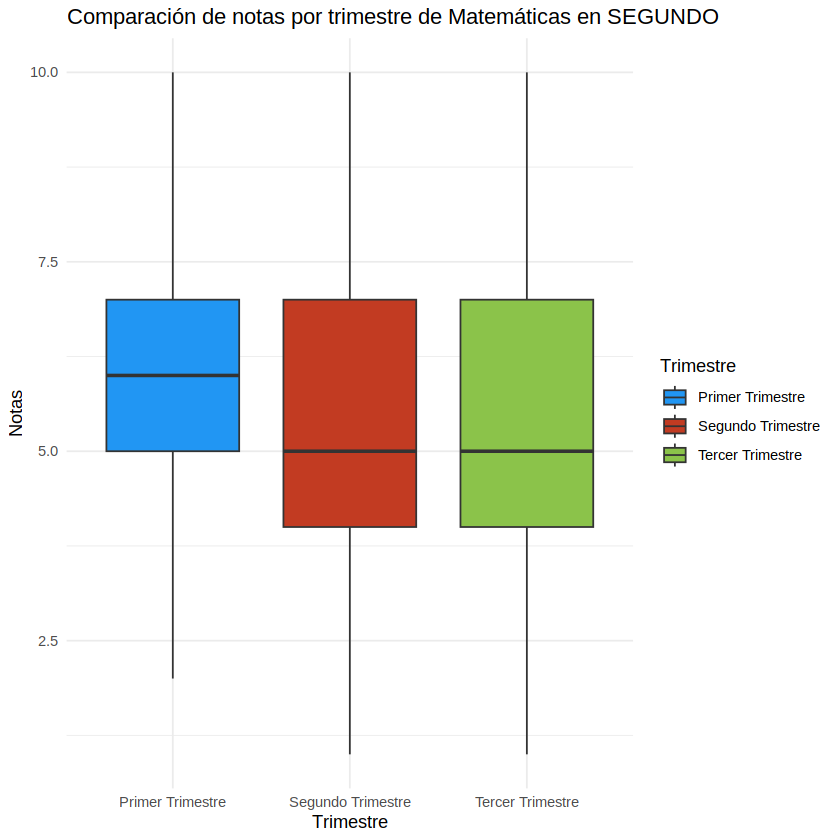

In [132]:
# Filtramos los datos 
datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEGUNDO")$NotasPrimerT
datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEGUNDO")$NotasSegundoT
datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEGUNDO")$NotasTercerT

# Unimos los datos filtrados a un data frame
datos_completos <- data.frame(
  Trimestre = rep(c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"), each = length(datos_primer_tri)),
  Notas = c(datos_primer_tri, datos_segundo_tri, datos_tercer_tri))

# Convertimos la variable Trimestre a factor
datos_completos$Trimestre <- factor(datos_completos$Trimestre, levels = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"))

# Gráfico de caja y bigotes con ggplot2
ggplot(datos_completos, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  labs(title = "Comparación de notas por trimestre de Matemáticas en SEGUNDO",
       x = "Trimestre",
       y = "Notas") +
  scale_fill_manual(values = c("#2196f3", "#C23B22", "#8bc34a")) +
  theme_minimal()

***Test de Friedman***

In [133]:
# Calculamos el tamaño de los alumnos de primer grado en Matemática para utilizar posteriormente
tamanio = length(datos_primer_tri)
print(tamanio)

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

#SUPUESTOS
#Chequeamos normalidad de los residuos con shapiro (cantidad de datos < 5000)
# Ajustar el modelo lineal
modelo_lm <- lm(notas ~ trimestres, data = datos)
# Obtener los residuos del modelo
datos$residuals <- resid(modelo_lm)
print("Test de Normalidad:")
shapiro.test(datos$residuals) #Rechazo H0 --> No los residuos no se distribuyen Normalmente

#Como los residuos no se distribuyen normalmente --> TEST DE FRIEDMAN
# Test para encontrar diferencias significativas entre los grupos
friedman.test(notas ~ trimestres | Alumnos, data=datos)

# Potencia del test
friedman_anova <- pwr.anova.test(k = 3, n = tamanio, f = 0.25, sig.level = 0.05)$power
print("Potencia del test:")
friedman_anova

# Calculamos medias de cada grupo p/chequear
by(data = datos$notas, INDICES = datos$trimestres, FUN = median)

# Para saber entre que conjuntos de datos estan las diferencias
pairwise.wilcox.test(datos$notas, datos$trimestres, paired = TRUE)

[1] 910


,Alumnos,notas,trimestres
,<int>,<dbl>,<fct>
1,1,4,Primer Trimestre
2,2,4,Primer Trimestre
3,3,6,Primer Trimestre
4,4,8,Primer Trimestre
5,5,3,Primer Trimestre
6,6,5,Primer Trimestre


[1] "Test de Normalidad:"



	Shapiro-Wilk normality test

data:  datos$residuals
W = 0.9861, p-value = 1.056e-15



	Friedman rank sum test

data:  notas and trimestres and Alumnos
Friedman chi-squared = 135.06, df = 2, p-value < 2.2e-16


[1] "Potencia del test:"


[1] 1

datos$trimestres: Primer Trimestre
[1] 6
------------------------------------------------------------ 
datos$trimestres: Segundo Trimestre
[1] 5
------------------------------------------------------------ 
datos$trimestres: Tercer Trimestre
[1] 5


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  datos$notas and datos$trimestres 

                  Primer Trimestre Segundo Trimestre
Segundo Trimestre < 2e-16          -                
Tercer Trimestre  < 2e-16          1.6e-11          

P value adjustment method: holm 

***Grafico de coordenadas paralelas***

,Alumnos,notas,trimestres
,<int>,<dbl>,<fct>
1,1,4,Primer Trimestre
2,2,4,Primer Trimestre
3,3,6,Primer Trimestre
4,4,8,Primer Trimestre
5,5,3,Primer Trimestre
6,6,5,Primer Trimestre


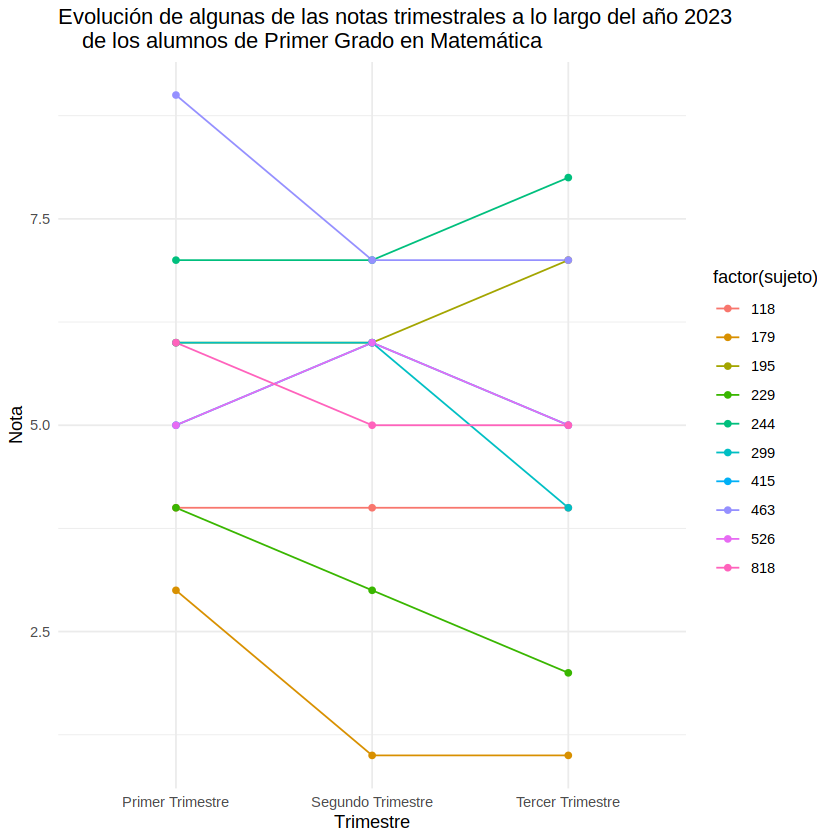

In [134]:
# Armamos el data frame con lo datos
notas_segundo <- data.frame(
 sujeto = 1:tamanio,
 datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEGUNDO")$NotasPrimerT,
 datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEGUNDO")$NotasSegundoT,
 datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEGUNDO")$NotasTercerT)

# Esto sirve para armar los datos de manera larga
datos_largo <- melt(notas_segundo, id.vars= "sujeto", variable.name= "Notas", value.name= "Puntuacion")

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

# Grafico de coordenadas paralelas de los primeros 10 estudiantes (no se hacen todos porque no se entenderia el grafico con tantas lineas)
# Primero modificamos el nombre de los datos para que a la hora de ponerlos en el grafico, se vea mas conciso cada clase
datos_largo$Notas <- gsub("datos_primer_tri.*", "Primer Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_segundo_tri.*", "Segundo Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_tercer_tri.*", "Tercer Trimestre", datos_largo$Notas)

# Seleccionar 10 alumnos aleatorios
set.seed(123) # Fijar una semilla para reproducibilidad
alumnos_aleatorios <- sample(unique(datos_largo$sujeto), 10)
# Filtrar los datos para los alumnos seleccionados aleatoriamente
datos_grafica <- datos_largo %>%
  filter(sujeto %in% alumnos_aleatorios)

# Grafico de coordenadas paralelas de los primeros 10 alumnos con sus notas en cada trimestre
ggplot(datos_grafica, aes(x = Notas, y = Puntuacion, group = sujeto, color = factor(sujeto))) +
  geom_line() +
  geom_point() +
  labs(title = "Evolución de algunas de las notas trimestrales a lo largo del año 2023
    de los alumnos de Primer Grado en Matemática",
       x = "Trimestre",
       y = "Nota") +
  theme_minimal()

### TERCERO

***Análisis Exploratorio***

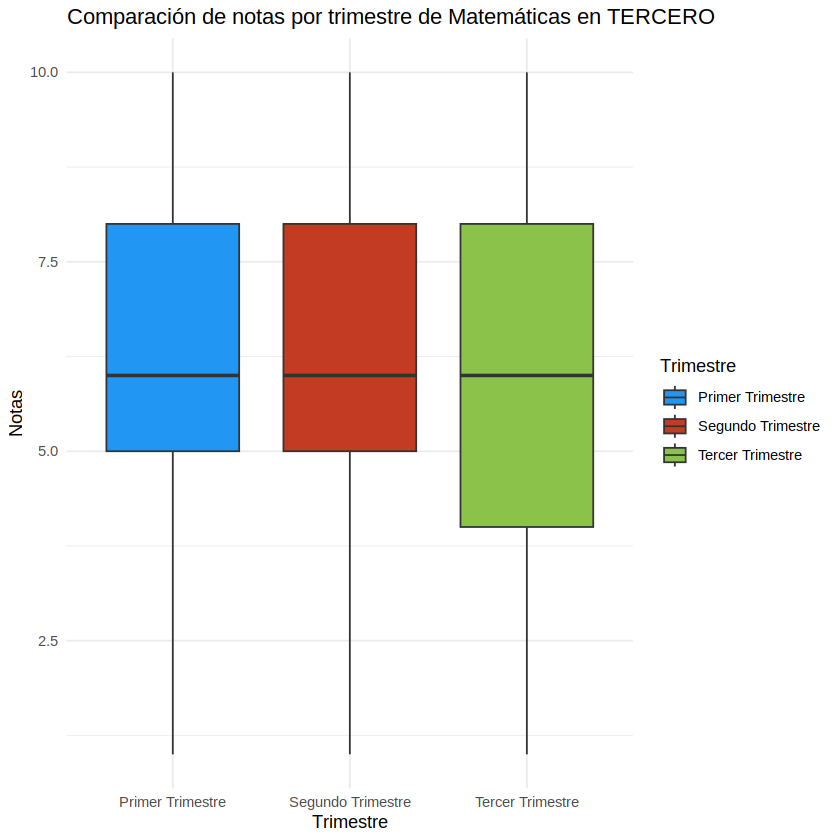

In [135]:
# Filtramos los datos 
datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "TERCERO")$NotasPrimerT
datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "TERCERO")$NotasSegundoT
datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "TERCERO")$NotasTercerT

# Unimos los datos filtrados a un data frame
datos_completos <- data.frame(
  Trimestre = rep(c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"), each = length(datos_primer_tri)),
  Notas = c(datos_primer_tri, datos_segundo_tri, datos_tercer_tri))

# Convertimos la variable Trimestre a factor
datos_completos$Trimestre <- factor(datos_completos$Trimestre, levels = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"))

# Gráfico de caja y bigotes con ggplot2
ggplot(datos_completos, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  labs(title = "Comparación de notas por trimestre de Matemáticas en TERCERO",
       x = "Trimestre",
       y = "Notas") +
  scale_fill_manual(values = c("#2196f3", "#C23B22", "#8bc34a")) +
  theme_minimal()

***Test de Friedman***

In [136]:
# Calculamos el tamaño de los alumnos de primer grado en Matemática para utilizar posteriormente
tamanio = length(datos_primer_tri)
print(tamanio)

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

#SUPUESTOS
#Chequeamos normalidad de los residuos con shapiro (cantidad de datos < 5000)
# Ajustar el modelo lineal
modelo_lm <- lm(notas ~ trimestres, data = datos)
# Obtener los residuos del modelo
datos$residuals <- resid(modelo_lm)
print("Test de Normalidad:")
shapiro.test(datos$residuals) #Rechazo H0 --> No los residuos no se distribuyen Normalmente

#Como los residuos no se distribuyen normalmente --> TEST DE FRIEDMAN
# Test para encontrar diferencias significativas entre los grupos
friedman.test(notas ~ trimestres | Alumnos, data=datos)

# Potencia del test
friedman_anova <- pwr.anova.test(k = 3, n = tamanio, f = 0.25, sig.level = 0.05)$power
print("Potencia del test:")
friedman_anova

# Calculamos medias de cada grupo p/chequear
by(data = datos$notas, INDICES = datos$trimestres, FUN = median)

# Para saber entre que conjuntos de datos estan las diferencias
pairwise.wilcox.test(datos$notas, datos$trimestres, paired = TRUE)

[1] 673


,Alumnos,notas,trimestres
,<int>,<dbl>,<fct>
1,1,8,Primer Trimestre
2,2,9,Primer Trimestre
3,3,4,Primer Trimestre
4,4,6,Primer Trimestre
5,5,8,Primer Trimestre
6,6,6,Primer Trimestre


[1] "Test de Normalidad:"



	Shapiro-Wilk normality test

data:  datos$residuals
W = 0.96969, p-value < 2.2e-16



	Friedman rank sum test

data:  notas and trimestres and Alumnos
Friedman chi-squared = 5.7261, df = 2, p-value = 0.05709


[1] "Potencia del test:"


[1] 1

datos$trimestres: Primer Trimestre
[1] 6
------------------------------------------------------------ 
datos$trimestres: Segundo Trimestre
[1] 6
------------------------------------------------------------ 
datos$trimestres: Tercer Trimestre
[1] 6


	Pairwise comparisons using Wilcoxon signed rank test with continuity correction 

data:  datos$notas and datos$trimestres 

                  Primer Trimestre Segundo Trimestre
Segundo Trimestre 0.035            -                
Tercer Trimestre  0.713            0.014            

P value adjustment method: holm 

***Grafico de coordenadas paralelas***

,Alumnos,notas,trimestres
,<int>,<dbl>,<fct>
1,1,8,Primer Trimestre
2,2,9,Primer Trimestre
3,3,4,Primer Trimestre
4,4,6,Primer Trimestre
5,5,8,Primer Trimestre
6,6,6,Primer Trimestre


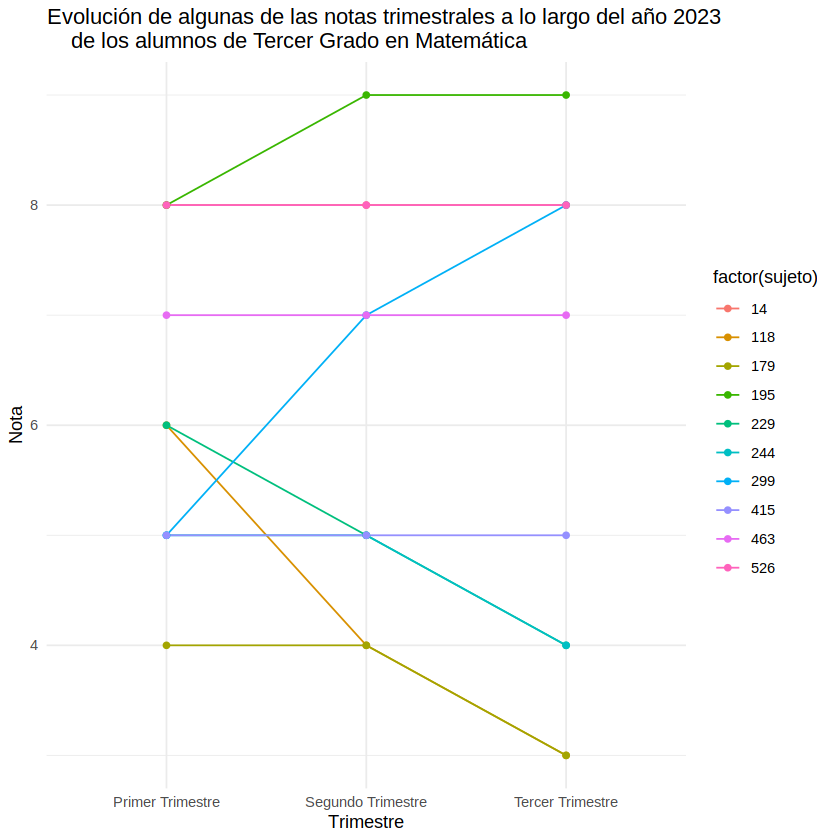

In [137]:
# Armamos el data frame con lo datos
notas_tercero <- data.frame(
 sujeto = 1:tamanio,
 datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "TERCERO")$NotasPrimerT,
 datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "TERCERO")$NotasSegundoT,
 datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "TERCERO")$NotasTercerT)

# Esto sirve para armar los datos de manera larga
datos_largo <- melt(notas_tercero, id.vars= "sujeto", variable.name= "Notas", value.name= "Puntuacion")

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

# Grafico de coordenadas paralelas de los primeros 10 estudiantes (no se hacen todos porque no se entenderia el grafico con tantas lineas)
# Primero modificamos el nombre de los datos para que a la hora de ponerlos en el grafico, se vea mas conciso cada clase
datos_largo$Notas <- gsub("datos_primer_tri.*", "Primer Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_segundo_tri.*", "Segundo Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_tercer_tri.*", "Tercer Trimestre", datos_largo$Notas)

# Seleccionar 10 alumnos aleatorios
set.seed(123) # Fijar una semilla para reproducibilidad
alumnos_aleatorios <- sample(unique(datos_largo$sujeto), 10)
# Filtrar los datos para los alumnos seleccionados aleatoriamente
datos_grafica <- datos_largo %>%
  filter(sujeto %in% alumnos_aleatorios)

# Grafico de coordenadas paralelas de los primeros 10 alumnos con sus notas en cada trimestre
ggplot(datos_grafica, aes(x = Notas, y = Puntuacion, group = sujeto, color = factor(sujeto))) +
  geom_line() +
  geom_point() +
  labs(title = "Evolución de algunas de las notas trimestrales a lo largo del año 2023
    de los alumnos de Tercer Grado en Matemática",
       x = "Trimestre",
       y = "Nota") +
  theme_minimal()

### CUARTO

***Análisis Exploratorio***

In [ ]:
# Filtramos los datos 
datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "CUARTO")$NotasPrimerT
datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "CUARTO")$NotasSegundoT
datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "CUARTO")$NotasTercerT

# Unimos los datos filtrados a un data frame
datos_completos <- data.frame(
  Trimestre = rep(c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"), each = length(datos_primer_tri)),
  Notas = c(datos_primer_tri, datos_segundo_tri, datos_tercer_tri))

# Convertimos la variable Trimestre a factor
datos_completos$Trimestre <- factor(datos_completos$Trimestre, levels = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"))

# Gráfico de caja y bigotes con ggplot2
ggplot(datos_completos, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  labs(title = "Comparación de notas por trimestre de Matemáticas en CUARTO",
       x = "Trimestre",
       y = "Notas") +
  scale_fill_manual(values = c("#2196f3", "#C23B22", "#8bc34a")) +
  theme_minimal()

***Test de Friedman***

In [ ]:
# Calculamos el tamaño de los alumnos de primer grado en Matemática para utilizar posteriormente
tamanio = length(datos_primer_tri)
print(tamanio)

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

#SUPUESTOS
#Chequeamos normalidad de los residuos con shapiro (cantidad de datos < 5000)
# Ajustar el modelo lineal
modelo_lm <- lm(notas ~ trimestres, data = datos)
# Obtener los residuos del modelo
datos$residuals <- resid(modelo_lm)
print("Test de Normalidad:")
shapiro.test(datos$residuals) #Rechazo H0 --> No los residuos no se distribuyen Normalmente

#Como los residuos no se distribuyen normalmente --> TEST DE FRIEDMAN
# Test para encontrar diferencias significativas entre los grupos
friedman.test(notas ~ trimestres | Alumnos, data=datos)

# Potencia del test
friedman_anova <- pwr.anova.test(k = 3, n = tamanio, f = 0.25, sig.level = 0.05)$power
print("Potencia del test:")
friedman_anova

# Calculamos medias de cada grupo p/chequear
by(data = datos$notas, INDICES = datos$trimestres, FUN = median)

# Para saber entre que conjuntos de datos estan las diferencias
pairwise.wilcox.test(datos$notas, datos$trimestres, paired = TRUE)

***Grafico de coordenadas paralelas***

In [ ]:
# Armamos el data frame con lo datos
notas_cuarto <- data.frame(
 sujeto = 1:tamanio,
 datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "CUARTO")$NotasPrimerT,
 datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "CUARTO")$NotasSegundoT,
 datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "CUARTO")$NotasTercerT)

# Esto sirve para armar los datos de manera larga
datos_largo <- melt(notas_cuarto, id.vars= "sujeto", variable.name= "Notas", value.name= "Puntuacion")



# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

# Grafico de coordenadas paralelas de los primeros 10 estudiantes (no se hacen todos porque no se entenderia el grafico con tantas lineas)
# Primero modificamos el nombre de los datos para que a la hora de ponerlos en el grafico, se vea mas conciso cada clase
datos_largo$Notas <- gsub("datos_primer_tri.*", "Primer Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_segundo_tri.*", "Segundo Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_tercer_tri.*", "Tercer Trimestre", datos_largo$Notas)

# Seleccionar 10 alumnos aleatorios
set.seed(123) # Fijar una semilla para reproducibilidad
alumnos_aleatorios <- sample(unique(datos_largo$sujeto), 10)
# Filtrar los datos para los alumnos seleccionados aleatoriamente
datos_grafica <- datos_largo %>%
  filter(sujeto %in% alumnos_aleatorios)

# Grafico de coordenadas paralelas de los primeros 10 alumnos con sus notas en cada trimestre
ggplot(datos_grafica, aes(x = Notas, y = Puntuacion, group = sujeto, color = factor(sujeto))) +
  geom_line() +
  geom_point() +
  labs(title = "Evolución de algunas de las notas trimestrales a lo largo del año 2023
    de los alumnos de Primer cuarto en Matemática",
       x = "Trimestre",
       y = "Nota") +
  theme_minimal()

### QUINTO

***Análisis Exploratorio***

In [ ]:
# Filtramos los datos 
datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "QUINTO")$NotasPrimerT
datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "QUINTO")$NotasSegundoT
datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "QUINTO")$NotasTercerT

# Unimos los datos filtrados a un data frame
datos_completos <- data.frame(
  Trimestre = rep(c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"), each = length(datos_primer_tri)),
  Notas = c(datos_primer_tri, datos_segundo_tri, datos_tercer_tri))

# Convertimos la variable Trimestre a factor
datos_completos$Trimestre <- factor(datos_completos$Trimestre, levels = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"))

# Gráfico de caja y bigotes con ggplot2
ggplot(datos_completos, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  labs(title = "Comparación de notas por trimestre de Matemáticas en QUINTO",
       x = "Trimestre",
       y = "Notas") +
  scale_fill_manual(values = c("#2196f3", "#C23B22", "#8bc34a")) +
  theme_minimal()

***Test de Friedman***

In [ ]:
# Calculamos el tamaño de los alumnos de primer grado en Matemática para utilizar posteriormente
tamanio = length(datos_primer_tri)
print(tamanio)

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

#SUPUESTOS
#Chequeamos normalidad de los residuos con shapiro (cantidad de datos < 5000)
# Ajustar el modelo lineal
modelo_lm <- lm(notas ~ trimestres, data = datos)
# Obtener los residuos del modelo
datos$residuals <- resid(modelo_lm)
print("Test de Normalidad:")
shapiro.test(datos$residuals) #Rechazo H0 --> No los residuos no se distribuyen Normalmente

#Como los residuos no se distribuyen normalmente --> TEST DE FRIEDMAN
# Test para encontrar diferencias significativas entre los grupos
friedman.test(notas ~ trimestres | Alumnos, data=datos)

# Potencia del test
friedman_anova <- pwr.anova.test(k = 3, n = tamanio, f = 0.25, sig.level = 0.05)$power
print("Potencia del test:")
friedman_anova

# Calculamos medias de cada grupo p/chequear
by(data = datos$notas, INDICES = datos$trimestres, FUN = median)

# Para saber entre que conjuntos de datos estan las diferencias
pairwise.wilcox.test(datos$notas, datos$trimestres, paired = TRUE)

***Grafico de coordenadas paralelas***

In [ ]:
# Armamos el data frame con lo datos
notas_quinto <- data.frame(
 sujeto = 1:tamanio,
 datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "QUINTO")$NotasPrimerT,
 datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "QUINTO")$NotasSegundoT,
 datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "QUINTO")$NotasTercerT)

# Esto sirve para armar los datos de manera larga
datos_largo <- melt(notas_quinto, id.vars= "sujeto", variable.name= "Notas", value.name= "Puntuacion")

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

# Grafico de coordenadas paralelas de los primeros 10 estudiantes (no se hacen todos porque no se entenderia el grafico con tantas lineas)
# Primero modificamos el nombre de los datos para que a la hora de ponerlos en el grafico, se vea mas conciso cada clase
datos_largo$Notas <- gsub("datos_primer_tri.*", "Primer Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_segundo_tri.*", "Segundo Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_tercer_tri.*", "Tercer Trimestre", datos_largo$Notas)

# Seleccionar 10 alumnos aleatorios
set.seed(123) # Fijar una semilla para reproducibilidad
alumnos_aleatorios <- sample(unique(datos_largo$sujeto), 10)
# Filtrar los datos para los alumnos seleccionados aleatoriamente
datos_grafica <- datos_largo %>%
  filter(sujeto %in% alumnos_aleatorios)

# Grafico de coordenadas paralelas de los primeros 10 alumnos con sus notas en cada trimestre
ggplot(datos_grafica, aes(x = Notas, y = Puntuacion, group = sujeto, color = factor(sujeto))) +
  geom_line() +
  geom_point() +
  labs(title = "Evolución de algunas de las notas trimestrales a lo largo del año 2023
    de los alumnos de quinto Grado en Matemática",
       x = "Trimestre",
       y = "Nota") +
  theme_minimal()

### SEXTO

***Análisis Exploratorio***

In [ ]:
# Filtramos los datos 
datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEXTO")$NotasPrimerT
datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEXTO")$NotasSegundoT
datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEXTO")$NotasTercerT

# Unimos los datos filtrados a un data frame
datos_completos <- data.frame(
  Trimestre = rep(c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"), each = length(datos_primer_tri)),
  Notas = c(datos_primer_tri, datos_segundo_tri, datos_tercer_tri))

# Convertimos la variable Trimestre a factor
datos_completos$Trimestre <- factor(datos_completos$Trimestre, levels = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"))

# Gráfico de caja y bigotes con ggplot2
ggplot(datos_completos, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  labs(title = "Comparación de notas por trimestre de Matemáticas en SEXTO",
       x = "Trimestre",
       y = "Notas") +
  scale_fill_manual(values = c("#2196f3", "#C23B22", "#8bc34a")) +
  theme_minimal()

***Test de Friedman***

In [ ]:
# Calculamos el tamaño de los alumnos de primer grado en Matemática para utilizar posteriormente
tamanio = length(datos_primer_tri)
print(tamanio)

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

#SUPUESTOS
#Chequeamos normalidad de los residuos con shapiro (cantidad de datos < 5000)
# Ajustar el modelo lineal
modelo_lm <- lm(notas ~ trimestres, data = datos)
# Obtener los residuos del modelo
datos$residuals <- resid(modelo_lm)
print("Test de Normalidad:")
shapiro.test(datos$residuals) #Rechazo H0 --> No los residuos no se distribuyen Normalmente

#Como los residuos no se distribuyen normalmente --> TEST DE FRIEDMAN
# Test para encontrar diferencias significativas entre los grupos
friedman.test(notas ~ trimestres | Alumnos, data=datos)

# Potencia del test
friedman_anova <- pwr.anova.test(k = 3, n = tamanio, f = 0.25, sig.level = 0.05)$power
print("Potencia del test:")
friedman_anova

# Calculamos medias de cada grupo p/chequear
by(data = datos$notas, INDICES = datos$trimestres, FUN = median)

# Para saber entre que conjuntos de datos estan las diferencias
pairwise.wilcox.test(datos$notas, datos$trimestres, paired = TRUE)

***Grafico de coordenadas paralelas***

In [ ]:
# Armamos el data frame con lo datos
notas_sexto <- data.frame(
 sujeto = 1:tamanio,
 datos_primer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEXTO")$NotasPrimerT,
 datos_segundo_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEXTO")$NotasSegundoT,
 datos_tercer_tri <- filter(secundaria_VICTORIA, asignatura == "MATEMATICA",Año_Curso == "SEXTO")$NotasTercerT)

# Esto sirve para armar los datos de manera larga
datos_largo <- melt(notas_sexto, id.vars= "sujeto", variable.name= "Notas", value.name= "Puntuacion")

# Armamos el data frame con lo datos
notas= as.numeric(c(datos_primer_tri,datos_segundo_tri,datos_tercer_tri))
trimestres <- as.factor(c(rep("Primer Trimestre",length(datos_primer_tri)), rep("Segundo Trimestre",length(datos_segundo_tri)),rep("Tercer Trimestre",length(datos_tercer_tri))))
datos <- data.frame(Alumnos=rep(1:tamanio,3), notas, trimestres)
head(datos)

# Grafico de coordenadas paralelas de los primeros 10 estudiantes (no se hacen todos porque no se entenderia el grafico con tantas lineas)
# Primero modificamos el nombre de los datos para que a la hora de ponerlos en el grafico, se vea mas conciso cada clase
datos_largo$Notas <- gsub("datos_primer_tri.*", "Primer Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_segundo_tri.*", "Segundo Trimestre", datos_largo$Notas)
datos_largo$Notas <- gsub("datos_tercer_tri.*", "Tercer Trimestre", datos_largo$Notas)

# Seleccionar 10 alumnos aleatorios
set.seed(123) # Fijar una semilla para reproducibilidad
alumnos_aleatorios <- sample(unique(datos_largo$sujeto), 10)
# Filtrar los datos para los alumnos seleccionados aleatoriamente
datos_grafica <- datos_largo %>%
  filter(sujeto %in% alumnos_aleatorios)

# Grafico de coordenadas paralelas de los primeros 10 alumnos con sus notas en cada trimestre
ggplot(datos_grafica, aes(x = Notas, y = Puntuacion, group = sujeto, color = factor(sujeto))) +
  geom_line() +
  geom_point() +
  labs(title = "Evolución de algunas de las notas trimestrales a lo largo del año 2023
    de los alumnos de sexto Grado en Matemática",
       x = "Trimestre",
       y = "Nota") +
  theme_minimal()

--------------------------

# Guia 8 - Análisis Bivariado Cualitativo

## Verificamos si el tipo de gestion(publico/privado) influye en la condicion del alumno (aprobado/rinde)

***El analisis lo hacemos a nivel general, no hurgamos año por año***

In [ ]:
#Para simplificar modificamos la variable 'EsPrivada' por 'Gestion' que contiene el tipo de gestion 
secundaria_VICTORIA <- rename(secundaria_VICTORIA, c(
                               "Gestión"= "EsPrivada"))

secundaria_VICTORIA <- secundaria_VICTORIA %>%
    mutate(Gestión = case_when(
    Gestión == "N" ~ "Pública",
    Gestión == "S" ~ "Privada"
))
#Guardamos los cambios realizamos 
write_xlsx(secundaria_VICTORIA, "VICTORIA_SECUNDARIA_LIMPIA.xlsx")

In [ ]:
names(secundaria_VICTORIA)
unique(secundaria_VICTORIA$Gestión)
unique(secundaria_VICTORIA$Condición)

In [ ]:
colnames(secundaria_VICTORIA)

In [ ]:
# Armamos una tabla con los tipos de gestiones de las escuelas y la condicion final 
#logrados por los estudiantes en las materias

condicion_gestion <- secundaria_VICTORIA %>%
    dplyr::select(Gestión, Condición) %>%
    table()

print(condicion_gestion)

# Reordenamos la tabla
condicion_gestion1 <- rbind(condicion_gestion[2,], condicion_gestion[1,])
condicion_gestion1 <- cbind(condicion_gestion1[,1], condicion_gestion1[,2])
colnames(condicion_gestion1) <- c("Aprobado", "Rinde")
rownames(condicion_gestion1) <- c("Pública", "Privada")

print("Tabla con marginales fila y columna")
condicion_gestion2 <- cbind(condicion_gestion1, "Total"= margin.table(condicion_gestion1,1))
condicion_gestion2 <- rbind(condicion_gestion2, "Total"=margin.table(condicion_gestion2,2))
condicion_gestion2

print("Tabla contingencia ~ Porcentaje Total")
tabla_cont_total <- prop.table(condicion_gestion1)*100
tabla_cont_total <- cbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,1))
tabla_cont_total <- rbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,2))
round(tabla_cont_total,1)

print("Tabla contingencia ~ Porcentaje Fila")
tabla_cont_filas <- prop.table(rbind(condicion_gestion1, "Total"=margin.table(condicion_gestion1, 2)),1)*100
tabla_cont_filas <- cbind(tabla_cont_filas, "Total"=margin.table(tabla_cont_filas,1))
round(tabla_cont_filas,1)

print("Tabla contingencia ~ Porcentaje Columna")
tabla_cont_col <- prop.table(cbind(condicion_gestion1, "Total"=margin.table(condicion_gestion1, 1)),2)*100
tabla_cont_col <- rbind(tabla_cont_col, "Total"=margin.table(tabla_cont_col,2))
round(tabla_cont_col,1)

In [ ]:
# Organizamos los datos para hacer un grafico de barras adosadas
tabla_variable_fila <- round(prop.table(table(secundaria_VICTORIA$Gestión, secundaria_VICTORIA$Condición), 1)*100,1)
tabla_variable_fila <- t(tabla_variable_fila)
grafico <- barplot(tabla_variable_fila,
                  main= " Grafico de Contigencia por fila",
                  beside= TRUE,
                  space= c(0.1, 2.5),
                  ylim= c(0, 100),
                  cex.axis= 1.2,
                  cex.names= 1.2,
                  cex.main= 1.5,
                  col= c("green", "red"),
                  xlab = "Gestión",
                  cex.lab = 1.5,
                  ylab= "Porcentaje",
                  col.lab= "black")

legend(x = 4.5, y = 100, rownames(tabla_variable_fila),
       title = "Condición",
       title.adj = 0.5,     
       title.col = "black",      
       lty = c(1),
       col= c("green", "red"),
       lwd = 2,
       cex = 1.2) 

In [ ]:
# Al parecer según el tipo de gestión de la escuela "causa" la cantidad de materias que los estudiantes
#aprueban o les quedan pendientes
# Para saber si realmente existe una relación entre las variables aplicaremos el test de chi cuadrado
# H0 ---> No hay relación entre las variables
# H1 ---> Si hay relación entre las variables
chi <-chisq.test(secundaria_VICTORIA$Gestión, secundaria_VICTORIA$Condición)
chi
# Vemos la fuerza de asociación
CramerV(secundaria_VICTORIA$Gestión, secundaria_VICTORIA$Condición)
#Obtengo --> 0.120606012963042

In [ ]:
# Frecuencias observadas
chi$observed

# Frecuencias esperadas si las variables fueran independientes
round(chi$expected,0)

# Residuos estandarizados
round(chi$residuals,1)

# Residuos ajustados
round(chi$stdres,1)

## Comparacion del desempeño final en asignaturas troncales

In [ ]:
# Creamos la variable desempeño segun el promedio conseguido
secundaria_VICTORIA <- secundaria_VICTORIA %>%
    mutate(Desempeño = case_when(
    Promedio < 4 ~ "Insuficiente",
    Promedio >= 4 & Promedio < 6 ~ "Regular",
    Promedio >= 6 & Promedio < 7 ~ "Aprobado",
    Promedio >= 7 & Promedio < 8 ~ "Bueno",
    Promedio >= 8 & Promedio < 9 ~ "MuyBueno",
    Promedio >= 9 & Promedio <= 10 ~ "Distinguido"))

#Guardamos los cambios realizamos 
write_xlsx(secundaria_VICTORIA, "VICTORIA_SECUNDARIA_LIMPIA.xlsx")

In [ ]:
#Aprovechamos para agregar un nuevo grafico de torta para representar estos datos:
# Calcular las frecuencias de cada categoría de desempeño
desempeno_frecuencias <- table(secundaria_VICTORIA$`Desempeño`)

# Calcular los porcentajes de cada categoría
desempeno_porcentajes <- round(100 * desempeno_frecuencias / sum(desempeno_frecuencias), 1)

# Crear etiquetas para el gráfico de torta
titulos <- paste(names(desempeno_porcentajes), '\n', desempeno_porcentajes, '%')

# Definir colores para cada categoría
colors <- c("#ffeb3b","#ff6e40","#4caf50","#009688","#bb3af2","#C23B22")

# Crear el gráfico de torta
pie(desempeno_frecuencias, labels = titulos,
    col = colors,
    radius = .75,
    main = "Distribución Porcentual del Desempeño logrado por Estudiantes\n secundarios en el departameto Victoria, Entre Rios.",
    col.main = "black",
    sub = "Fuente de elaboración propia (Gráfico N°6)",
    col.sub = "black",
    density = 500, angle = seq(0, 180, 30),
    border = 'black')

In [ ]:
names(secundaria_VICTORIA)

In [ ]:
table(secundaria_VICTORIA$`Desempeño`,useNA = "always")
#Eliminamos los 95 datos NA
secundaria_VICTORIA <- secundaria_VICTORIA[complete.cases(secundaria_VICTORIA$Desempeño), ]

In [ ]:
#Encontramos las fa de las asignaturas
frecuencias_absolutas <- table(secundaria_VICTORIA$asignatura)
# Ordenar la tabla de frecuencias en orden descendente
frecuencias_ordenadas <- sort(frecuencias_absolutas, decreasing = TRUE)
# Mostrar las primeras categorías con mayor frecuencia
print(frecuencias_ordenadas[1:8]) 
#Tomamos esas asignaturas como "TRONCALES"

### PRIMERO

In [ ]:
# Armamos una tabla con las materias troncales y el desempeño logrado por los estudiantes
aux <- filter(secundaria_VICTORIA, (Año_Curso == "PRIMERO" & (asignatura == "MATEMATICA" | asignatura == "ETICA" |asignatura == "LENGUA Y LITERATURA" |asignatura == "GEOGRAFIA" |asignatura == "EDUCACION FISICA" |asignatura == "HISTORIA" |asignatura == "INGLES" |asignatura == "BIOLOGIA" )))
materias_desempeño <- aux %>%
    dplyr::select('asignatura', 'Desempeño') %>%
    table()

# Reordenamos la tabla
materias_desempeño1 <- cbind(materias_desempeño[,5], materias_desempeño[,1], materias_desempeño[,2], materias_desempeño[,4], materias_desempeño[,3])
colnames(materias_desempeño1) <- c("Regular", "Aprobado", "Bueno","MuyBueno","Distinguido")
rownames(materias_desempeño1) <- c("MATEMATICA", "ETICA", "LENGUA Y LITERATURA","GEOGRAFIA", "EDUCACION FISICA", "HISTORIA", "INGLES", "BIOLOGIA")
materias_desempeño1

print("Tabla con marginales fila y columna")
materias_desempeño2 <- cbind(materias_desempeño1, "Total"= margin.table(materias_desempeño1,1))
materias_desempeño2 <- rbind(materias_desempeño2, "Total"=margin.table(materias_desempeño2,2))
materias_desempeño2

print("Tabla contingencia ~ Porcentaje Total")
tabla_cont_total <- prop.table(materias_desempeño1)*100
tabla_cont_total <- cbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,1))
tabla_cont_total <- rbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,2))
round(tabla_cont_total,1)

print("Tabla contingencia ~ Porcentaje Fila")
tabla_cont_filas <- prop.table(rbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 2)),1)*100
tabla_cont_filas <- cbind(tabla_cont_filas, "Total"=margin.table(tabla_cont_filas,1))
round(tabla_cont_filas,1)

print("Tabla contingencia ~ Porcentaje Columna")
tabla_cont_col <- prop.table(cbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 1)),2)*100
tabla_cont_col <- rbind(tabla_cont_col, "Total"=margin.table(tabla_cont_col,2))
round(tabla_cont_col,1)


In [ ]:
# Organizamos los datos para hacer un grafico de barras adosadas
tabla_variable_fila <- round(prop.table(table(aux$asignatura, aux$Desempeño), 1)*100,1)
tabla_variable_fila <- t(tabla_variable_fila)
unique(aux$`Desempeño`)

# Define el orden deseado de las categorías de desempeño
orden_categorias <- c('Insuficiente', 'Regular', 'Aprobado', 'Bueno', 'MuyBueno', 'Distinguido')

# Convierte la columna "Desempeño" a un factor con el orden deseado
aux$Desempeño <- factor(aux$Desempeño, levels = orden_categorias)

# Organizamos los datos para hacer un grafico de barras apiladas
tabla_variable_col <- round(prop.table(table(aux$asignatura, aux$Desempeño), 2) * 100, 1)
grafico <- barplot(tabla_variable_col,
                   main = "Gráfico de Contingencia por columna - Primer Año",
                   beside = FALSE,
                   space = rep(0.7, ncol(tabla_variable_col)),
                   ylim = c(0, 110),
                   cex.axis = 1.2, 
                   cex.names = 1, 
                   cex.main = 1.1, 
                   col = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514", "#7668af", "cyan", "#aeea00", "#C23B22"),
                   xlab = "Desempeños",
                   cex.lab = 1.1,
                   ylab = "Porcentaje",
                   col.lab = "black")

# Primera línea de la leyenda
legend(x = 0, y = 115, rownames(tabla_variable_col)[1:4],
       cex = 0.6, fill = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514"),
       xpd = TRUE, horiz = TRUE, bty = "y")

# Segunda línea de la leyenda
legend(x = 0, y = 110, rownames(tabla_variable_col)[5:8],
       cex = 0.6, fill = c("#7668af", "cyan", "#aeea00", "#C23B22"),
       xpd = TRUE, horiz = TRUE, bty = "y")#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos

In [ ]:
# Como muestran los graficos y las tablas, segun el tipo de materia "causa" el desempeño final
#de cada alumno
# Para saber si realmente existe una relación entre las variables aplicaremos el test de chi cuadrado
# H0 ---> No hay relación entre las variables
# H1 ---> Si hay relación entre las variables
chi <-chisq.test(aux$asignatura, aux$Desempeño)
chi

# Vemos la fuerza de asociación
CramerV(aux$asignatura, aux$Desempeño)

In [ ]:
# Frecuencias observadas
chi$observed

# Frecuencias esperadas si las variables fueran independientes
round(chi$expected,0)

# Residuos estandarizados
round(chi$residuals,1)

# Residuos ajustados
round(chi$stdres,1)

### SEGUNDO

In [ ]:
# Armamos una tabla con las materias troncales y el desempeño logrado por los estudiantes
aux <- filter(secundaria_VICTORIA, (Año_Curso == "SEGUNDO" & (asignatura == "MATEMATICA" | asignatura == "ETICA" |asignatura == "LENGUA Y LITERATURA" |asignatura == "GEOGRAFIA" |asignatura == "EDUCACION FISICA" |asignatura == "HISTORIA" |asignatura == "INGLES" |asignatura == "BIOLOGIA" )))
materias_desempeño <- aux %>%
    dplyr::select('asignatura', 'Desempeño') %>%
    table()

# Reordenamos la tabla
materias_desempeño1 <- cbind(materias_desempeño[,5], materias_desempeño[,1], materias_desempeño[,2], materias_desempeño[,4], materias_desempeño[,3])
colnames(materias_desempeño1) <- c("Regular", "Aprobado", "Bueno","MuyBueno","Distinguido")
rownames(materias_desempeño1) <- c("MATEMATICA", "ETICA", "LENGUA Y LITERATURA","GEOGRAFIA", "EDUCACION FISICA", "HISTORIA", "INGLES", "BIOLOGIA")
materias_desempeño1

print("Tabla con marginales fila y columna")
materias_desempeño2 <- cbind(materias_desempeño1, "Total"= margin.table(materias_desempeño1,1))
materias_desempeño2 <- rbind(materias_desempeño2, "Total"=margin.table(materias_desempeño2,2))
materias_desempeño2

print("Tabla contingencia ~ Porcentaje Total")
tabla_cont_total <- prop.table(materias_desempeño1)*100
tabla_cont_total <- cbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,1))
tabla_cont_total <- rbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,2))
round(tabla_cont_total,1)

print("Tabla contingencia ~ Porcentaje Fila")
tabla_cont_filas <- prop.table(rbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 2)),1)*100
tabla_cont_filas <- cbind(tabla_cont_filas, "Total"=margin.table(tabla_cont_filas,1))
round(tabla_cont_filas,1)

print("Tabla contingencia ~ Porcentaje Columna")
tabla_cont_col <- prop.table(cbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 1)),2)*100
tabla_cont_col <- rbind(tabla_cont_col, "Total"=margin.table(tabla_cont_col,2))
round(tabla_cont_col,1)


In [ ]:
# Organizamos los datos para hacer un grafico de barras adosadas
tabla_variable_fila <- round(prop.table(table(aux$asignatura, aux$Desempeño), 1)*100,1)
tabla_variable_fila <- t(tabla_variable_fila)
unique(aux$`Desempeño`)

# Define el orden deseado de las categorías de desempeño
orden_categorias <- c('Insuficiente', 'Regular', 'Aprobado', 'Bueno', 'MuyBueno', 'Distinguido')

# Convierte la columna "Desempeño" a un factor con el orden deseado
aux$Desempeño <- factor(aux$Desempeño, levels = orden_categorias)

# Organizamos los datos para hacer un grafico de barras apiladas
tabla_variable_col <- round(prop.table(table(aux$asignatura, aux$Desempeño), 2) * 100, 1)
grafico <- barplot(tabla_variable_col,
                   main = "Gráfico de Contingencia por columna - Segundo Año",
                   beside = FALSE,
                   space = rep(0.7, ncol(tabla_variable_col)),
                   ylim = c(0, 110),
                   cex.axis = 1.2, 
                   cex.names = 1, 
                   cex.main = 1.1, 
                   col = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514", "#7668af", "cyan", "#aeea00", "#C23B22"),
                   xlab = "Desempeños",
                   cex.lab = 1.1,
                   ylab = "Porcentaje",
                   col.lab = "black")

# Primera línea de la leyenda
legend(x = 0, y = 115, rownames(tabla_variable_col)[1:4],
       cex = 0.6, fill = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514"),
       xpd = TRUE, horiz = TRUE, bty = "y")

# Segunda línea de la leyenda
legend(x = 0, y = 110, rownames(tabla_variable_col)[5:8],
       cex = 0.6, fill = c("#7668af", "cyan", "#aeea00", "#C23B22"),
       xpd = TRUE, horiz = TRUE, bty = "y")#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos

In [ ]:
# Como muestran los graficos y las tablas, segun el tipo de materia "causa" el desempeño final
#de cada alumno
# Para saber si realmente existe una relación entre las variables aplicaremos el test de chi cuadrado
# H0 ---> No hay relación entre las variables
# H1 ---> Si hay relación entre las variables
chi <-chisq.test(aux$asignatura, aux$Desempeño)
chi

# Vemos la fuerza de asociación
CramerV(aux$asignatura, aux$Desempeño)

In [ ]:
# Frecuencias observadas
chi$observed

# Frecuencias esperadas si las variables fueran independientes
round(chi$expected,0)

# Residuos estandarizados
round(chi$residuals,1)

# Residuos ajustados
round(chi$stdres,1)

### TERCERO

In [ ]:
# Armamos una tabla con las materias troncales y el desempeño logrado por los estudiantes
aux <- filter(secundaria_VICTORIA, (Año_Curso == "TERCERO" & (asignatura == "MATEMATICA" | asignatura == "ETICA" |asignatura == "LENGUA Y LITERATURA" |asignatura == "GEOGRAFIA" |asignatura == "EDUCACION FISICA" |asignatura == "HISTORIA" |asignatura == "INGLES" |asignatura == "BIOLOGIA" )))
materias_desempeño <- aux %>%
    dplyr::select('asignatura', 'Desempeño') %>%
    table()

# Reordenamos la tabla
materias_desempeño1 <- cbind(materias_desempeño[,5], materias_desempeño[,1], materias_desempeño[,2], materias_desempeño[,4], materias_desempeño[,3])
colnames(materias_desempeño1) <- c("Regular", "Aprobado", "Bueno","MuyBueno","Distinguido")
rownames(materias_desempeño1) <- c("MATEMATICA", "ETICA", "LENGUA Y LITERATURA","GEOGRAFIA", "EDUCACION FISICA", "HISTORIA", "INGLES", "BIOLOGIA")
materias_desempeño1

print("Tabla con marginales fila y columna")
materias_desempeño2 <- cbind(materias_desempeño1, "Total"= margin.table(materias_desempeño1,1))
materias_desempeño2 <- rbind(materias_desempeño2, "Total"=margin.table(materias_desempeño2,2))
materias_desempeño2

print("Tabla contingencia ~ Porcentaje Total")
tabla_cont_total <- prop.table(materias_desempeño1)*100
tabla_cont_total <- cbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,1))
tabla_cont_total <- rbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,2))
round(tabla_cont_total,1)

print("Tabla contingencia ~ Porcentaje Fila")
tabla_cont_filas <- prop.table(rbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 2)),1)*100
tabla_cont_filas <- cbind(tabla_cont_filas, "Total"=margin.table(tabla_cont_filas,1))
round(tabla_cont_filas,1)

print("Tabla contingencia ~ Porcentaje Columna")
tabla_cont_col <- prop.table(cbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 1)),2)*100
tabla_cont_col <- rbind(tabla_cont_col, "Total"=margin.table(tabla_cont_col,2))
round(tabla_cont_col,1)


In [ ]:
# Organizamos los datos para hacer un grafico de barras adosadas
tabla_variable_fila <- round(prop.table(table(aux$asignatura, aux$Desempeño), 1)*100,1)
tabla_variable_fila <- t(tabla_variable_fila)
unique(aux$`Desempeño`)

# Define el orden deseado de las categorías de desempeño
orden_categorias <- c('Insuficiente', 'Regular', 'Aprobado', 'Bueno', 'MuyBueno', 'Distinguido')

# Convierte la columna "Desempeño" a un factor con el orden deseado
aux$Desempeño <- factor(aux$Desempeño, levels = orden_categorias)

# Organizamos los datos para hacer un grafico de barras apiladas
tabla_variable_col <- round(prop.table(table(aux$asignatura, aux$Desempeño), 2) * 100, 1)
grafico <- barplot(tabla_variable_col,
                   main = "Gráfico de Contingencia por columna - Tercer Año",
                   beside = FALSE,
                   space = rep(0.7, ncol(tabla_variable_col)),
                   ylim = c(0, 110),
                   cex.axis = 1.2, 
                   cex.names = 1, 
                   cex.main = 1.1, 
                   col = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514", "#7668af", "cyan", "#aeea00", "#C23B22"),
                   xlab = "Desempeños",
                   cex.lab = 1.1,
                   ylab = "Porcentaje",
                   col.lab = "black")

# Primera línea de la leyenda
legend(x = 0, y = 115, rownames(tabla_variable_col)[1:4],
       cex = 0.6, fill = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514"),
       xpd = TRUE, horiz = TRUE, bty = "y")

# Segunda línea de la leyenda
legend(x = 0, y = 110, rownames(tabla_variable_col)[5:8],
       cex = 0.6, fill = c("#7668af", "cyan", "#aeea00", "#C23B22"),
       xpd = TRUE, horiz = TRUE, bty = "y")#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos

In [ ]:
# Como muestran los graficos y las tablas, segun el tipo de materia "causa" el desempeño final
#de cada alumno
# Para saber si realmente existe una relación entre las variables aplicaremos el test de chi cuadrado
# H0 ---> No hay relación entre las variables
# H1 ---> Si hay relación entre las variables
chi <-chisq.test(aux$asignatura, aux$Desempeño)
chi

# Vemos la fuerza de asociación
CramerV(aux$asignatura, aux$Desempeño)

In [ ]:
# Frecuencias observadas
chi$observed

# Frecuencias esperadas si las variables fueran independientes
round(chi$expected,0)

# Residuos estandarizados
round(chi$residuals,1)

# Residuos ajustados
round(chi$stdres,1)

### CUARTO

In [ ]:
# Armamos una tabla con las materias troncales y el desempeño logrado por los estudiantes
aux <- filter(secundaria_VICTORIA, (Año_Curso == "CUARTO" & (asignatura == "MATEMATICA" | asignatura == "ETICA" |asignatura == "LENGUA Y LITERATURA" |asignatura == "GEOGRAFIA" |asignatura == "EDUCACION FISICA" |asignatura == "HISTORIA" |asignatura == "INGLES" |asignatura == "BIOLOGIA" )))
materias_desempeño <- aux %>%
    dplyr::select('asignatura', 'Desempeño') %>%
    table()

# Reordenamos la tabla
materias_desempeño1 <- cbind(materias_desempeño[,5], materias_desempeño[,1], materias_desempeño[,2], materias_desempeño[,4], materias_desempeño[,3])
colnames(materias_desempeño1) <- c("Regular", "Aprobado", "Bueno","MuyBueno","Distinguido")
rownames(materias_desempeño1) <- c("MATEMATICA", "ETICA", "LENGUA Y LITERATURA","GEOGRAFIA", "EDUCACION FISICA", "HISTORIA", "INGLES", "BIOLOGIA")
materias_desempeño1

print("Tabla con marginales fila y columna")
materias_desempeño2 <- cbind(materias_desempeño1, "Total"= margin.table(materias_desempeño1,1))
materias_desempeño2 <- rbind(materias_desempeño2, "Total"=margin.table(materias_desempeño2,2))
materias_desempeño2

print("Tabla contingencia ~ Porcentaje Total")
tabla_cont_total <- prop.table(materias_desempeño1)*100
tabla_cont_total <- cbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,1))
tabla_cont_total <- rbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,2))
round(tabla_cont_total,1)

print("Tabla contingencia ~ Porcentaje Fila")
tabla_cont_filas <- prop.table(rbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 2)),1)*100
tabla_cont_filas <- cbind(tabla_cont_filas, "Total"=margin.table(tabla_cont_filas,1))
round(tabla_cont_filas,1)

print("Tabla contingencia ~ Porcentaje Columna")
tabla_cont_col <- prop.table(cbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 1)),2)*100
tabla_cont_col <- rbind(tabla_cont_col, "Total"=margin.table(tabla_cont_col,2))
round(tabla_cont_col,1)


In [ ]:
# Organizamos los datos para hacer un grafico de barras adosadas
tabla_variable_fila <- round(prop.table(table(aux$asignatura, aux$Desempeño), 1)*100,1)
tabla_variable_fila <- t(tabla_variable_fila)
unique(aux$`Desempeño`)

# Define el orden deseado de las categorías de desempeño
orden_categorias <- c('Insuficiente', 'Regular', 'Aprobado', 'Bueno', 'MuyBueno', 'Distinguido')

# Convierte la columna "Desempeño" a un factor con el orden deseado
aux$Desempeño <- factor(aux$Desempeño, levels = orden_categorias)

# Organizamos los datos para hacer un grafico de barras apiladas
tabla_variable_col <- round(prop.table(table(aux$asignatura, aux$Desempeño), 2) * 100, 1)
grafico <- barplot(tabla_variable_col,
                   main = "Gráfico de Contingencia por columna - Cuarto Año",
                   beside = FALSE,
                   space = rep(0.7, ncol(tabla_variable_col)),
                   ylim = c(0, 110),
                   cex.axis = 1.2, 
                   cex.names = 1, 
                   cex.main = 1.1, 
                   col = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514", "#7668af", "cyan", "#aeea00", "#C23B22"),
                   xlab = "Desempeños",
                   cex.lab = 1.1,
                   ylab = "Porcentaje",
                   col.lab = "black")

# Primera línea de la leyenda
legend(x = 0, y = 115, rownames(tabla_variable_col)[1:4],
       cex = 0.6, fill = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514"),
       xpd = TRUE, horiz = TRUE, bty = "y")

# Segunda línea de la leyenda
legend(x = 0, y = 110, rownames(tabla_variable_col)[5:8],
       cex = 0.6, fill = c("#7668af", "cyan", "#aeea00", "#C23B22"),
       xpd = TRUE, horiz = TRUE, bty = "y")#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos

In [ ]:
# Como muestran los graficos y las tablas, segun el tipo de materia "causa" el desempeño final
#de cada alumno
# Para saber si realmente existe una relación entre las variables aplicaremos el test de chi cuadrado
# H0 ---> No hay relación entre las variables
# H1 ---> Si hay relación entre las variables
chi <-chisq.test(aux$asignatura, aux$Desempeño)
chi

# Vemos la fuerza de asociación
CramerV(aux$asignatura, aux$Desempeño)

In [ ]:
# Frecuencias observadas
chi$observed

# Frecuencias esperadas si las variables fueran independientes
round(chi$expected,0)

# Residuos estandarizados
round(chi$residuals,1)

# Residuos ajustados
round(chi$stdres,1)

### QUINTO

In [ ]:
# Armamos una tabla con las materias troncales y el desempeño logrado por los estudiantes
aux <- filter(secundaria_VICTORIA, (Año_Curso == "QUINTO" & (asignatura == "MATEMATICA" | asignatura == "ETICA" |asignatura == "LENGUA Y LITERATURA" |asignatura == "GEOGRAFIA" |asignatura == "EDUCACION FISICA" |asignatura == "HISTORIA" |asignatura == "INGLES" |asignatura == "BIOLOGIA" )))
materias_desempeño <- aux %>%
    dplyr::select('asignatura', 'Desempeño') %>%
    table()

# Reordenamos la tabla
materias_desempeño1 <- cbind(materias_desempeño[,5], materias_desempeño[,1], materias_desempeño[,2], materias_desempeño[,4], materias_desempeño[,3])
colnames(materias_desempeño1) <- c("Regular", "Aprobado", "Bueno","MuyBueno","Distinguido")
rownames(materias_desempeño1) <- c("MATEMATICA", "ETICA", "LENGUA Y LITERATURA","GEOGRAFIA", "EDUCACION FISICA", "HISTORIA", "INGLES", "BIOLOGIA")
materias_desempeño1

print("Tabla con marginales fila y columna")
materias_desempeño2 <- cbind(materias_desempeño1, "Total"= margin.table(materias_desempeño1,1))
materias_desempeño2 <- rbind(materias_desempeño2, "Total"=margin.table(materias_desempeño2,2))
materias_desempeño2

print("Tabla contingencia ~ Porcentaje Total")
tabla_cont_total <- prop.table(materias_desempeño1)*100
tabla_cont_total <- cbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,1))
tabla_cont_total <- rbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,2))
round(tabla_cont_total,1)

print("Tabla contingencia ~ Porcentaje Fila")
tabla_cont_filas <- prop.table(rbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 2)),1)*100
tabla_cont_filas <- cbind(tabla_cont_filas, "Total"=margin.table(tabla_cont_filas,1))
round(tabla_cont_filas,1)

print("Tabla contingencia ~ Porcentaje Columna")
tabla_cont_col <- prop.table(cbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 1)),2)*100
tabla_cont_col <- rbind(tabla_cont_col, "Total"=margin.table(tabla_cont_col,2))
round(tabla_cont_col,1)


In [ ]:
# Organizamos los datos para hacer un grafico de barras adosadas
tabla_variable_fila <- round(prop.table(table(aux$asignatura, aux$Desempeño), 1)*100,1)
tabla_variable_fila <- t(tabla_variable_fila)
unique(aux$`Desempeño`)

# Define el orden deseado de las categorías de desempeño
orden_categorias <- c('Insuficiente', 'Regular', 'Aprobado', 'Bueno', 'MuyBueno', 'Distinguido')

# Convierte la columna "Desempeño" a un factor con el orden deseado
aux$Desempeño <- factor(aux$Desempeño, levels = orden_categorias)

# Organizamos los datos para hacer un grafico de barras apiladas
tabla_variable_col <- round(prop.table(table(aux$asignatura, aux$Desempeño), 2) * 100, 1)
grafico <- barplot(tabla_variable_col,
                   main = "Gráfico de Contingencia por columna - Quinto Año",
                   beside = FALSE,
                   space = rep(0.7, ncol(tabla_variable_col)),
                   ylim = c(0, 110),
                   cex.axis = 1.2, 
                   cex.names = 1, 
                   cex.main = 1.1, 
                   col = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514", "#7668af", "cyan", "#aeea00", "#C23B22"),
                   xlab = "Desempeños",
                   cex.lab = 1.1,
                   ylab = "Porcentaje",
                   col.lab = "black")

# Primera línea de la leyenda
legend(x = 0, y = 115, rownames(tabla_variable_col)[1:4],
       cex = 0.6, fill = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514"),
       xpd = TRUE, horiz = TRUE, bty = "y")

# Segunda línea de la leyenda
legend(x = 0, y = 110, rownames(tabla_variable_col)[5:8],
       cex = 0.6, fill = c("#7668af", "cyan", "#aeea00", "#C23B22"),
       xpd = TRUE, horiz = TRUE, bty = "y")#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos

In [ ]:
# Como muestran los graficos y las tablas, segun el tipo de materia "causa" el desempeño final
#de cada alumno
# Para saber si realmente existe una relación entre las variables aplicaremos el test de chi cuadrado
# H0 ---> No hay relación entre las variables
# H1 ---> Si hay relación entre las variables
chi <-chisq.test(aux$asignatura, aux$Desempeño)
chi

# Vemos la fuerza de asociación
CramerV(aux$asignatura, aux$Desempeño)

In [ ]:
# Frecuencias observadas
chi$observed

# Frecuencias esperadas si las variables fueran independientes
round(chi$expected,0)

# Residuos estandarizados
round(chi$residuals,1)

# Residuos ajustados
round(chi$stdres,1)

### SEXTO

In [ ]:
# Armamos una tabla con las materias troncales y el desempeño logrado por los estudiantes
aux <- filter(secundaria_VICTORIA, (Año_Curso == "SEXTO" & (asignatura == "MATEMATICA" | asignatura == "ETICA" |asignatura == "LENGUA Y LITERATURA" |asignatura == "GEOGRAFIA" |asignatura == "EDUCACION FISICA" |asignatura == "HISTORIA" |asignatura == "INGLES" |asignatura == "BIOLOGIA" )))
materias_desempeño <- aux %>%
    dplyr::select('asignatura', 'Desempeño') %>%
    table()

# Reordenamos la tabla
materias_desempeño1 <- cbind(materias_desempeño[,5], materias_desempeño[,1], materias_desempeño[,2], materias_desempeño[,4], materias_desempeño[,3])
colnames(materias_desempeño1) <- c("Regular", "Aprobado", "Bueno","MuyBueno","Distinguido")
rownames(materias_desempeño1) <- c("MATEMATICA", "ETICA", "LENGUA Y LITERATURA","GEOGRAFIA", "EDUCACION FISICA", "HISTORIA", "INGLES", "BIOLOGIA")
materias_desempeño1

print("Tabla con marginales fila y columna")
materias_desempeño2 <- cbind(materias_desempeño1, "Total"= margin.table(materias_desempeño1,1))
materias_desempeño2 <- rbind(materias_desempeño2, "Total"=margin.table(materias_desempeño2,2))
materias_desempeño2

print("Tabla contingencia ~ Porcentaje Total")
tabla_cont_total <- prop.table(materias_desempeño1)*100
tabla_cont_total <- cbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,1))
tabla_cont_total <- rbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,2))
round(tabla_cont_total,1)

print("Tabla contingencia ~ Porcentaje Fila")
tabla_cont_filas <- prop.table(rbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 2)),1)*100
tabla_cont_filas <- cbind(tabla_cont_filas, "Total"=margin.table(tabla_cont_filas,1))
round(tabla_cont_filas,1)

print("Tabla contingencia ~ Porcentaje Columna")
tabla_cont_col <- prop.table(cbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 1)),2)*100
tabla_cont_col <- rbind(tabla_cont_col, "Total"=margin.table(tabla_cont_col,2))
round(tabla_cont_col,1)


In [ ]:
# Organizamos los datos para hacer un grafico de barras adosadas
tabla_variable_fila <- round(prop.table(table(aux$asignatura, aux$Desempeño), 1)*100,1)
tabla_variable_fila <- t(tabla_variable_fila)
unique(aux$`Desempeño`)

# Define el orden deseado de las categorías de desempeño
orden_categorias <- c('Insuficiente', 'Regular', 'Aprobado', 'Bueno', 'MuyBueno', 'Distinguido')

# Convierte la columna "Desempeño" a un factor con el orden deseado
aux$Desempeño <- factor(aux$Desempeño, levels = orden_categorias)

# Organizamos los datos para hacer un grafico de barras apiladas
tabla_variable_col <- round(prop.table(table(aux$asignatura, aux$Desempeño), 2) * 100, 1)
grafico <- barplot(tabla_variable_col,
                   main = "Gráfico de Contingencia por columna - Sexto Año",
                   beside = FALSE,
                   space = rep(0.7, ncol(tabla_variable_col)),
                   ylim = c(0, 110),
                   cex.axis = 1.2, 
                   cex.names = 1, 
                   cex.main = 1.1, 
                   col = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514", "#7668af", "cyan", "#aeea00", "#C23B22"),
                   xlab = "Desempeños",
                   cex.lab = 1.1,
                   ylab = "Porcentaje",
                   col.lab = "black")

# Primera línea de la leyenda
legend(x = 0, y = 115, rownames(tabla_variable_col)[1:4],
       cex = 0.6, fill = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514"),
       xpd = TRUE, horiz = TRUE, bty = "y")

# Segunda línea de la leyenda
legend(x = 0, y = 110, rownames(tabla_variable_col)[5:8],
       cex = 0.6, fill = c("#7668af", "cyan", "#aeea00", "#C23B22"),
       xpd = TRUE, horiz = TRUE, bty = "y")#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos

In [ ]:
# Como muestran los graficos y las tablas, segun el tipo de materia "causa" el desempeño final
#de cada alumno
# Para saber si realmente existe una relación entre las variables aplicaremos el test de chi cuadrado
# H0 ---> No hay relación entre las variables
# H1 ---> Si hay relación entre las variables
chi <-chisq.test(aux$asignatura, aux$Desempeño)
chi

# Vemos la fuerza de asociación
CramerV(aux$asignatura, aux$Desempeño)

In [ ]:
# Frecuencias observadas
chi$observed

# Frecuencias esperadas si las variables fueran independientes
round(chi$expected,0)

# Residuos estandarizados
round(chi$residuals,1)

# Residuos ajustados
round(chi$stdres,1)

### SEPTIMO

In [ ]:
#No se cursan las mismas asignaturas en el ultimo año del secundario tecnico
aaux <- filter(secundaria_VICTORIA, (Año_Curso == "SEPTIMO"))
#Encontramos las fa de las asignaturas
frecuencias_absolutas <- table(aaux$asignatura)
# Ordenar la tabla de frecuencias en orden descendente
frecuencias_ordenadas <- sort(frecuencias_absolutas, decreasing = TRUE)
# Mostrar las primeras categorías con mayor frecuencia
print(frecuencias_ordenadas[1:8]) 
#Tomamos esas asignaturas como "TRONCALES"

In [ ]:
# Armamos una tabla con las materias troncales y el desempeño logrado por los estudiantes
aux <- filter(secundaria_VICTORIA, (Año_Curso == "SEPTIMO" & (asignatura == "QUIMICA" | asignatura == "CIENCIAS AGROPECUARIAS" |asignatura == "EDUCACION FISICA" |asignatura == "PROYECTO DE PRACTICAS PROFESIONALIZANTES" |asignatura == "ORGANIZACION INDUSTRIAL Y RELACIONES HUMANAS" |asignatura == "QUIMICA APLICADA" |asignatura == "TECNOLOGIA DE LOS ALIMENTOS" |asignatura == "TRABAJOS PRACTICOS DE TECNOL. DE LOS ALIMENTOS" )))
materias_desempeño <- aux %>%
    dplyr::select('asignatura', 'Desempeño') %>%
    table()

# Reordenamos la tabla
materias_desempeño1 <- cbind(materias_desempeño[,5], materias_desempeño[,1], materias_desempeño[,2], materias_desempeño[,4], materias_desempeño[,3])
colnames(materias_desempeño1) <- c("Regular", "Aprobado", "Bueno","MuyBueno","Distinguido")
rownames(materias_desempeño1) <- c("QUIMICA", "CIENCIAS AGROPECUARIAS", "EDUCACION FISICA","PROYECTO DE PRACTICAS PROFESIONALIZANTES", "ORGANIZACION INDUSTRIAL Y RELACIONES HUMANAS", "QUIMICA APLICADA", "TECNOLOGIA DE LOS ALIMENTOS", "TRABAJOS PRACTICOS DE TECNOL. DE LOS ALIMENTOS")
materias_desempeño1

print("Tabla con marginales fila y columna")
materias_desempeño2 <- cbind(materias_desempeño1, "Total"= margin.table(materias_desempeño1,1))
materias_desempeño2 <- rbind(materias_desempeño2, "Total"=margin.table(materias_desempeño2,2))
materias_desempeño2

print("Tabla contingencia ~ Porcentaje Total")
tabla_cont_total <- prop.table(materias_desempeño1)*100
tabla_cont_total <- cbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,1))
tabla_cont_total <- rbind(tabla_cont_total, "Total"=margin.table(tabla_cont_total,2))
round(tabla_cont_total,1)

print("Tabla contingencia ~ Porcentaje Fila")
tabla_cont_filas <- prop.table(rbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 2)),1)*100
tabla_cont_filas <- cbind(tabla_cont_filas, "Total"=margin.table(tabla_cont_filas,1))
round(tabla_cont_filas,1)

print("Tabla contingencia ~ Porcentaje Columna")
tabla_cont_col <- prop.table(cbind(materias_desempeño1, "Total"=margin.table(materias_desempeño1, 1)),2)*100
tabla_cont_col <- rbind(tabla_cont_col, "Total"=margin.table(tabla_cont_col,2))
round(tabla_cont_col,1)


In [ ]:
# Organizamos los datos para hacer un grafico de barras adosadas
tabla_variable_fila <- round(prop.table(table(aux$asignatura, aux$Desempeño), 1)*100,1)
tabla_variable_fila <- t(tabla_variable_fila)
unique(aux$`Desempeño`)

# Define el orden deseado de las categorías de desempeño
orden_categorias <- c('Insuficiente', 'Regular', 'Aprobado', 'Bueno', 'MuyBueno', 'Distinguido')

# Convierte la columna "Desempeño" a un factor con el orden deseado
aux$Desempeño <- factor(aux$Desempeño, levels = orden_categorias)

# Organizamos los datos para hacer un grafico de barras apiladas
tabla_variable_col <- round(prop.table(table(aux$asignatura, aux$Desempeño), 2) * 100, 1)
grafico <- barplot(tabla_variable_col,
                   main = "Gráfico de Contingencia por columna - Primer Año",
                   beside = FALSE,
                   space = rep(0.7, ncol(tabla_variable_col)),
                   ylim = c(0, 110),
                   cex.axis = 1.2, 
                   cex.names = 1, 
                   cex.main = 1.1, 
                   col = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514", "#7668af", "cyan", "#aeea00", "#C23B22"),
                   xlab = "Desempeños",
                   cex.lab = 1.1,
                   ylab = "Porcentaje",
                   col.lab = "black")

# Primera línea de la leyenda
legend(x = 0, y = 115, rownames(tabla_variable_col)[1:4],
       cex = 0.6, fill = c("#8bc34a", "#804000", "#BDFCC9", "#ff7514"),
       xpd = TRUE, horiz = FALSE, bty = "y")

# Segunda línea de la leyenda
legend(x = 5.5, y = 115, rownames(tabla_variable_col)[5:8],
       cex = 0.6, fill = c("#7668af", "cyan", "#aeea00", "#C23B22"),
       xpd = TRUE, horiz = FALSE, bty = "y")#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos

In [ ]:
# Como muestran los graficos y las tablas, segun el tipo de materia "causa" el desempeño final
#de cada alumno
# Para saber si realmente existe una relación entre las variables aplicaremos el test de chi cuadrado
# H0 ---> No hay relación entre las variables
# H1 ---> Si hay relación entre las variables
chi <-chisq.test(aux$asignatura, aux$Desempeño)
chi

# Vemos la fuerza de asociación
CramerV(aux$asignatura, aux$Desempeño)

In [ ]:
# Frecuencias observadas
chi$observed

# Frecuencias esperadas si las variables fueran independientes
round(chi$expected,0)

# Residuos estandarizados
round(chi$residuals,1)

# Residuos ajustados
round(chi$stdres,1)

--------------------

## Guia 9 - Análisis Multivariado

### Graficamos promedios generales por cada colegios

In [ ]:
PRIMERO <- filter(secundaria_VICTORIA, (Año_Curso == "PRIMERO"))
# Boxplot comparativo para las diferentes escuelas según el Promedio
g2 <- ggplot(PRIMERO, aes(factor(CodigoUnicoEscolar), Promedio))
g2 + geom_boxplot(aes(fill = factor(CodigoUnicoEscolar))) +
  labs(title = "Distribución del Promedio por Código Único Escolar - Primer Año",
       x = "Código Único Escolar",
       y = "Promedio",
       fill = "Código Único Escolar") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

In [ ]:
SEGUNDO <- filter(secundaria_VICTORIA, (Año_Curso == "SEGUNDO"))
# Boxplot comparativo para las diferentes escuelas según el Promedio
g2 <- ggplot(SEGUNDO, aes(factor(CodigoUnicoEscolar), Promedio))
g2 + geom_boxplot(aes(fill = factor(CodigoUnicoEscolar))) +
  labs(title = "Distribución del Promedio por Código Único Escolar - Segundo Año",
       x = "Código Único Escolar",
       y = "Promedio",
       fill = "Código Único Escolar") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

In [ ]:
TERCERO <- filter(secundaria_VICTORIA, (Año_Curso == "TERCERO"))
# Boxplot comparativo para las diferentes escuelas según el Promedio
g2 <- ggplot(TERCERO, aes(factor(CodigoUnicoEscolar), Promedio))
g2 + geom_boxplot(aes(fill = factor(CodigoUnicoEscolar))) +
  labs(title = "Distribución del Promedio por Código Único Escolar - Tercer Año",
       x = "Código Único Escolar",
       y = "Promedio",
       fill = "Código Único Escolar") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

In [ ]:
CUARTO <- filter(secundaria_VICTORIA, (Año_Curso == "CUARTO"))
# Boxplot comparativo para las diferentes escuelas según el Promedio
g2 <- ggplot(CUARTO, aes(factor(CodigoUnicoEscolar), Promedio))
g2 + geom_boxplot(aes(fill = factor(CodigoUnicoEscolar))) +
  labs(title = "Distribución del Promedio por Código Único Escolar - Cuarto Año",
       x = "Código Único Escolar",
       y = "Promedio",
       fill = "Código Único Escolar") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

In [ ]:
QUINTO <- filter(secundaria_VICTORIA, (Año_Curso == "QUINTO"))
# Boxplot comparativo para las diferentes escuelas según el Promedio
g2 <- ggplot(QUINTO, aes(factor(CodigoUnicoEscolar), Promedio))
g2 + geom_boxplot(aes(fill = factor(CodigoUnicoEscolar))) +
  labs(title = "Distribución del Promedio por Código Único Escolar - Quinto Año",
       x = "Código Único Escolar",
       y = "Promedio",
       fill = "Código Único Escolar") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

In [ ]:
SEXTO <- filter(secundaria_VICTORIA, (Año_Curso == "SEXTO"))
# Boxplot comparativo para las diferentes escuelas según el Promedio
g2 <- ggplot(SEXTO, aes(factor(CodigoUnicoEscolar), Promedio))
g2 + geom_boxplot(aes(fill = factor(CodigoUnicoEscolar))) +
  labs(title = "Distribución del Promedio por Código Único Escolar - Sexto Año",
       x = "Código Único Escolar",
       y = "Promedio",
       fill = "Código Único Escolar") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

In [ ]:
SEPTIMO <- filter(secundaria_VICTORIA, (Año_Curso == "SEPTIMO"))
# Boxplot comparativo para las diferentes escuelas según el Promedio
g2 <- ggplot(SEPTIMO, aes(factor(CodigoUnicoEscolar), Promedio))
g2 + geom_boxplot(aes(fill = factor(CodigoUnicoEscolar))) +
  labs(title = "Distribución del Promedio por Código Único Escolar - Septimo Año",
       x = "Código Único Escolar",
       y = "Promedio",
       fill = "Código Único Escolar") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")
